# Week 3 Day 14 A Morning Exercises - Graphs and Merge Sort Review 

In [2]:
# Setup code
import networkx as nx

def check(actual, expected):
    if expected != actual:
        print(f"The expected value is {expected}, but we have {actual}")
    else:
        print(f"Congratulations, the test case passed!")

def draw(graph):
    g = nx.DiGraph(graph)
    nx.draw(g, with_labels=True, node_size=1000, node_color='#cfc8f4', arrowsize=20)

## Review of Depth-First Search (DFS) on Graphs

Depth-First Search (DFS) is an algorithm used for traversing or searching graphs. Starting from a designated **starting node**, it explores as far as possible along each branch (a neighbor of a node) before backtracking and explore another branch. 

**Key Concepts**:
1. **Traversal Order**: DFS explores a graph in a **depth-first** order, moving to "children" nodes as far as possible before going back and exploring "sibling" nodes. 
2. **Visited Nodes**: To avoid cycles and repeated nodes, DFS keeps track of visited nodes. In our case, if our nodes are simply integers (e.g. `n` nodes labelled from 0, 1, ..., n - 1), then we can use a `list` to keep track of which is visited.

**Time Complexity**: The time complexity for DFS on a graph is $O(V+E)$, where $V$ is the number of vertices and $E$ is the number of edges.



### Example

Consider the following undirected graph:

```
0 -- 1
|    |
2 -- 3
```

You can represent this graph in code using an adjacency list/dictionary:

graph = {
    0: [1, 2],
    1: [0, 3],
    2: [0, 3],
    3: [1, 2]
}

Step-by-Step Execution of DFS (Starting from Node 0):
1. Visit node 0
2. Choose an unvisited neighbor of 0 (e.g., 1), visit it, and remember that we have
   already visited it.
3. Continue this process with node 3, then 2.
4. If no unvisited neighbors are left, we check the previous nodes' unvisited neighbors. For example, after visiting 2, we check 3's unvisited neighbors, and there isn't any. 

The DFS traversal order might be: `0 -> 1 -> 3 -> 2`.



# Question 0. Warm up with random traversal

Consider the following *undirected* graph:


In [9]:
my = set()
my.add(3)
3 in my

True

{2}
{0, 2}
{0, 1, 2}
{0, 1, 2, 4}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4, 5}


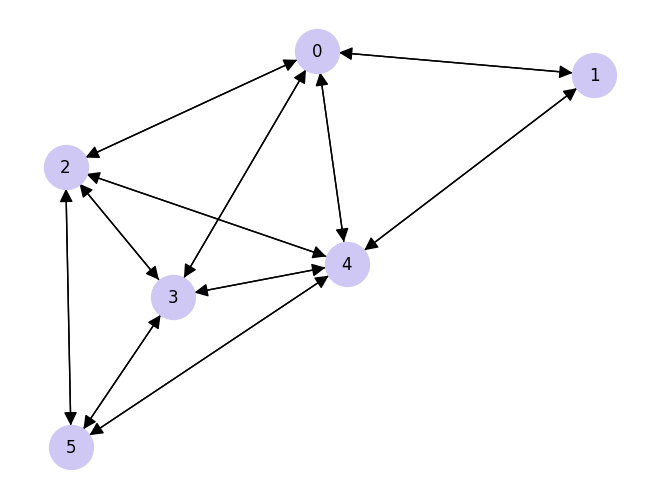

In [3]:
# A 6-node graph
G = {0: [1, 2, 3, 4],
     1: [0, 4],
     2: [0, 3, 4, 5],
     3: [0, 2, 4, 5],
     4: [0, 1, 2, 3, 5],
     5: [2, 3, 4]}
draw(G)

# def dfs(g, start):
#     if start not in visited:
#         visited.add(start)
#         for n in g[start]:
#             dfs(g, n)
# dfs(G, 4)
visited = set()
def dfs(g, start):
    if start not in visited:
        visited.add(start)
        print(visited)
        for n in g[start]:
            dfs(g, n)
dfs(G, 2)

Let's start from 0 and just take 6 steps randomly!

In [8]:
import random

def random_walk(G, current_node, path, steps_remaining):
  if steps_remaining == 0:
    return path
  
  # Add the current node to the path
  path.append(current_node)
  # Pick a random neighbor of current node as the next node
  next_node = random.choice(G[current_node])
  # Recurse from the next node
  return random_walk(G, next_node, path, steps_remaining - 1)

# Let's start from node 0
num_steps = 10
path = random_walk(G, current_node=0, path=[], steps_remaining=num_steps)
path_as_str = ' -> '.join(map(str, path))
# Prin the path
print('Random walk path:', path_as_str)

Random walk path: 0 -> 2 -> 3 -> 5 -> 3 -> 4 -> 0 -> 4 -> 1 -> 4


Try running the above multiple times.

**Notice that:**
1. each time should give a different result since we pick neighbors randomly
2. you may get nodes that you visited **multiple** times

Now, what if we **don't want to visit the same node twice**? We then want to keep track of which nodes have been visited **as part of the traversal**. Consider the following modification:


In [254]:
G = {0: [1, 2, 3, 4],
     1: [0, 4],
     2: [0, 3, 4, 5],
     3: [0, 2, 4, 5],
     4: [0, 1, 2, 3, 5],
     5: [2, 3, 4]}
def random_walk_once(G, current_node, path, steps_remaining, visited):
    if steps_remaining == 0:
    return path
  
    path.append(current_node)
    visited[current_node] = True

  # NOTE! We stop early if all of current node's neighbors have been visited
    if all([visited[n] for n in G[current_node]]):
    return path

  # NOTE! we check whether the next node is visited, and only move on if unvisited
    next_node = random.choice(G[current_node])
    while visited[next_node]:
    next_node = random.choice(G[current_node])
  
    return random_walk_once(G, next_node, path, steps_remaining - 1, visited)


# NOTE! Now we keep track of visited nodes. Since nodes are just indices from 0 to n-1, 
# we can just use a list (instead of things like sets or dictionaries).
visited = [False] * len(G)  
# Let's start from node 0
num_steps = 10
path = random_walk_once(G, current_node=0, path=[], steps_remaining=num_steps, visited=visited)
path_as_str = ' -> '.join(map(str, path))
# Prin the path
print('Random walk path:', path_as_str)


Random walk path: 0 -> 3 -> 4 -> 5 -> 2


Try running the above multiple times. Notice that:
- the random walk now does NOT repeat nodes
- it may stop early than the specified `num_steps`, and the last node must have all of its neighbors already visited!


# Question 1: Just DFS

Write a function that given a graph `G` and starting node `start_node` performs DFS starting at `start_node` and prints every node it visits.

For example, on the following graph, starting from 0 can produce `0, 1, 2, 4, 5, 3`.


In [10]:
from collections import deque
G = {0: [1, 2, 3], 1: [0], 2: [0, 4, 5], 3: [0], 4: [2, 5], 5: [2, 4]}
# draw(G)
visit = []
    # if start not in visit:
    #     visit.add(start)
    #     print(start, "->")
    #     for x in G[start]:
    #         path(G, x)
    # else:
    #     return
def path(G, start):
    queue = deque([start])
    if start not in visit:
        visit.append(start)
        while queue:
            node = queue.popleft()
            if node not in visit:
                visit.append(node)
            for item in G[node]:
                if item not in visit:
                    queue.append(item)
    return visit
path(G, 5)

[5, 2, 4, 0, 1, 3]

In [23]:
def my_dfs(G, start_node):
  # TODO: your code here
  pass

# Hint:
# - Recall the warm up above. DFS can be implemented in a similar way.
# - You should have some way of keep track of which nodes have been visited.
# - You should also have some way of keeping track of the order in which nodes
#   are visited.
# - You may need a **helper function** to do the actual recursion.
# - You only need to print the path. You can either have DFS return the list 
#   of traversed nodes and print them, or just print the nodes as you traverse them.
# - You can randomly pick a neighbor to visit next, or you can visit them in 
#   increasing order. Either way is fine.

G = {0: [1, 2, 3], 1: [0], 2: [0, 4, 5], 3: [0], 4: [2, 5], 5: [2, 4]}
s = 0
my_dfs(G, s)

<details>
<summary><i>Click here to see the solution. Attempt the question first!</i></summary>

```python
def my_dfs(G, start_node):
  n = len(G)
  visited = [False] * n
  traversed = []
  # The DFS modifies the traversed list in place, so we don't need to return it.
  dfs_helper(G, start_node, visited, traversed)
  return traversed

def dfs_helper(G, node, visited, traversed):
  traversed.append(node)
  visited[node] = True
  for neighbor in G[node]:
    if not visited[neighbor]:
      dfs_helper(G, neighbor, visited)
```

</details>

# Question 2: Number of Connected Components

**Task**: Write a function that counts the number of **connected components** of an undirected graph using DFS.

A *connected component* is a subset of the nodes in which every node can reach every other node. A graph may have more than one connected component! For example, the following graph has *two* connected components:


'no cycle'

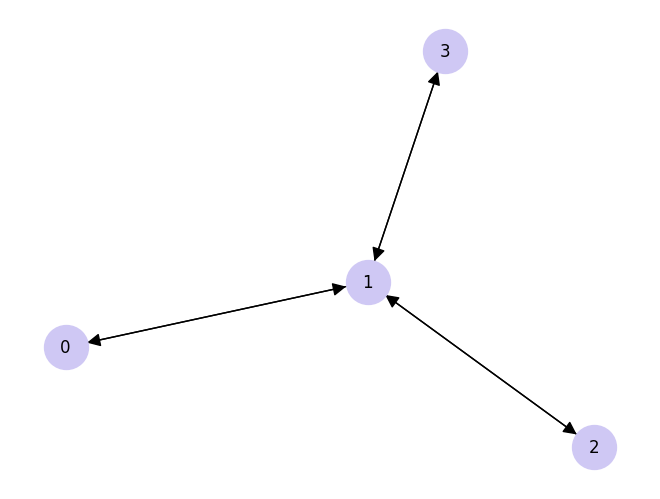

In [10]:
G = {0: [1], 1: [0, 2, 3], 2: [1], 3: [1]}
draw(G)
def path(G, di = True):
    node = len(list(G.keys()))
    edge = edges(G, di)
    if node -1 == edge:
        return 'no cycle'
    else:
        return 'cycle'
def edges(G, di):
    if di:
        summ = 0
        for x in G:
            summ += len(G[x])
        return summ//2
    else:
        summ = 0
        for x in G:
            summ += len(G[x])
        return summ
path(G)

In [1]:
visit = set()
def path(G, start):
    if start not in visit:
        visit.add(start)
        for x in G[start]:
            path(G, x)
    return visit
def counting(G):
    counts = 0
    for x in G:
        if x not in visit:
            counts += 1
            path(G, x)
    return counts
G = {0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [4], 4: [3], 5: [6], 6: [5]}
print(counting(G))
draw(G)

3


NameError: name 'draw' is not defined

In [89]:
def count_connected_components(G: dict) -> int:
  # TODO: your code here
  return -1



[0, 1, 2, 'true']


'cycle'

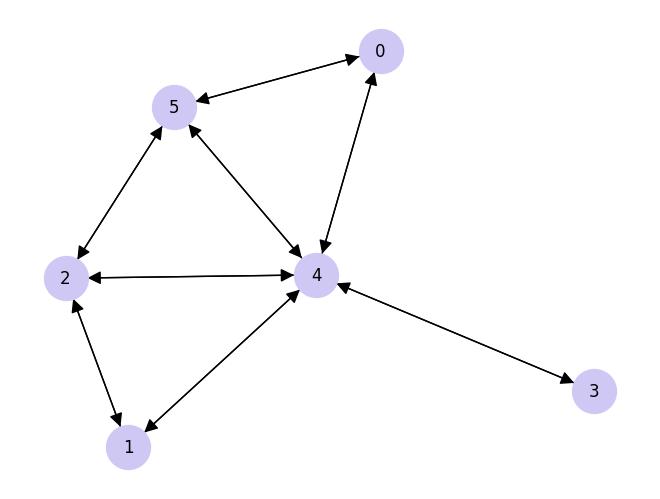

In [68]:
# Test cases
# You may use `draw(G)` to help you visualize the graph

# G = {
#     0: [1, 3],
#     1: [0, 2],
#     2: [3, 1],
#     3: [0, 2],
#     4: [5],
#     5: [4],
# }
# check(counting(G), expected=2)

G = {0: [4, 5], 1: [2, 4], 2: [1, 4, 5], 3: [4], 4: [0, 1, 2, 3, 5], 5: [0, 2, 4]}
# check(counting(G), expected=1)

# G = {0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [4], 4: [3]}
# check(counting(G), expected=2)

# G = {0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [4], 4: [3], 5: [6], 6: [5]}
# check(counting(G), expected=3)

draw(G)
detector(G)
# val = list(G.values())
# val[0]

# Question 3 (Medium): Detect Cycles using DFS 

A **cycle** in a graph is a path where you travel from a node back to itself through a series of edges.

Consider the following graphs with and without cycles:

In [37]:
def mango(n):
    tot = 0
    for x in range(1, n+1):
        if x % 3==0:
            tot += 8
            tot //= 2
        else:
            tot+=8
    return tot
mango(4)

20

{}
{0: 0}
{0: 1}
{0: 1}
{0: 1, 1: 2}
{0: 1, 1: 2}
{0: 1, 1: 3}
[0, 1]


'no'

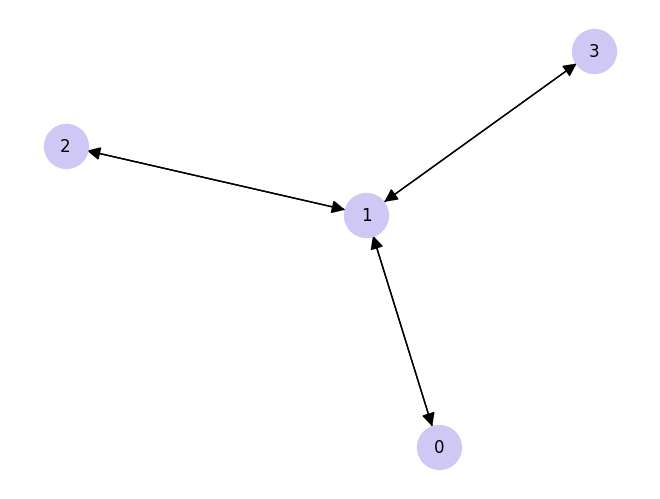

In [17]:
# A graph without cycles
G = {0: [1], 1: [0, 2, 3], 2: [1], 3: [1]}
draw(G)
visit = {}
def detector(G):
    y = cycle(G, 0)
    val = list(visit.keys())
    print(val)
    if 'true' in val:
        return 'cycle'
    return 'no'
def cycle(G, start, prev=0):
    print(visit)
    if start in visit:
        if visit[start] != prev:
            visit['true'] = prev
        else:
            visit[start] = prev
    elif start not in visit:
        visit[prev] = (start)
        prev = start
        for x in G[start]:
            cycle(G, x, prev)
    
detector(G)
        

{0: 1, 1: 3}
[0, 1, 'true']


'cycle'

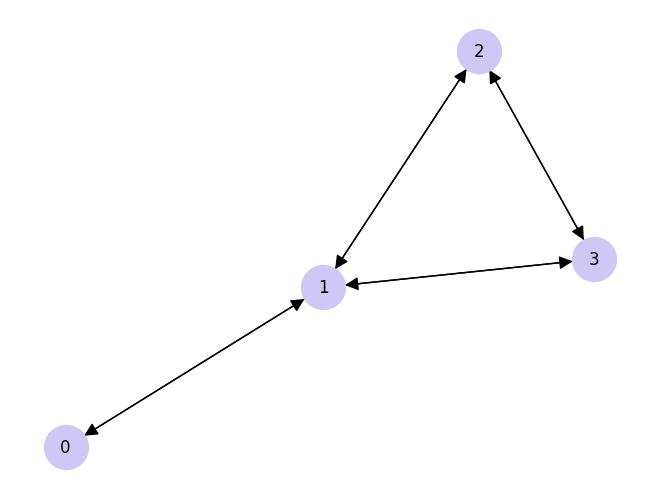

In [7]:
# A graph with cycle
G = {0: [1], 1: [0, 2, 3], 2: [1, 3], 3: [1, 2]}
draw(G)
detector(G)


**Task**: Write a function that detects if there's a cycle in a given graph using DFS.

*Hint: You can use the `visited` set to keep track of the nodes you've visited so far. If you visit a node that's already in the `visited` set and it is NOT the node that you came from, then you've found a cycle.*

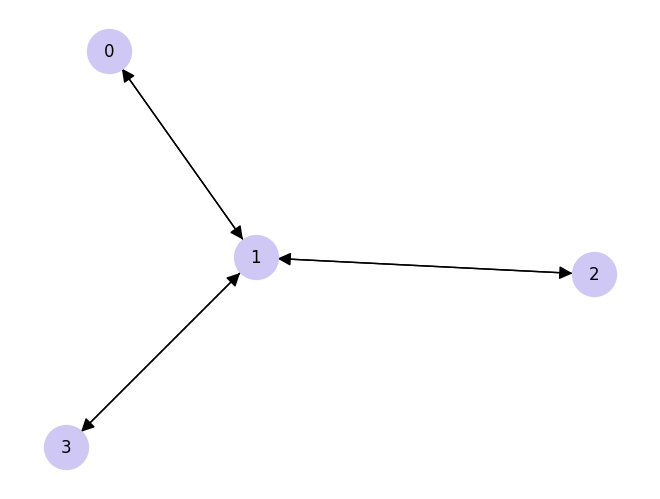

In [26]:
G = {0: [1], 1: [0, 2, 3], 2: [1], 3: [1]}
draw(G)
visit = {}
def detector(G):
    y = cycle(G, 0)
    val = list(visit.keys())
    if 'true' in val:
        return 'cycle'
    return 'no'
def cycle(G, start, prev=0):
    if start in visit:
        if visit[start] != prev:
            visit['true'] = prev
        else:
            visit[start] = prev
    elif start not in visit:
        visit[prev] = (start)
        prev = start
        for x in G[start]:
            cycle(G, x, prev)
    
def has_cycle(G: dict) -> bool:
    if detector(G) == 'no':
        return False
    return True
        



{0: 1, 1: 3}
[0, 1, 'true']
Congratulations, the test case passed!
{0: 1, 1: 3, 'true': 0}
[0, 1, 'true']
The expected value is False, but we have True
{0: 1, 1: 3, 'true': 0}
[0, 1, 'true']
Congratulations, the test case passed!
{0: 1, 1: 3, 'true': 0}
[0, 1, 'true']
Congratulations, the test case passed!


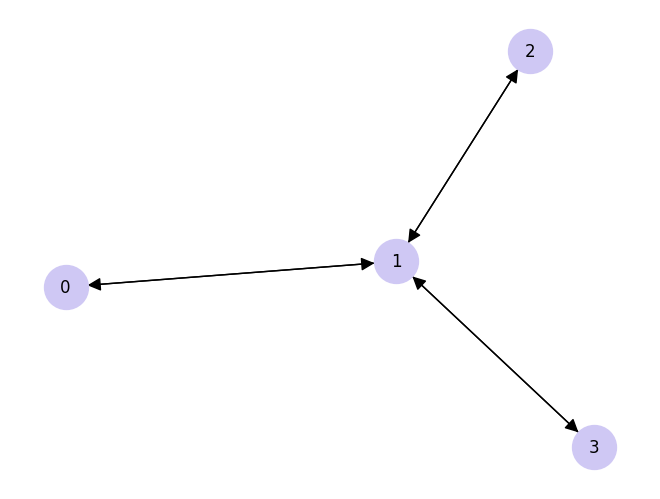

In [25]:
# Test cases

G = {0: [1], 1: [0, 2, 3], 2: [1, 3], 3: [1, 2]}
check(has_cycle(G), expected=True)

G = {0: [1], 1: [0, 2, 3], 2: [1], 3: [1]}
check(has_cycle(G), expected=False)
draw(G)
G = {0: [1], 1: [0, 2, 3], 2: [1, 3], 3: [1, 2], 4: [5], 5: [4]}
check(has_cycle(G), expected=True)

G = {
    0: [4, 7, 9],
    1: [3, 7, 8],
    2: [],
    3: [5],
    4: [1],
    5: [2, 4, 7, 8],
    6: [0, 1, 4, 7, 8],
    7: [4, 9],
    8: [0, 4],
    9: [4, 7, 8]
}
check(has_cycle(G), expected=True)

# Question 4 (Medium): Find a Path

For the following example graph, there are many possible paths from node 0 to node 9:


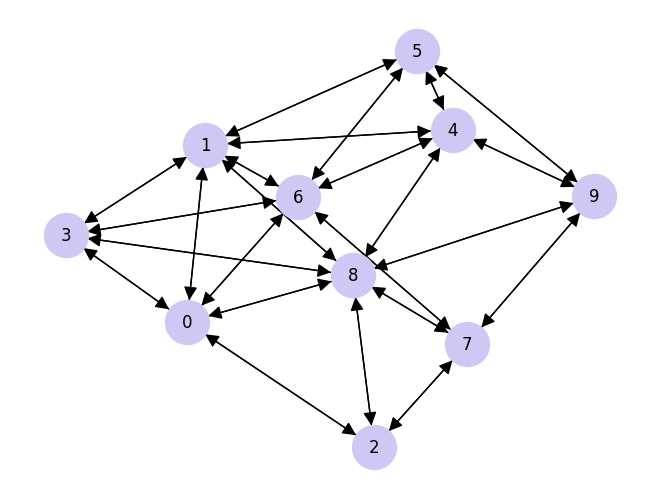

In [13]:
G = {
    0: [1, 2, 6, 8, 3],
    1: [0, 3, 4, 5, 8, 6],
    2: [0, 7, 8],
    3: [1, 0, 6, 8],
    4: [1, 9, 5, 6, 8],
    5: [1, 4, 9, 6],
    6: [0, 3, 1, 4, 5, 7],
    7: [2, 6, 8, 9],
    8: [0, 1, 2, 3, 7, 4, 9],
    9: [4, 5, 7, 8]
}
draw(G)

For example, valid paths include:
- `[0, 1, 3, 6, 4, 9]`
- `[0, 6, 3, 1, 5, 9]`
- `[0, 8, 2, 7, 6, 3, 1, 4, 5, 9]`
- `[0, 8, 9]`

**Task:** Given a graph `G`, a starting node, and an ending node, use DFS to find a path between them. Any path is fine (does not have to be the shortest path)! If there is no path, return an empty list.

In [14]:
def find_path(G: dict, start: int, end: int) -> list:
  # TODO: your code here
  return [-1]


In [15]:
# Test cases

G = {
    0: [1, 3],
    1: [0, 2],
    2: [3, 1],
    3: [0, 2],
    4: [5],
    5: [4],
}
start, end = 0, 5
check(find_path(G, start, end), expected=[])  # no paths!

G = {
    0: [1],
    1: [0, 2],
    2: [1, 3],
    3: [2, 4],
    4: [3],
}
start, end = 0, 4
check(find_path(G, start, end), expected=[0, 1, 2, 3, 4])  # only 1 path!


G = {0: [1], 1: [0, 2, 3], 2: [1, 3], 3: [1, 2]}
start, end = 0, 2
possible_paths = list(nx.all_simple_paths(nx.Graph(G), start, end))
check(find_path(G, start, end) in possible_paths, expected=True)  # any path is fine


G = {
    0: [1, 2, 6, 8, 3],
    1: [0, 3, 4, 5, 8, 6],
    2: [0, 7, 8],
    3: [1, 0, 6, 8],
    4: [1, 9, 5, 6, 8],
    5: [1, 4, 9, 6],
    6: [0, 3, 1, 4, 5, 7],
    7: [2, 6, 8, 9],
    8: [0, 1, 2, 3, 7, 4, 9],
    9: [4, 5, 7, 8]
}
start, end = 0, 9
possible_paths = list(nx.all_simple_paths(nx.Graph(G), start, end))
check(find_path(G, start, end) in possible_paths, expected=True)  # any path is fine


The expected value is [], but we have [-1]
The expected value is [0, 1, 2, 3, 4], but we have [-1]
The expected value is True, but we have False
The expected value is True, but we have False


# Question 5 (Medium): Find Bottlenecks

You are given a connected graph of cities having a football stadium and undirected roads (can travel both ways) between some of them. 

Whenever a game is happening in a city (a node) it becomes impossible to drive through it and all adjacent roads close (cannot move through edges).

We call a city **important** if after closing this city (node) and all neighboring roads (edges), it becomes impossible to get from one city to another city and hold a football game. For example, for the following graph we should return `2` (node `0` and `2` are important):

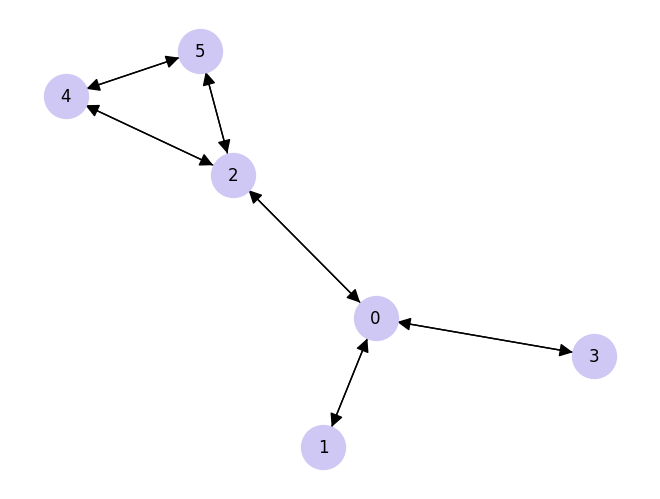

In [25]:
G = {0: [1, 2, 3], 1: [0], 2: [0, 4, 5], 3: [0], 4: [2, 5], 5: [2, 4]}
draw(G)


**Task**: Find the number of important cities given a graph `G`.

***Hint:** A simple but perhaps slow approach is the following. Try removing a node `t` from the graph along with its edges, and traversing the graph with DFS. If you can reach all the nodes in the graph (except `t` which is removed), then `t` is not an important node. Otherwise, it is an important node.*


In [16]:
# For your convenience, we have implemented the following function to remove a 
# node from an undirected graph. 

def remove_node(G: dict, node) -> dict:
    # Note that the index of the remaining nodes are NOT changed!
    # So if you remove node `1`, node `2` will still have index `2`.
    nx_graph = nx.Graph(G)
    nx_graph.remove_node(node)
    return nx.to_dict_of_lists(nx_graph)


def count_important(G: dict) -> int:
    # TODO: your code here
    return -1



#### Testcases

In [17]:
G = {0: [1, 2, 3], 1: [0], 2: [0, 4, 5], 3: [0], 4: [2, 5], 5: [2, 4]}
check(count_important(G), expected=2)

G = {0: [1, 2], 1: [0, 2], 2: [0, 1]}
check(count_important(G), expected=0)

G = {0: [1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3]}
check(count_important(G), expected=3)

G = {
    0: [1, 2, 7, 6],
    1: [0, 3, 4, 2, 7],
    2: [0, 6, 4, 1, 3],
    3: [1, 5, 8, 7, 6, 2],
    4: [1, 8, 9, 7, 2, 5],
    5: [3, 4],
    6: [2, 0, 3],
    7: [0, 9, 4, 3, 1],
    8: [3, 4],
    9: [7, 4]
}
check(count_important(G), expected=0)

G = {0: [1, 2, 4, 5, 3], 1: [0, 2], 2: [0, 3, 4, 1], 3: [2, 5, 0], 4: [0, 2, 5], 5: [3, 0, 4]}
check(count_important(G), expected=0)

The expected value is 2, but we have -1
The expected value is 0, but we have -1
The expected value is 3, but we have -1
The expected value is 0, but we have -1
The expected value is 0, but we have -1


# Question 6 (Hard): Find Bottlenecks But Faster

Can you solve the `count_important` problem above using $O(N+M)$ time complexity where $N$ is number of cities (nodes) and $M$ is number of roads (edges)?

_Hint: draw how the dfs travels the graph_

In [18]:
def count_important_fast(G):
    # TODO
    # Complete the function as in the previous question
    return -1



#### Testcases

In [19]:
G={0:[1,2,3], 1:[0], 2:[0,4,5], 3:[0], 4:[2,5], 5:[2,4]}
check(count_important_fast(G), expected=2)
G=[[1,2],[0,2],[0,1]]
check(count_important_fast(G), expected=0)
G=[[1],[0,2],[1,3],[2,4],[3]]
check(count_important_fast(G), expected=3)
G=[[1, 2, 7, 6], [0, 3, 4, 2, 7], [0, 6, 4, 1, 3], [1, 5, 8, 7, 6, 2], [1, 8, 9, 7, 2, 5], [3, 4], [2, 0, 3], [0, 9, 4, 3, 1], [3, 4], [7, 4]]
check(count_important_fast(G), expected=0)
G=[[1, 2, 4, 5, 3], [0, 2], [0, 3, 4, 1], [2, 5, 0], [0, 2, 5], [3, 0, 4]]
check(count_important_fast(G), expected=0)
G=[[1, 8, 25, 64, 73, 89, 423, 1534, 2133, 2353, 2433, 2875, 729, 3021], [0, 2, 3, 7, 11, 24, 27, 58, 112, 236, 435, 3911, 3045, 829], [1, 4, 6, 9, 12, 14, 28, 181, 671, 3665, 4564, 637], [1, 5, 10, 21, 39, 106, 532, 3002, 323, 4809, 4496], [2, 13, 15, 38, 100, 118, 400, 3421, 910, 2952], [3, 17, 32, 201, 3188, 4731], [2, 16, 29, 74, 291, 874, 4037, 4213], [1, 103, 458, 2452, 1622], [0, 94, 125, 228, 238, 3742], [2, 50, 564, 1494, 1693, 4121, 692], [3, 18, 23, 30, 43, 413, 2543, 3015, 1931, 1973], [1, 20, 193, 2323, 2131], [2, 77, 194, 863, 2523, 2582, 3385, 2150], [4, 61, 92, 245, 284, 726, 1352, 2537, 4240], [2, 41, 51, 158, 296, 1523, 1585], [4, 34, 144, 174, 268, 280, 853, 946, 3999], [6, 79, 110, 411, 1109, 1780, 1105, 3124], [5, 19, 117, 272], [10, 49, 152, 1556, 4032, 1701, 4192], [17, 40, 54, 81, 176, 179, 204, 349, 3499, 3833, 2238, 4359, 1053, 2018], [11, 22, 33, 42, 60, 1589, 4081, 3768, 2003], [3, 113, 127, 1761, 2688, 4479, 4977, 2531], [20, 242, 518, 974, 4727, 3549, 1964, 2178, 2701], [10, 26, 111, 260, 609, 2706, 4772], [1, 53, 62, 330, 2255, 2359, 712, 4943], [0, 108, 239, 312, 1845], [23, 31, 44, 86, 177, 293, 995, 1062, 2779, 451, 873], [1, 66, 364, 883], [2, 36, 45, 155, 547, 4561, 4699, 1121, 2438], [6, 35, 85, 154, 164, 691, 702, 928, 2330, 976, 4155, 1161, 2565], [10, 37, 52, 71, 84, 96, 207, 1922, 4565], [26, 145, 263, 351, 820, 1443, 4089, 4194, 4563], [5, 59, 78, 1470, 3585, 1081, 1113, 4290], [20, 56, 233, 867, 1042], [15, 93, 215, 249, 1095, 3140], [29, 87, 134, 327, 544, 1512, 1570, 484], [28, 55, 314, 682, 4603], [30, 47, 4503, 3674, 3347], [4, 163, 222, 417, 2373, 293], [3, 185, 762, 1159, 3515], [19, 190, 271, 2627, 4123, 4295], [14, 383, 2654, 3288, 4061, 3234, 1787, 3961], [20, 109, 130, 153, 357], [10, 4086, 882, 3526], [26, 46, 48, 65, 133, 589, 1268, 1898, 3494, 696], [28, 57, 160, 437, 490, 605, 630, 1738, 4886], [44, 114, 235, 1192, 1529, 1565, 2934, 3198, 4294, 2596], [37, 1321, 1467, 2321, 3208, 694, 4785], [44, 63, 717, 1818, 4583, 4120, 1672], [18, 126, 195, 231, 876, 1305, 4375, 4454, 863, 464, 2036], [9, 76, 2308, 2885, 4683, 2722, 4109], [14, 4393, 939], [30, 115, 213, 531, 2820, 1072, 448], [24, 72, 102, 227, 545, 923, 978, 2124, 4821, 4960], [19, 83, 116, 147, 389, 559, 1277, 2188], [36, 465, 515, 824, 970, 2407, 4659, 1563, 3992, 3174, 1648, 1815, 4268], [33, 97, 159, 1133, 1798, 4838, 4363, 3001, 436, 3579, 3582], [45, 146, 241, 320, 634, 1721, 2429, 3043, 4204, 717, 3762], [1, 191, 290, 426, 1256, 1525, 4054, 4166], [32, 69, 119, 166, 419, 610, 613, 2269, 2438, 2869, 3501, 1546, 2302, 1625, 1782], [20], [13, 186, 358, 567, 4281, 2160, 1614, 1562], [24, 371, 548, 936, 1855, 3001, 2250, 2875, 3478], [48, 68, 2008], [0, 178, 576, 3316, 4592, 1555], [44, 392, 1018, 1557, 1765, 3231, 4514, 3933], [27, 67, 4101, 1068], [66, 70, 98, 208, 246, 1685, 2127, 1526, 1776], [63, 99, 775, 1358, 1484, 1680, 2013, 2450, 4894, 3227], [59, 80, 172, 196, 2174], [67, 75, 88, 578, 736, 899, 1584, 3241], [30, 90, 275, 4239], [53, 151, 898, 962, 2319, 2982, 2669, 3695, 760], [0, 123, 386, 436, 1892, 2034, 4011, 4815, 3224, 3598, 2684, 2295], [6, 353, 462, 1455, 4327, 108], [70, 91, 439, 958, 2250, 4794], [50, 124, 307, 463, 2345, 1451], [12, 148, 229, 2497], [32, 107, 862, 579, 3003], [16, 180, 225, 343, 467, 780, 785, 1374, 1843, 1939], [69, 82, 101, 232, 575, 823, 1102, 1587, 2776, 2118], [19, 95, 598, 1364, 1062, 257], [80, 167, 1617, 3976, 3989, 2587], [54, 135, 3907, 4098], [30, 137, 701, 2620, 2856, 4151, 1235, 3597], [29, 149, 1771, 2639, 3119, 3384, 2837, 2185], [26, 104, 1168, 1635, 2612, 4333, 2977, 1676], [35, 580, 113, 1199, 2194], [70, 161, 1729, 1921, 2461, 3167, 3361, 369, 179, 2819, 1836], [0, 120, 306, 308, 336, 344, 377, 454, 603, 1232, 1408, 1810, 2811, 4388, 2101, 4394, 2350, 4208], [71, 175, 421, 512, 734, 2143, 2366, 4558], [75, 128, 162, 432, 815, 1106, 1493, 3624, 3654], [13, 3664, 3362], [34, 270, 295, 387, 857, 1398, 3618, 4361, 1573, 3585], [8, 292, 2076, 4990, 1485, 3284], [81, 169, 517, 2669, 3395, 4363], [30, 373, 1251], [56, 131, 226, 338, 728, 1210, 4772, 4852], [67, 122, 129, 187, 381, 896, 2555, 4686, 1244, 4690, 1480], [68, 234, 4845, 368], [4, 216, 807, 2930, 3014, 1062, 2448], [80, 171, 572, 873, 1000, 3866, 2042, 3501, 3776, 2158], [53, 105, 346, 655, 725, 4123, 3038, 4074], [7, 325, 466, 615, 232], [86, 665, 2151, 4277, 4574], [102, 258, 315, 2170, 1521, 545, 1023], [3, 253, 560, 1519, 2122, 2136, 2416], [78, 140, 1049, 4335, 4087, 3234], [25, 214, 692, 74, 1132, 1891], [42, 378, 1029, 1438, 1537, 2628, 3674, 3940, 2886, 1340], [16, 132], [23, 901, 1385, 4690, 2352, 2897, 2978], [1, 205, 488, 4851], [21, 1688, 87, 2221, 2468], [46, 1423, 2113, 3698, 1230], [52, 369, 3276, 2935, 1364, 1951, 1416], [54, 141, 626, 843, 971, 1396, 1984, 3641, 4912, 4134, 2966], [17, 121, 142, 202, 259, 628, 1826], [4, 301, 3130, 3463, 765, 2868], [59, 1279, 3470, 1547, 4232, 4131, 4819], [89, 183, 472, 637, 1123, 953, 2509], [117, 157, 313, 326, 407, 520, 2566], [98, 340, 669, 699, 3782], [73, 139, 223, 282, 864, 1230, 1714, 3920, 4804, 1282], [76, 370, 414, 422, 1814, 4118, 2151, 3062], [8, 138, 165, 624, 1429, 375], [49, 136, 184, 311, 1935, 3598], [21, 379, 427, 595, 3059, 4198], [91, 182, 254, 2629, 773, 3637, 2863, 3602, 4581, 1978, 281], [98, 2294, 300, 3817, 303, 3617], [42, 348, 731, 3510], [97, 266, 302, 367, 480, 2154, 2567, 2194, 3554], [110, 170, 240, 265, 1110, 1710, 1835, 2293, 2727], [44, 851, 918, 2080, 2147, 2724, 2769, 3906, 4124], [35, 156, 274, 310, 698, 1001, 3133, 378, 1793, 1716], [83, 649, 816, 1298, 2531, 2617, 3563, 4106, 2247, 3951], [126, 143, 261, 1185, 853, 3325], [84, 279, 3610], [125, 211, 289, 339, 1726, 3695, 496, 1401, 1556], [123, 2059, 2146, 2898, 1264], [107, 262, 608, 900, 902, 1040, 1362, 2510, 2605], [116, 335, 445, 620, 1179], [117, 150, 329, 376, 720, 1901, 2042, 2412, 2792, 2483, 4411, 2275, 1288], [136, 409, 2441, 388], [15, 188, 645, 1649, 3302, 4323], [31, 331, 786, 4015, 4536], [57, 1972, 537, 159, 4681], [54, 3696, 3670], [77, 173, 527, 1956, 2782, 4898, 1750, 1957], [85, 1039, 1421, 2495, 2059], [142, 212, 429, 1081, 2039, 2180, 4429, 1279, 389, 1699, 3720, 791], [72, 243, 2525, 2685, 3821, 4350, 1307], [18, 219, 538, 590, 737, 2159, 1007, 2406], [42, 287, 599, 1472, 1577, 222, 2207], [29, 890, 1207, 2354, 840, 4503, 527], [28, 2476, 4684, 3232], [134, 221, 558, 1047, 1258, 2666, 3181], [121, 192, 210, 230], [14, 1910, 3737, 4458], [56, 168, 319, 799, 1069, 3476, 3526, 3748, 4677, 2969, 4793, 3393, 146], [45, 703, 3924, 4804, 1470, 1220], [88, 461, 1138, 2163, 2501, 1416], [91, 752, 2077], [38, 794, 1182, 3324], [29, 209, 850, 3458], [125, 449, 3194, 4414, 2987, 3912, 3320, 3754], [59, 830, 947, 1487, 4716, 1067, 479, 2686, 2514], [82, 294, 1673], [159, 199, 220, 224, 587, 656, 782, 1084, 1234, 3638], [95, 189, 388, 478, 1377, 1612, 2749], [132, 1079, 4131, 1560, 2377], [101, 333, 510, 2839, 3071, 4887, 1281, 2102], [69, 247, 316, 526, 831, 4334, 2533, 1484], [148, 2939, 478, 2016, 4628], [15, 1338, 3018, 3272, 1564], [90, 391, 1425, 1631, 562, 4196], [19, 200, 1012, 1126, 1511, 2200, 4206], [26, 750, 934, 3293, 1663], [64, 385, 397, 795, 798, 868, 1929, 3292], [19, 2239, 88], [79, 321, 354, 1648, 1669, 2473, 2484, 4480], [2, 394, 3407, 3378, 4252], [128, 2478, 2751, 2527], [120, 541, 696, 829, 2311, 4056, 992, 1808, 927, 3073], [126, 196, 350, 484, 534, 2179], [39, 198, 396, 1032, 3346], [61, 250, 1058, 4564, 3063], [98, 1899, 2899, 4307, 2327], [144, 635, 840, 2128, 3105, 3581], [169, 248, 418, 574, 4493], [40, 237, 1957, 2419], [58, 197, 553, 938, 4103, 526], [157, 203, 1625, 1996], [11, 1507, 2001, 4028], [12, 395, 1013, 1163, 1989, 2677, 3871, 1193], [49, 2048, 2653, 4633], [184, 2361, 69], [191, 1961, 2437, 2952, 3916, 3928, 1616, 375, 450], [185, 447, 561, 953, 1270, 1405, 3855, 545, 4303, 3165], [168, 244, 303, 451, 638, 920, 1355, 4928, 648, 4703, 4916, 816, 2232], [176, 206, 218, 252, 932, 1370, 1902, 3791, 1167, 2520, 2250, 3443, 2168], [5, 347, 957, 3348, 4874, 2270, 3461, 262], [117, 277, 300, 324, 1092, 2469, 3297, 3574, 1828], [192, 866, 2257, 3823], [19, 482, 2117, 4322], [112, 549, 3915, 2905, 4785, 4754, 684], [200, 278, 528, 543, 1659, 4745, 1072], [30, 1038, 3101, 4258, 534, 4209], [67, 471, 937, 3013, 3414, 4176, 2030, 4411], [164, 456, 619, 674, 685, 3020, 4154, 3778], [157, 217, 283, 475, 1296, 2298, 1754, 2325, 530], [138, 639, 2100], [150, 1217, 2053, 3933], [52, 627, 940, 1113, 2253, 1675, 549, 857], [108, 323, 2335, 2384, 632], [34, 1324, 4187, 707, 4358], [100, 352, 1874, 2771, 3638, 1765, 3498, 1752, 469], [210, 4815, 4131], [200, 3174, 3912, 441], [152, 4822, 4812], [168, 617, 1528, 1679, 1494], [156, 342, 398, 1733, 2529, 3004, 3081, 651, 1421, 1935, 2149], [38, 269, 1055, 1315, 4083, 153, 2276, 2647, 1227, 4259, 1479], [123, 4123], [168, 403, 712, 800, 1195, 1227, 1295, 1341, 4368, 2474], [79, 623, 2595, 4460], [97, 664, 1334], [53, 433, 498, 1048, 1193, 2302, 2868, 3942], [8, 281, 796, 1121, 2220, 2802, 4693, 2959], [77, 562, 2457, 1380], [157, 255, 1111, 1181], [49, 596, 2736, 2835, 2971, 4965, 1148], [80, 835, 1060, 4094, 103], [33, 276, 390, 410, 4169, 3515], [99, 251, 273, 502, 2502, 3282, 2578, 4909], [46, 264, 299, 361, 428, 501, 1573, 1056, 2175], [1, 304, 305, 753, 1951, 4524, 2606], [190, 256, 257, 267, 297, 359, 468, 494, 1303, 1743, 4151], [8, 976, 1004], [25, 365, 375, 571, 1023, 1346], [132, 3437, 3510, 4907], [57, 869, 963, 1468, 2261, 2431, 2854, 4710], [22, 754, 1337, 661], [151, 2280], [199, 455, 633, 1239, 3307], [13, 1745, 3999, 1806], [67, 2131], [172, 758, 961, 994, 4410, 1969, 4195], [189, 288, 3616, 3889, 4229, 1335, 4556], [34, 1037, 4358], [186, 356, 486, 597, 2967, 4715, 1933, 1035], [234, 317, 593, 779, 895, 1025, 1142, 2303, 2445, 4033, 1747], [200, 588, 2674, 3207, 810, 400, 1226, 1501], [106, 286, 362, 368, 533, 1695, 1735, 4906, 2298], [128, 1273, 1974, 4500, 4508, 4747, 1857, 1025], [230, 285, 1263, 1959, 3112], [237, 617, 592], [237, 503, 1099, 3428, 666, 81, 2063], [105, 298, 382, 444, 4380, 1641, 1889, 2838], [117, 1015, 2217, 3098, 3251, 3652], [23, 832, 1183], [136, 601, 2435, 1540, 2026, 2061], [140, 1067, 4696, 2589, 201], [31, 1073, 1432, 4537, 2778, 2512, 4720, 2768, 325], [235, 542, 1056, 3529, 4234, 1607, 820], [132, 337, 366, 430, 852, 2945, 2474, 4551, 2516, 687], [131, 360, 470, 2101], [237, 525, 1124, 3318, 2696, 2057], [15, 683, 1131, 2326, 4402, 3298], [222, 1929, 3067, 3883, 1660, 2289], [93, 380, 3084, 3538, 1009], [40, 363, 474, 537, 1062, 2517, 1936, 1072], [17, 1130, 2880, 3957, 3157, 935], [234, 907, 4629, 4027], [134, 837, 1289], [71, 662, 1607, 2049], [233, 328, 1925, 2423, 4757, 2768], [202, 309, 530, 948, 3504, 4639, 3032], [206, 1481, 1888, 3656, 2905, 2333, 3954], [137, 1410, 3388, 1533, 1098], [15, 1064, 4458, 4617, 3182], [228, 2300, 1033, 4875, 128], [123, 646, 648, 2539, 4152, 4477], [210, 997, 1976, 2045, 2681, 3332, 4002, 2868, 1194], [13, 642, 2844, 1217], [255, 318, 546, 1531, 4356, 4024], [253, 507, 511, 935, 3584, 315, 2689, 4909, 1816, 3901], [153, 1626, 3673, 3184, 3697], [248, 2408, 3353, 3275, 1763], [138, 771, 1075, 2363, 3769, 2496, 807, 4630], [58, 949, 1088, 2078], [6, 1630, 2278], [94, 434, 524, 3267, 1140, 2324], [26, 847, 887, 1330, 1515, 3008, 3869, 38, 2171, 452], [167, 334, 393, 563, 721, 1436, 2264, 2391, 4291, 820, 2170], [93, 384, 1489, 2752], [14, 459, 521, 756, 1469, 3560, 4315, 1411, 4891, 2068, 3082], [237, 516, 556, 1176, 1310, 3604, 4256, 3596, 855, 1823], [258, 450, 577, 1030, 3329, 1619, 3198], [235, 322, 4091, 4231, 522, 3274], [202, 332, 505, 566, 1539, 2183, 2613, 1640, 129, 1223], [118, 600, 2200, 3341, 397], [131, 3319], [199, 3431, 2872, 1563, 4772, 129, 2395, 4857], [236, 1685, 3919], [236, 1006, 1504, 1900, 1589], [89, 1184, 1255, 1579, 3679], [76, 801, 1186, 2990, 3819, 3077, 1802, 1846, 4017, 2942], [89, 889, 3557], [277, 2405, 2840, 3286, 3754, 1363], [134, 586, 611, 2946, 4704, 1663], [126, 967, 1052, 1166, 1328, 3271, 1569], [25, 977, 1368, 1454, 1621, 2228, 2430, 3147], [121, 565, 1977, 505], [36, 496, 3085, 3722], [105, 2790, 286, 789, 4332, 3075], [172, 442, 672, 784, 1134, 3342, 3863, 1585, 3172, 3236, 1846], [251, 425, 1213, 1419, 2027], [285, 4905, 4210, 3015], [159, 402, 416, 4712, 999], [57], [180, 3794, 4601, 782], [299, 3947, 608, 446, 4795], [214, 808, 1411, 1788, 4860, 1952, 1468, 3, 1476], [202, 684, 1203, 1372, 4379, 2547, 4792, 2332], [103, 372, 650, 4584, 4732, 263, 2165], [121, 3120, 1336, 2071], [35, 431, 602, 3590, 2491], [276, 2205, 2415, 3280], [142, 1369, 3802, 2327], [24, 666, 1033, 1594, 2427, 2097, 1649, 4936, 4337, 3458], [145, 374, 424], [300, 4005, 2323], [171, 341, 412, 991, 1605, 3810, 2134, 4573], [294, 1423, 994], [141, 2603, 1357], [89, 2037, 2480, 3676], [265, 982, 663, 2475], [97, 481, 504, 2473, 1741], [138, 514, 718, 4193, 1482, 2249], [122, 345, 659, 1147, 1750, 2131, 3557, 3658], [333, 768, 1166, 4440, 510], [221, 891, 1262, 4189, 2098], [79, 355, 4069, 1580], [89, 1216, 1479, 2015, 1815, 1352, 2121, 4569], [340, 1083, 1108, 1282, 1819, 4559, 2641], [102, 950, 1466], [201, 438, 670, 714, 1660, 4357, 3504, 1119, 3085], [130, 1101], [19, 3065, 1213, 1756, 745], [184, 878, 1361, 1390, 4533, 3530, 4209, 2626, 2812], [31, 604, 990, 1862, 2043, 3615, 2525, 1957, 2248, 4087, 2453], [216, 827, 2198, 2655, 1548, 975], [74, 4418, 2734], [180, 441, 1087, 2051, 1397], [343, 1963, 725, 362], [250, 2559, 2975, 2523], [42, 476, 1107, 1871, 3255, 842], [61, 479, 629, 3275, 3147], [237, 405, 1912, 3749, 2200, 1314], [266, 473, 2785, 4063], [235, 687, 3981, 3496], [253, 2379, 4651, 1479, 355], [271, 513, 929, 1199, 1267, 1392], [27, 497, 919, 3582, 3576], [239, 1882, 2299], [265], [131, 1495, 1763, 3591], [253, 99, 3440, 4934], [115, 579, 715, 1473, 1712, 2167, 4345, 1747, 88, 2317, 3293], [124, 3016], [62, 1592, 3817, 3186], [325, 723], [96, 1135, 2010, 567, 2220], [331], [239, 401, 551, 886, 1962, 2270, 125, 633, 1626, 197], [142, 554, 1345, 3243, 4905, 4185, 4819, 462], [89, 404, 552, 1008, 3141, 3904, 3272], [109, 1311, 4054, 134], [127, 406, 881, 1744], [270, 738, 858, 4965, 915], [98, 3105], [258, 500, 790, 1384, 3484], [41, 951, 1139, 413], [295, 2316, 2686, 3697], [178, 880, 2194], [73, 506, 2004, 4211, 3402], [93, 448, 594, 643, 1132, 1189, 1817, 3770, 2861], [169, 399, 1094, 1200, 3509, 4987, 3538, 2008, 143], [54, 420, 4303, 150, 4705], [233, 1072, 1876, 2355, 4024, 2865], [175, 483, 1477], [65, 3349], [294, 582], [181, 861, 1744, 2883], [194, 443, 904, 1416, 410, 2852, 2627], [185, 975, 3517, 3062, 1652], [178, 540, 1630, 3053, 301], [221, 848, 942, 1318, 2342, 2569, 2167, 3105], [388, 791, 2940, 1521, 3867], [4, 644, 730, 733, 1233, 252, 3996], [375, 1932, 2824, 4816], [319, 408, 632, 939, 1633, 1846], [224, 697, 1300, 1758, 4148], [377, 487, 4130, 4979], [359, 1319, 4490, 2423, 1995, 4367, 1526], [379, 4858, 2675, 1655], [121, 924, 1078, 1308, 3932], [402, 3231, 4624, 1514, 458, 4726], [143, 1574, 2359, 3315, 2843, 4941], [233, 395], [16, 491, 2251, 2703, 780, 3352, 1059, 3145, 2219], [333, 1206, 2277, 2607, 4411], [10, 415, 3815, 2945, 1842, 383, 4945, 2716, 1362], [124, 1591, 2190, 2573, 2915], [413, 464, 1091, 1601, 2176], [319, 3088, 3351, 1614], [38, 735, 1856, 3238, 4350, 1887], [189, 2278, 3041, 3365, 4107, 4199], [59, 1485, 3373, 2957, 3977, 4900, 2782], [389, 2472, 4058, 4393, 2316], [90, 446, 760, 3266], [124, 1950, 2442, 2467, 3233, 2806, 754], [0, 492, 1208, 1348, 2663, 3151], [331, 3888, 3240, 3101, 2650], [317, 1365, 1874, 4930], [58, 667, 2246, 2315, 4090, 1313], [127, 440, 452, 529, 819, 2916, 3550, 3318, 4625], [235, 4059, 2554], [150, 519, 592, 713, 2596, 644, 2824], [265, 495, 523, 1304, 2171, 2942, 3172, 869, 4865], [327, 612, 716, 1831, 2779, 2183], [91, 660, 1442, 4114, 4434, 2373, 4644, 4467], [227, 647, 1711, 2118, 2553, 4438, 4641], [292, 460, 585, 769, 945, 2344, 3845, 4072, 4374, 477, 2276], [1, 469, 3625, 983, 2050], [73, 680, 926, 2922, 1039, 3933, 56], [45, 477, 509, 999, 1401], [347, 3103, 4802], [75, 743, 2095, 2626, 4355], [427, 675, 3544], [354, 457, 568, 1172, 3602, 1958, 218], [316, 706, 3992], [395, 2915, 1507, 1041, 2605, 1043], [258, 453, 993, 1009, 3245, 3486, 3513, 4961], [141, 984, 2563, 4921], [421, 584, 2206, 3861, 2604, 322], [198, 809, 914, 1120, 4099, 2533, 754], [387, 499, 522, 570, 618, 694, 828, 2285, 4128, 4977, 52], [165, 1154, 4572, 1799, 3134, 3294], [298, 804, 2452, 3777, 3552, 874, 2075, 197], [199, 872, 1496, 2279, 2746, 2809, 4888, 3776, 2951, 26, 4122, 1383], [427, 778, 983, 4587, 3533, 293], [444, 4804], [89, 550, 3382, 4519, 4255, 2535], [244, 774, 787, 965, 2298, 3250], [209, 2616, 1981, 4238, 2739], [441, 555, 836, 871, 4785, 4843, 4512], [7, 2632, 4081, 408], [296, 539, 1098, 1937, 3700], [434, 2727, 4175, 4967, 2097, 3779, 2778, 4765, 2906], [161, 1807, 4357], [74, 607, 2339, 3586, 4731, 4945, 1231, 3780, 376], [76, 3261, 749], [415, 1140, 2996, 1954, 49], [55, 485, 1020, 759, 3640], [103, 2149, 3935], [79, 636, 1275, 2087, 2411, 4770, 3966, 2556, 661], [237, 4079, 4408, 1460, 2552], [435, 1713, 2065, 4677, 3368, 4005, 216], [266, 1218, 4341, 4507, 4606], [208, 856, 884, 3833, 705], [120, 2012, 2527, 4554, 756, 2947, 4829], [360, 2056, 4347, 1799, 1942], [271, 1292, 4843, 4822, 3546], [210, 508, 1349, 1482, 1977, 3408, 1359, 4634], [357, 4573, 1297], [437, 557, 2458, 3387, 2385, 434, 4611, 3528, 2214], [169, 1286, 173, 4311], [358, 493, 2208, 2189, 4493, 166, 3537], [131, 767, 1063, 4647, 4497], [338, 729, 1021, 544], [204, 536, 641, 2011, 1834, 3617, 2013, 4761], [391, 640, 1007, 1891, 4437], [184, 724, 2906, 3519, 35], [465, 488, 1366, 2050, 4337, 4524], [250, 2120, 1078], [404, 489, 1161, 1598, 2315, 1762], [485, 1483, 2439, 4649, 4288, 112], [487, 817, 1116, 1220, 2030], [45, 1317, 2284, 2546, 3747, 3601, 1770], [411, 1462, 2625, 2676, 3393], [423, 1391, 2857, 3997, 4574], [479, 719, 2848, 4548], [237, 709, 865, 2796, 4562, 3265], [430, 3507, 4041, 1524, 4569], [314, 844, 138], [364, 1394, 1978], [227, 581, 3229, 2665], [448, 755, 4275, 4585, 3450], [382, 846, 1356, 2214], [235, 582, 1580, 1177], [234, 621, 908, 943, 3632, 3801, 3896, 1925, 576, 782, 1515], [257, 954, 1458, 1731, 1740, 1981], [338, 1559, 2020, 2351, 3302], [300, 1363, 4552, 4544, 3494, 313], [386, 1061, 3260, 2487, 3655, 1491, 3271], [286, 4108, 1113, 1497, 1305, 2100], [475, 1180, 2073, 2459, 2602, 3279, 1433], [437, 535, 980, 1613, 2819, 991], [171, 882, 979, 1668, 2520, 3328, 341, 1463, 1034], [286, 797, 1243, 1593, 1653, 4398, 1228], [90, 583, 700, 1254, 2978, 4151], [363, 614, 652, 3310, 2662, 3085, 4482, 1373, 1814], [339, 1498, 2232, 4278, 4874], [55, 2945, 3454, 4996, 817, 1003], [297, 1323, 3707, 2368, 3609, 1186], [95, 4877, 2706, 2566], [22, 1675, 3022, 4394], [429, 968, 4862, 4123], [121, 1379, 3219, 1477], [296, 766, 789, 4004, 3001, 3768], [448, 705, 868, 1741, 3248, 299], [430, 921, 1447, 1942, 1072, 4033], [292, 1409, 2158, 2716, 3024], [267, 573, 1285, 3903, 1382], [172, 2160, 3074, 191, 4520], [148, 690, 1800, 4370, 2252, 2612, 154], [206, 591, 763, 2356, 4251], [427, 1229, 1991, 2875, 3589, 4310], [277, 952, 594, 210, 1503], [52, 1946, 3074, 4283], [3, 732, 1686, 3153, 4075, 4099], [253, 673, 695, 1082, 1636, 2524, 3209, 565], [184, 1171, 1471, 1715, 2286, 2304, 2901, 4640, 207], [509, 1767, 1460, 4284], [482, 1748, 846, 2760, 1954], [271, 913, 1749, 3006, 4472, 146], [152, 1444, 3996, 2658], [459, 897, 955, 4399, 1199], [397, 1115, 2520, 3317, 4779, 1600], [183, 3128, 1251, 4357, 4363], [264, 849, 987, 4456, 4541, 659, 1557], [206, 1127, 1388, 2153, 4762], [35, 1927, 481], [53, 616, 3259, 2981, 198, 105], [285, 811, 2313], [28, 757, 1068, 1152, 2498, 3543, 3961, 2552, 2471], [62, 747, 3936, 578, 3932], [205, 1540, 1499, 213], [454, 2758, 3172, 4154], [375, 2726, 3643, 3530, 2364, 669], [377, 654, 2101, 4046, 4569, 4758, 3037, 1149], [191, 2044, 3416, 3941, 644, 4402, 1291], [376, 745, 4776, 1054, 623], [457, 661, 1971, 4495, 2868, 2972, 1040], [297, 2386, 2398, 3335, 3350], [477, 1272, 1604, 4454], [156, 676, 3301, 1725, 875], [54, 1070, 1283, 1586, 2932, 2624, 3169, 3879, 1757], [106, 2762, 4367], [198, 625, 4278, 4704], [229, 806, 931, 2026, 4409, 2199, 4591, 4211, 175], [294, 1553, 1638, 1727, 3551, 3280], [9, 761, 1259, 1325, 1732, 1795, 2098, 4158, 2683, 3101], [313, 1226, 533, 1621], [300, 569, 4250, 1728, 3355, 4009, 1959], [61, 686, 1198, 1297, 2850, 2852, 2947, 373], [441, 3330, 2987, 1318], [566, 1010, 1668, 2220], [448, 1153, 3674, 899, 1370, 2180], [239, 653, 1922], [101, 1228], [525, 1145, 1353, 3977, 1613], [189, 1190, 1615, 2111, 2719, 4236, 1822, 595, 868], [80, 741, 1031, 1222, 1751, 2324, 2492, 4759, 1947], [64, 727, 972, 1532, 1870, 1947, 3572, 3574, 502], [298, 922, 1399, 1990, 764, 1219, 4365], [70, 679, 1079, 548, 2599], [369, 2023, 2504, 3196, 78, 1032], [87, 1092, 938], [498, 770, 3967, 4338, 2616], [501, 393], [512, 4119, 4676, 4392], [446, 1274, 4184], [434, 746, 1002, 2764, 2800], [310, 805, 1150, 1302, 1752], [168, 1799, 4022, 4147, 4663], [252, 606, 1141, 1941, 2219, 4195], [44, 2069, 3121, 2847, 1729, 2460, 4968], [152, 1359, 1545], [528, 1096, 1546, 1895, 1928, 2625], [429, 822, 1080, 3929, 256, 4087], [251, 821, 1066, 2881, 3475, 3534, 3507, 1904], [387, 631, 530, 2997], [127, 1280, 2389, 4134, 4179, 1731, 3831, 4536, 574], [231, 802, 960, 1093, 1151, 1225, 1514, 1855], [250, 969, 2858], [81, 764, 912, 2360, 1872], [153, 1204, 1235, 1867, 2347, 3941], [301, 658, 1347, 1918, 3097, 4349, 3454], [261, 622, 2088, 2725, 3278, 3297], [327, 4903, 4843, 1184], [89, 1678, 2226, 4232, 2693], [351, 1840, 4506], [45, 657, 4525, 3171], [588, 1996, 2552], [462, 765, 2283, 3299], [140, 678, 2377, 322, 3161, 3445], [23, 813, 1034, 4344, 3885, 3674], [59, 651, 2743, 3830, 1992, 1273], [310, 4021, 2350], [431, 1690, 3173, 1875, 1863, 2404, 824], [59, 3942, 1214, 4767], [513, 4978], [103, 859, 1187, 1980], [545, 744, 944, 4141, 2108], [220, 894, 1682, 2019, 2780, 256, 4355, 1760], [448, 1662, 3485, 3673, 1633], [209, 1756, 2125], [141, 1779, 2658, 1945, 4928, 2370], [502, 1536], [601, 681, 1774, 1838, 3826, 4181, 3112, 3982], [225, 4844, 554], [125, 677, 3221, 4566, 4745, 4837, 4189], [561], [116], [213, 742, 793, 834], [117, 772, 1389], [358, 748, 841, 2468, 4263, 3863], [45, 708, 1451, 3950, 2256], [594, 1492, 3192, 3703], [402, 711, 1739, 1757, 2721, 3658, 214], [244, 375, 2430], [57, 1497, 2135, 3532], [188, 4771, 2001, 4317, 3220, 3159], [467, 663, 1076, 2709, 4740, 4256], [120, 710, 2479, 2, 1364], [199, 2082, 2536, 2601, 3187, 2862], [211, 1169, 1245, 3921, 1499, 1033], [483, 956, 1639], [482, 2856], [284, 668, 2017, 4351], [387, 2785, 1738, 866, 4037], [400, 892, 916, 2155, 553, 2993, 429, 689], [144, 2580, 3445, 4332], [282, 1555, 2026, 736], [433, 759, 1261, 1450, 3855, 998], [282, 707, 1065, 1543, 2682, 3274, 199], [135, 1839, 2878, 1385, 2566], [325, 773, 1645, 3359, 4390, 3735, 1582, 1715], [610, 3511, 4140, 221, 905], [513, 803, 1274, 4950, 1581], [571, 722, 1120, 3541], [552, 3045, 4543, 4121, 3191], [102, 688, 826, 877, 2175, 3270, 3357], [168, 689, 814, 911, 1608, 4844, 3575], [605, 1167, 2788], [600], [340, 1747, 542, 2254], [432, 1885, 4964, 4952], [555, 2336, 467, 242], [275, 704, 783, 2550], [636, 1178, 1367, 1500, 2475, 337], [226, 2913, 3150, 3338, 2713, 2872], [104, 2648, 4837], [330, 810, 4181, 1154, 257, 954], [426, 2114, 3992, 4012], [642, 973, 1473, 2305], [122, 3223, 3348, 551], [347, 1402, 4842], [2, 2296, 4773], [316, 1144, 4232, 4622, 3074], [533, 740, 792, 2235, 2268, 4635, 3017, 728], [209, 3096, 2196], [440, 2810, 1990], [558, 4032, 2170], [624, 1344, 2876, 3738, 3013, 3926], [608, 693, 1294, 1697, 3547, 4939, 4997, 4289], [578, 4209, 2854], [436, 985], [622, 833, 2132, 3963, 3236, 3431], [36, 1224, 1970, 3667, 750, 3283], [268, 1250, 1269, 1406, 2237, 4887], [324, 4251, 4330, 1597, 4619, 2652, 2675, 205], [209, 1809, 2247, 1621], [567, 1241, 1452], [361, 1246, 4258, 4589, 2711, 3323, 3499, 265, 2445], [655], [656, 4621, 1534, 1742, 644], [527], [29, 4212, 4781, 1005, 2293], [108, 9, 2361, 1730], [678, 1039, 4532], [448, 4065, 47], [533, 3645, 2194, 2254], [183, 3924, 44], [403, 845, 1611, 4040, 1916, 4831, 4493], [134, 2345, 4343], [122, 870, 4745, 2878, 2412, 1195, 3417], [512, 1333, 3516, 4825], [84, 1446, 2109, 3867, 4162], [29, 1542, 2309, 2495, 719, 2411, 3449, 3140, 2585], [160, 1019, 3032, 4142], [662, 3112], [522, 1320, 2841, 471], [442, 2195, 3320, 3384, 1833], [648, 1174, 2522, 3249, 215, 4544, 1920], [630, 1160, 3355, 2118], [494, 749, 825, 4354, 2151], [637, 1343], [632, 2375, 3874, 2310], [224, 2276, 24, 1329], [429, 941, 1588], [347, 1301, 4776, 1957, 1541], [369, 860, 2730, 2796, 2146], [431, 4049, 2191, 4401, 3664, 1677, 3252], [48, 1043, 1105, 2393, 3471, 3661, 4854, 57], [339, 1490, 1362, 3485, 3143], [493, 1202, 3390, 702, 1544], [142, 1278, 1415, 2046, 4036, 3697, 3167, 4342, 1027, 791, 3475, 4824], [294, 2222, 2348, 2894], [653, 3974, 2313], [372, 788, 1802, 2203, 3862, 2044], [484, 2662, 3256, 2604, 831], [102, 2614, 355, 1319, 4073, 3895, 1566], [13, 879, 1878, 964, 1484, 4657], [576], [97, 1912, 673], [481, 777, 3350, 3903, 4970, 0, 3394, 2875], [400, 3188, 995, 3003], [130, 1188, 1877, 2548, 3309], [532, 4166, 2216, 2670], [400, 2933], [90, 1165, 4431], [417, 4040, 999, 1491], [70, 1036, 1548, 3254, 2936, 4130, 646], [152, 739, 751, 933, 1397, 2369, 1849], [380, 776, 1173, 2086, 2250], [737, 1737, 1081, 3067], [673, 839, 2499, 3217, 3710, 4219], [575, 1380, 3577], [627, 1026, 1265, 2630, 848, 2254, 2014, 1601, 2704, 4020], [439, 917, 2556, 2942, 4891], [616], [554, 1554, 941, 2772, 349], [585, 1550, 3898, 3332], [548, 3811], [629, 2100, 4799, 3026], [709, 1342, 2507, 907, 463], [177, 1045, 3901, 682, 3020, 4652, 2156], [737, 1806, 4791, 2771, 4422], [162, 3670, 2027], [236, 4750, 2570, 2341, 4301, 4789], [242, 1175, 447, 422], [499, 1316, 4455, 3299, 4318], [296, 915, 1420, 1552, 1782, 472, 1211, 1485], [547, 1915, 3243, 4294], [247, 906, 4551, 3983, 2017, 1829], [647, 2083, 3064, 465], [421, 988, 2694, 3728, 1018, 72], [564, 2621, 3393, 1567], [39, 2099, 3126], [528, 2979], [598, 781, 2941, 3496, 577, 2754, 3527], [607, 2140, 118], [521, 1149, 1237], [480, 1610, 3731, 4994, 3102], [341, 1014, 1086, 4754, 2950, 3387], [434, 4621, 3295], [581, 1872, 1305, 1862, 2171], [289, 1527, 2603, 2777], [628, 2317, 4599], [650, 128, 2478, 2861], [455, 1434, 4088, 1037], [68, 996, 1044, 4919, 3034, 3489], [738, 1465, 3411], [729, 3030, 1349, 3833, 3010], [452, 1221, 2273, 3108, 1546], [251, 893, 1240, 1558, 4560], [79, 1620, 1965, 2373, 411, 1150], [764, 3488, 3886, 4611], [168, 2929, 2114, 2375, 4781, 3002, 3332, 502, 321], [662, 1307, 3026, 1928], [316, 812, 1129, 1287, 4330], [79, 3832], [145, 842, 1197, 1687, 1717, 2168, 4495, 2096, 4480], [455, 2115, 1714, 3378], [723, 1718, 883, 2136, 1344], [521, 1275, 315, 3626], [382, 1137, 1696, 3958, 3297, 3810], [399, 1413, 3829, 1287, 1668, 720, 2274, 150], [673, 3487, 4392, 1260, 4586, 1074, 1746], [627, 925, 1351, 1457], [163, 797, 2502], [178, 1212, 1929, 3152], [228, 1128, 1698, 1847, 2241, 3971, 3238], [511, 818, 1403, 3609, 3767, 794, 3759], [178, 1564], [159, 930, 4318, 1788, 3100, 1645], [224, 2665], [307, 2440, 3142, 3998, 1489], [596, 1887, 1536, 4359], [652, 1387, 2528, 3216, 3610, 3352, 2623], [450, 854, 1005, 1157, 1326, 2480, 4120, 4109], [586, 1894], [562, 2138, 3910], [100, 2615, 4418, 289, 3090], [323, 4685, 3350], [447, 3669, 4472, 2718], [666, 1440, 2755, 3304, 252], [546, 2415, 2812], [784, 2959, 4495, 1170, 4252, 2321], [609, 1923, 3118, 2174, 4531], [656, 2480, 3272, 1240], [91, 2509, 3601, 4566], [135, 1926, 1220, 2925, 2529, 199], [489, 1004, 1944, 4615, 4817, 515, 3981], [797, 4491, 4186, 1619], [427, 1993], [31, 1071, 1618, 2456, 294, 4428, 4657, 264, 1613, 2967], [593, 1077, 1418, 4985], [592, 3778], [80, 3454, 923, 3294], [55, 903, 959, 1590, 612, 1240], [709, 1097, 3637], [655, 1383, 925, 3782], [352, 1231, 3562, 3142], [448, 1293, 2081, 3775, 3153, 3585, 2463], [183, 1236, 2757, 1], [166, 3719, 1774], [172, 724, 2817], [260, 2949, 3281, 3917], [681, 909, 1288, 4293, 1493, 3315, 4155], [627, 1581, 1823], [232, 838, 1061, 974], [457, 986, 1271, 2490, 4066, 4211, 4755, 4862, 3252, 2718], [274, 875, 927, 1170, 2595], [835, 4508], [740, 3346, 3712], [188, 964, 2834, 154], [629, 1513, 2497, 3309, 4687], [786, 2493, 357], [116, 1141, 1469, 4000], [496, 3956, 1046, 1858], [697, 1616, 3131, 1909, 2917], [500, 1576, 2607, 1842, 536], [293, 1118, 1301, 1499, 1202, 4724], [398, 2443, 3044, 742], [542, 1667, 4048, 4067, 3283, 2424, 4326, 4737], [164, 855, 4726, 4232], [133, 1571, 2149, 3309], [265, 1938, 2799, 4302, 3295, 2095], [15, 1417, 136, 3961], [804, 1219, 3009, 951], [850, 2672, 297, 2033, 4321], [471, 1597, 3755], [93, 1382, 213], [380, 1041, 3136, 4334, 1761, 4155], [615, 1057, 2462, 2977], [715], [394, 1223, 4906, 1282], [78, 3997, 3609], [12, 49, 3917], [123, 1590], [494, 1808, 2690, 3372, 3523, 3003], [203, 643], [33, 1035, 1100, 2444, 4138, 1001, 1354], [522, 885, 4313, 2351, 178, 4828, 4464, 574], [241, 4389, 430, 2369], [699, 1191, 3413, 3672, 3788, 4119, 2262], [457, 1299, 2415, 3283, 4468, 2047], [451, 2063, 3324], [101, 966, 2993, 26], [6, 3686, 4224, 4720, 450, 1609], [837, 1122, 1445, 2449, 558, 1025], [49, 1706, 2166, 2546, 3823], [655, 1003, 1627, 4493, 2315], [350, 1314, 2150, 1522, 4437], [726, 3945], [385, 992, 1614, 1933, 1935], [379, 888, 1535, 1861, 2958, 1250, 2562, 4871], [510, 2096, 3922, 43], [27, 1424, 1832, 788, 2442, 3221], [471, 2423, 1702], [868, 4195, 4102, 2866], [375, 1518], [293, 2918, 2925, 2020, 2618], [881, 1016, 1889, 4995, 1875, 1837], [308, 4003], [154, 905, 1205, 3968, 4034], [342, 2333, 3732, 3979, 3556, 3438], [644, 910, 2513, 3351, 2564], [779, 2526, 1447, 2000, 3126], [617, 3331, 4819, 1762], [251, 1404], [98, 1158, 3750, 4864, 3949], [539, 1248, 4275, 4101], [72, 1488, 1737, 1822, 4213, 3935], [70, 1520, 570], [140, 1568, 2485, 1517], [111, 1050, 1104, 1473, 2158], [140, 1480, 3985, 3864], [824, 2512, 2809, 3815], [395, 1562], [890, 1666, 2793, 651, 4196], [758, 2955, 4163, 3968], [273, 3726, 4065, 749], [502, 2655, 4594, 4540], [833, 1017, 1992, 2883], [892, 1194, 2450, 3945, 4], [656, 1373, 2626, 4924, 3136, 2384], [598, 1716], [537, 3671, 4187, 1946], [447, 1602, 1700, 1958, 2864, 2441, 4143, 945], [756, 3583, 380, 4886], [644, 2107, 4133, 4500], [743, 3113, 2314, 1854, 4809], [133], [364, 1181], [199, 1907, 2267, 1634, 2931], [523, 1247, 2312, 3730, 1400, 2214, 3213, 4085, 4147], [577, 927, 1295, 3113, 3401], [53, 1671, 823, 2246, 1284, 1402, 4566, 4324, 3613], [407], [793, 2702, 4014, 826], [436, 1089], [837, 1143, 1906, 1975, 2680, 2807, 922, 998, 1222, 183], [29, 1781, 2542, 3861], [363, 4425, 4623], [799, 981, 1506, 1726, 1707], [562, 1112, 2846, 1940], [200, 1503], [737, 1459, 3345, 4730, 1512, 4522], [177, 2421, 2877], [286, 1322, 1681, 3445, 272, 2171], [62, 1463, 3124, 1162], [208, 1011, 2584], [191, 580, 3935], [402, 1414, 51], [213, 3870], [713, 1028, 3334, 4234, 745], [398, 1053, 1059, 4757, 3217, 1446, 3237, 3763], [502, 2768], [616, 1053, 4133, 1269], [434, 914, 3474, 3796, 1449, 3106, 2892], [15, 1813, 4000, 1375, 4646, 1286, 3104], [166, 1945, 2295], [277, 1125, 3982, 3418], [290, 1665, 1904, 2664, 2717, 2755, 4715, 2437], [346, 1951, 2470], [383, 2805, 854, 3573], [530, 1027, 1458], [198, 2274, 120, 3068], [503, 2406, 4052, 4639, 666], [539, 1894, 2372, 2660, 1618, 4956, 2392], [640, 3454, 3285], [201, 1853, 1912, 2717, 1655, 4564, 2454, 3939], [75, 2784, 3462, 4906], [824, 1842, 2178, 2240, 2570, 4059, 3199, 3000], [596, 1074, 3104, 4465], [247, 2583, 3183, 3333, 1522, 2677, 1853], [72, 1663], [241, 1266, 4648], [840, 1869, 3478, 4512, 2471, 726], [455, 2260, 3481], [873, 2236, 3914, 4000, 3997], [311, 2024], [519, 1407, 2245, 1677], [597, 1260, 1647, 2126], [55, 1431, 1872], [116, 1215, 1830, 3125, 3908, 3931], [576, 1848, 3554, 4455, 4368, 1409], [668, 1022, 1393, 2174, 2381, 4476], [22, 4199, 3653, 835], [396, 3016, 3990, 352], [238, 4937, 4599, 29, 2207, 2521], [312, 989, 1561, 2817, 4538], [53, 3706, 4868, 3284, 2147], [510, 998, 3447, 4579, 2844, 3139], [509, 1728, 1850, 1948, 3318], [930, 3265, 2202], [337, 2503, 4645, 1144, 2851, 1036], [452, 4864, 435], [445, 1834, 2134], [680, 2066, 3015, 3109, 1646, 4860, 1009], [836, 3036, 4443, 1329], [542, 1054, 1803, 2565, 3015, 3108, 3974, 3067], [760, 4409], [977, 1866], [351, 2191, 2778, 2347, 3026], [333, 509], [880, 4982, 183], [444, 2646, 2786, 2830, 3975], [247, 1051, 4362, 334], [26, 2705, 4464, 730, 2973], [775, 1146, 4567, 1157], [283, 3160, 2263, 4258], [979, 927, 1310, 1465, 647], [437, 1412, 3539, 735, 319, 3306], [101, 2827], [134, 867, 2901], [585, 2832, 3459, 3653, 4115], [877, 1350, 2366, 2232, 515, 4182], [817, 2504, 238, 2275, 1700, 1086], [804, 1046, 1897, 1952, 3613, 2698, 691, 2642, 2516, 1369], [305, 1824, 3261], [483, 2631, 152], [377, 1768, 1836, 4274, 1238, 2246], [444, 1103, 2703, 985, 270], [569, 1437, 3807, 1947], [937, 1722, 1741, 1390, 3034], [176, 4540], [194, 1024, 2069, 3960, 3122], [768, 1692, 1979, 1818], [259, 1148, 1654, 1703, 2717, 1202], [888, 1600, 1707, 1785, 4129, 3859, 1098, 4025, 2822, 2930, 2501], [909], [65, 1329, 1395, 1671, 760, 2263], [703, 2249, 2801, 3352, 2823], [465, 2392], [481, 1940, 4669, 3753], [973, 2586, 2806], [239, 3497, 105], [1013, 3358, 3898], [251, 1792, 2223, 3688, 875, 254], [742, 1606, 1908, 3163, 2326, 1732, 4057, 2714, 3672], [952, 2496, 1563, 720, 1458], [941, 1209], [109, 1232, 3608, 1105], [298, 1509, 1550], [575, 1786, 1906], [185, 2192, 1256, 2104, 579], [330, 2121, 4539, 281, 639], [609, 2871, 4848, 2803, 3703, 510], [867, 1441, 3874, 2392, 250, 2300], [736, 1251, 3667, 982, 3176], [249, 2661, 774], [207, 3086, 4814], [149, 1090, 4210, 1341, 436, 693], [140, 3807, 2319, 4162, 2832, 555], [858, 2041, 3344, 3467, 3888, 443], [33, 1343, 4384, 3788], [717, 4656, 3631, 443], [775, 1211, 1578, 3210, 2937], [750, 1156, 4523, 2388], [1005, 844, 2287], [156, 4743], [227, 4068, 3021, 4735, 4694], [107, 1348], [901, 1448, 2153], [994, 2485, 4654, 2557, 1652, 1945, 4488, 1262], [311, 1119, 1999], [942, 944, 3351, 19], [987, 1386, 554, 2258], [222, 1249, 1331, 1699, 3501, 4361], [264, 1252, 4647, 235, 3910, 2913, 4319], [859, 2306, 2049, 2700], [186, 1085, 4325, 3203], [942, 1841, 3580, 1300, 411, 4946], [232, 2994, 3101, 2272, 1483], [506, 1755, 4435, 835, 4884], [271, 1164, 3060, 4535, 81, 4124, 26, 100], [480, 2713], [280, 2148, 2156, 2980], [648, 3162, 3462, 3587], [593, 1201, 1453], [262, 2650, 3487, 166, 1632], [547, 2337, 2410, 3803, 3600, 66, 1684, 4414], [159, 2380, 3917, 4968], [559, 1796, 3132, 4441, 1571, 3845], [820, 1875, 3212, 3547, 1915, 3921], [390, 2533, 52, 271, 523, 206], [263, 2006, 2860, 4656, 4096], [960, 3643, 792], [289, 1934, 2074], [636], [821, 1136, 1237, 1905, 4230, 4574, 1104], [407, 1677, 1734, 3129, 486, 4193, 4747], [578, 4360, 4580, 170], [592], [150, 4245, 3183, 32, 739, 4805], [533, 2981, 4483], [345, 1439, 4448, 2319, 2394, 3419, 3007], [168, 3412], [1058], [768, 4421, 2539, 2805, 1215, 1004], [354, 2016, 4638], [290, 3965, 2761], [926], [1039, 1257, 1643, 3106, 1236], [415, 1533, 3042, 4536, 3288], [202, 3055, 4484, 580, 2717], [596, 1340, 1821, 3285, 4614, 1375], [388, 2080, 2964, 2072], [34, 1652, 1836], [591, 2544, 4786], [825, 2693, 4377], [459, 1016, 279], [257, 1508, 1644, 2724, 1254, 2814, 4101], [867, 3863], [348, 3207, 4463, 2733, 2059], [80, 1357, 4931], [1009, 1327, 2164, 4785, 2792], [901, 1155, 1955, 1077, 2296, 3359], [717, 1522, 2265, 1755, 16, 1029, 4747], [91, 1117, 3418, 1473], [357, 1389], [345, 1244, 2152, 4316, 2946], [16, 1114, 3930], [132, 2064], [230, 3325], [931, 1162, 1501, 2275, 2851, 3742], [213, 507, 32], [1109, 1242, 1747, 3583], [540, 2209, 3614, 4165], [489, 1381], [1106, 3070, 4483], [847, 1623, 2913], [1052, 4363, 347, 4575], [447, 2698, 4378, 653, 3848, 2453], [228, 28], [875, 2290, 2961, 1228], [120, 2110, 2169, 4584, 1297], [267, 1177, 3861, 3376, 3012], [948, 3258, 1446], [176, 1930, 2999, 3788, 1768, 3686, 2050, 1770], [543, 4321], [796, 2204, 2712, 2750, 4110], [784, 1947], [272, 1628, 2631, 3300, 4096, 4131, 4487], [268, 4544], [387, 1214, 108], [56, 1196, 1670, 2832, 2888], [316, 1804], [373, 1525, 2427], [1077, 1916, 2176, 3294], [790, 4782, 3252, 3773, 2159, 3137, 2558], [161, 2287, 2471, 2701, 4359, 4326, 1217, 3677], [383, 4926, 1634, 4611], [464, 1759, 2436, 2149, 292], [588, 4512, 843], [251], [927, 2010, 4753, 2554, 1328, 4224], [672, 982], [573], [996, 3451, 1175, 2585, 2886], [340, 4457, 3128, 3723], [1015, 1702, 4592, 2831, 231, 1609], [766, 3610, 552, 1858, 2636, 4611], [586, 2165, 780, 4536], [596, 3513], [547, 3631, 1849, 2204], [570, 1854, 1879, 3764, 4777], [449, 4689, 666, 3098, 3942], [1104, 1264, 3646, 2638, 3826], [1045, 4288, 1276], [804, 996], [896, 2229], [39, 1563, 4708, 4758], [708, 3627, 4859, 3340], [487, 2398, 29], [1112, 936, 1553], [194, 4607, 4470], [1062, 2161, 2647, 4001, 2332, 2528, 4377, 3050], [734, 1276, 1306, 2127, 2188, 3928, 4030, 3010], [311, 2067, 341, 2018], [657, 2004, 200, 4283, 4865, 1362], [86], [639, 2803, 4058, 3488], [837, 3961, 812], [534, 4336, 4356, 4149], [441, 3328, 4157], [738, 1281, 1837, 4482, 1893], [707, 3031, 3366, 2854, 2427], [754, 1336, 4651, 1146, 2345, 3626, 2958], [297, 1427, 3197, 2207, 1936], [1124, 3517, 501, 1616, 4164], [663], [141, 4125, 4673, 3379], [508, 3773, 4908], [919, 3156, 2061, 4598, 230, 2863], [163], [260, 1378, 1544], [306, 2387, 4411, 4487, 4449, 602], [136, 4218, 2330], [307, 2769, 4298, 516, 3618], [615, 3640], [731, 1290, 1422, 1595, 1734, 1789, 4582], [387, 3282], [574, 1554, 2299, 4775, 3065], [870], [46, 3758, 4496, 3985, 4572], [227, 194, 4503], [910, 283, 4240], [224, 2394, 2413, 699], [1133, 1253, 3291, 1831], [786, 1646, 3218], [567, 1313, 4582], [363, 1309, 2558, 539, 87, 3820], [388, 2559, 2960, 4488, 3267], [1066, 1672, 4516, 3035, 4775], [719, 1332, 4264, 847, 1015], [324, 1238, 1820], [599, 1443], [890, 1312, 2192, 2604], [412, 2199, 2350, 3502, 2615, 3017], [154, 3472, 1953, 1973], [423, 1430, 2000, 3960, 3544], [1028, 2318, 2496, 1744, 2536], [97, 3763, 2422, 2229, 1262, 2179], [1044, 1893, 3613, 756], [795, 1474, 3537, 2126, 2986], [317, 349, 2971], [1132, 1983, 1993, 4061, 613, 3408, 2216], [971, 1772, 2779, 3088, 1086], [344, 1375, 2462, 3991, 4187, 3126, 1486], [212, 1567, 2488, 284, 2266, 1138, 3491], [470, 4160, 4139], [854, 1720, 2070, 2248, 3798, 2863, 577, 1839], [489, 1435, 816, 2589, 2347, 160], [778, 2537, 3170, 3226, 3282, 2119, 2072], [575, 4413, 927], [861, 1464, 2002, 2085, 2597, 2127, 300], [682, 2213, 3677], [596, 1900, 1522, 3519, 4732, 4487, 3488, 3004], [565, 252], [224, 222], [572, 2062, 2508, 3667, 4574, 2280, 511, 1122, 1831], [529, 2739, 2146, 2100], [123, 1793, 2075, 114], [827, 1541, 2242, 2576, 2159, 462], [89, 1029], [400, 1284, 3644], [168, 4312, 2609], [599, 2902, 84, 3114, 3478], [829, 2271, 3149, 3795, 4886, 3308, 1090], [1077, 2808, 2842, 1263, 4789, 1703, 766], [1203, 1787, 1281, 1008], [244, 4720], [779, 3154, 814, 3201, 824, 1330], [686, 2773, 4311, 4203, 4035, 3774], [1114, 2466, 3283], [511, 1354, 1476, 1596, 4841, 2442], [1108, 4175, 98, 3841], [639, 1489, 3293], [687, 1762, 1833, 4355, 2561, 2352], [921, 2106, 4867, 2227], [897, 4105, 2072, 4837, 2686], [1055], [683, 881, 2731, 3243, 3667], [1036, 1694, 96, 541, 2511, 4420, 2659, 3655], [1056, 1460, 2874], [1196, 1733, 4613], [512, 1815, 2937, 1099, 2333], [306, 1769, 3418, 3708], [58, 1426, 1032, 3510, 2503], [1090, 1726, 3204], [156, 1997, 3877], [564, 2649, 2612], [969, 1571, 3398, 2998, 792], [647, 2254, 4827, 4987], [342, 3648, 1210, 1051], [255, 1790, 1237, 4490, 3715, 2983], [1155, 3525, 139], [742, 1526, 1674, 2577, 1683], [963, 4993, 1468, 2007], [363, 1472], [44, 1502, 2431, 3050, 1320, 3634], [683, 1634, 2403, 4392, 944, 4386], [198, 2173, 3521, 4932, 3490], [836, 1873, 1587, 2570, 4115], [557, 2296, 3222, 1975], [254, 1723, 2288, 4115, 2931, 610], [652, 584], [467, 789, 1949, 1389], [1165, 2103, 3017, 4265, 2070, 1156], [54], [720, 1504, 1572, 1811, 3752, 2850, 3554], [119, 150, 1751], [595, 3684, 4575, 1410], [1173, 2113, 1238, 2169, 171], [345, 2825, 1747, 1992, 861, 123], [559, 2256, 1849], [1233, 2028, 3159, 4741, 1556, 923], [525, 2327, 4268, 2122, 2070], [478, 2091, 2261, 946, 2749, 2886], [784, 4346, 791, 2513], [833, 2233, 142], [274, 4812, 1609, 4123], [1188, 1291, 1622, 2912], [1290, 4700, 3021, 553], [474, 2838], [828, 1583, 2068, 3551, 2581], [678, 1516, 3068, 3690, 4245], [224, 1510, 2263, 922, 2393], [210, 1339, 2129, 4452, 3707], [567, 1775, 3702, 476, 4589, 2795, 1458, 1123], [135, 4988], [871, 2579], [403, 2194, 4751, 1059, 1324], [847, 2593, 3324, 4123, 714, 4334], [586, 1360, 2618, 4404], [237, 4021, 2745], [430, 3010], [49, 770, 2549, 1632, 507], [1165, 3900, 4959, 4263, 1663], [783, 1582, 2463, 151, 1988], [407, 4886, 1412, 2416, 4664], [1199, 1629], [297, 1642, 2271, 998], [378, 2104, 4163, 4793, 4893, 1444, 4166], [1205, 4326], [1198, 1453, 4400, 426], [878, 3518, 4904, 2277, 359], [222, 4854], [755, 3785, 2567, 1966], [490, 1651, 1859, 2392], [398, 2057, 1952, 3298, 568, 1323], [405, 2156, 725, 2463], [705, 1400, 1940, 1268], [47, 4055, 1408, 2427, 2833], [935, 2322, 1879, 4287], [516, 1318], [215, 1619, 3171, 1300], [564, 4542], [804, 3118, 1608], [1103, 1753, 2221, 3141, 4960, 1929], [311, 1335, 1143, 3867], [1018, 4644, 2166, 712, 986], [293, 2282, 2417, 1240], [1055, 1486, 2325, 3724, 4496, 4821, 1845], [1202, 2413, 2689, 3714, 4228, 2753, 3440], [700, 2548], [226, 1517, 4987, 2393], [1328, 2554, 248, 2267, 2386], [1175, 3649, 326, 1398, 4937, 1870, 4106, 2623], [242, 3003, 3220, 4492], [174, 1371, 3493, 2563, 3587], [1296, 1452, 1776, 4125, 3237, 2394], [1093, 3311, 109], [224, 1039, 2098], [749, 3287, 4547], [1042, 3571, 3465, 4315, 4241, 710], [677, 1549, 4950, 4335, 1522, 788], [376, 1816], [239, 1691, 4169], [600, 1791], [423, 3527, 2928, 1049], [475, 4156, 777, 3228], [1003, 2421, 3315, 2487, 2638, 3223], [793, 2587, 3487], [13, 1389, 1736, 1857, 3089, 3423, 344, 4028], [573, 1624, 4430, 4498, 4681, 2249, 4546], [1243, 2911, 867], [199, 4511], [500, 4974, 4320, 4286, 2806, 3956], [1102, 1530, 3379, 335], [68, 2382, 2740, 2882, 1626, 3773], [590, 2879, 4426, 475, 2518], [1302, 2788], [350, 1742, 4328, 3734, 2011, 2776], [140, 2747, 2822, 4352, 2920, 718, 1573, 2937, 413, 1167], [505, 1521, 1524, 1684, 309], [81, 1852, 115, 637], [425, 1376, 2057, 4565, 1846], [485, 1661, 3578, 2914], [663, 1566, 1760, 2638, 3444, 2202, 4955, 4526], [312], [329, 2388, 1005], [200, 4051, 570, 2713], [1338, 1505, 3108], [324], [911, 1773, 3215, 513], [79, 1650], [1216, 2009, 946, 1093, 3626], [1365, 3979, 4996, 4068, 2886], [169, 1461, 1401, 2152], [1183], [520, 1964, 3887, 1699, 2106, 3671], [741, 2923, 3785, 3905, 229], [1116, 2273, 4739], [857, 3524, 2889, 2654, 4594, 525, 3059], [826, 1428, 1865, 2029, 451], [382, 3137, 1757, 2940, 3474, 4164], [111, 1766, 1858, 2454, 2979, 649, 3474, 3387, 2038], [1054, 2187, 3446], [803, 4736], [543], [1352, 2618, 1107, 628, 1275], [350, 2071, 2953, 1011], [492, 2348, 4085, 3039, 3652], [363, 3220, 2118, 3143], [973, 2061, 2152, 2215, 2651, 3738, 4015], [497, 1449, 2895, 4519, 1761, 2625], [1018, 2212, 3086], [116, 3065], [737, 4115, 354, 4685, 1928, 2321], [93, 4179, 1336, 1705], [577, 2014, 4192], [1320, 1456, 1701, 2376, 2432, 921], [437, 138, 1377], [670, 923], [797], [895, 1855, 2975, 4066], [198, 2414], [683, 2619, 2924], [968, 1777, 4439, 1656, 2094, 2772], [89, 2244, 2449, 1321, 4091, 1797], [524, 2172, 4702, 1775, 972], [279, 1569, 2714, 1280], [323, 3607, 296, 3919], [999, 1478, 1954, 3100, 3107, 2270, 4767, 1308], [791, 1547, 4316, 2041, 4516, 2007, 3136], [939, 3087], [720, 1575, 2691, 4351], [395, 4805, 3083, 161, 3098, 115], [853, 4833, 2672], [821, 4611, 4973], [317, 3126], [756], [149, 1573, 2549, 2837, 3729, 2355, 221, 4401, 2913, 4641], [1188, 4415, 2136], [114, 2991, 3336, 3439, 334, 3269], [883, 3875, 4173], [175, 1433, 2652, 3213], [1256, 3214, 4966], [1176, 3053, 4826, 3768, 1492], [1383, 3503, 3002, 4325, 4530, 3948], [125, 4435, 3766, 4382], [1208, 1730, 2190, 2183], [970, 1599, 2384, 3943, 3410, 3982], [263, 1911, 3677, 4219, 2393, 3509, 4369], [1425, 2022, 2894, 2937, 508, 4697], [774, 1657, 4331, 3735, 2468, 4626], [1220, 2999, 2686, 3344, 2054, 4223], [294, 2655, 4453], [1010, 2695, 3594, 4463, 4748, 1458], [109, 3891, 1576, 3953], [1083, 2031, 2332, 1742], [810, 1985], [1035, 3466, 3745, 4025], [432, 2804, 3118, 4831, 4842], [31, 2940, 1204], [538, 1943, 2831, 2170, 4466, 1311], [875, 4418], [701, 1637, 1125, 942, 3393, 4025], [523, 2368, 4494, 893, 1919, 3991, 3022], [1050, 3453, 3882, 4976], [1394, 945], [647, 4123, 4970], [630, 2032, 2683, 76], [1339, 3513, 686, 3017], [1313, 3830, 1585, 4674, 1066], [312, 4658], [74, 1475, 2196, 4027], [1400, 2007, 2715, 4010, 4554], [793, 2823], [503, 1829, 1297, 952, 1027, 1437], [933, 2486, 2849, 4777, 1704], [1252, 1770, 2705, 4916, 535, 468, 2930], [1377, 2761, 3075, 1588], [491, 3938, 1621, 1593], [936, 1551, 510], [1223, 3466, 4280, 3511, 2864], [776, 2341, 3443, 4739, 3558, 3189, 998, 3655], [346, 1560, 2592], [47, 3692, 3850], [241, 1917, 1936, 323, 1266, 2152], [296, 3383, 4821, 843, 3207, 3243], [32, 1491, 160, 4127], [534, 4729, 4972, 2095], [153, 1914, 1267], [369, 2770, 668, 4776, 901, 1106], [1212, 3051, 1949, 3761, 1809], [1455, 2610], [1243, 2936, 3378, 3935, 3262, 4212, 323], [391, 1603, 2367, 3088, 520, 4572, 2158], [1412, 2679, 4236, 4151, 4867], [344, 1664, 4273, 2174, 362, 1725, 222], [902, 4728, 2964, 4297, 4155, 98], [278, 1851, 4871], [475, 2003, 2328, 339, 2675, 2156, 4299], [488, 3234, 3419, 4231, 3414, 1060, 1535], [68, 2551, 4489, 172, 726, 2709], [419, 2262, 2817, 4570, 94, 3896, 3403, 756], [1331, 2963, 3078, 2359, 2788, 2034, 3662, 2489, 1216], [166, 1937, 3523], [898, 1764, 2861], [295, 1245, 801, 3391, 3523], [718, 4230, 3861], [1470, 506, 735, 3943], [631, 2186, 2230, 4449, 4530, 2125, 4973, 1427], [91, 833], [9, 220], [367, 1643], [451, 3740, 4142, 3701], [634, 3994, 4284, 2489, 2087, 1785, 507], [514], [847, 1719, 2079, 3675, 549, 639, 2039], [663, 2642, 3289, 4648], [1112, 1656, 2500, 4956, 4850, 252], [1268, 3809, 1977], [932, 3410, 3870, 3843, 530], [1278, 305, 3656], [1371, 2884, 3694, 4313], [930], [193, 2054, 443], [1099, 2142, 4793], [1030], [1295, 2540, 4407], [176, 4450, 4091, 4573], [35, 1903, 2058, 3884, 933], [841, 1705, 3119], [596, 2422, 408, 2565], [293, 3520, 502], [1294, 1538, 2762], [1334, 4132, 900], [886, 1886], [106, 2077, 1746, 2855], [899, 4318, 1952], [1363, 1827, 399, 105, 3917, 1570], [1105, 2946, 3732, 878, 1225, 1344, 961], [14, 2608, 2705, 2445, 2998, 1834], [1363, 495], [58, 3482, 4657, 1135, 2068, 4902], [1265, 405, 67], [771, 3037], [220, 2654, 4741, 2860], [46, 1640], [1357, 1655, 2487, 4478], [285], [576, 1826, 2883], [1091, 1778, 4904, 1693, 279], [0, 689], [881, 1483], [621, 2378, 802, 2676, 2319], [109, 1953, 2588, 3552], [1516, 4968, 1655], [300, 2370, 3689, 4705], [549, 2130, 3040, 4187, 261, 1780, 2446], [1231, 1893, 2284, 714], [702, 1754, 3452, 3224, 2058], [648, 1708, 2887, 2951], [1183, 2678, 3412, 4217, 719], [590], [591, 3479, 3639, 3897, 3184, 59, 3339, 778], [1413, 2737, 119, 1855, 4235, 1803], [736, 3257, 4682, 352], [1344, 2334, 3477, 4363], [746, 4981, 1030], [1463], [756, 2634, 3326, 4806, 2014], [563, 2417, 2854, 1162], [745, 2105, 2599, 3056, 1190], [646, 1664, 64], [18, 1284, 138], [65, 542, 2575], [779, 2574, 2791, 4129, 3534, 2018], [504, 3756, 3839, 2344, 3665, 4297, 4620], [1466, 1683, 2732, 2578, 4629, 170, 2483, 2398], [977, 4161], [904, 1676, 3549, 4950, 61], [1159, 2640, 3417, 55, 303, 1027, 2770], [798, 2055, 2184, 174], [46, 1987], [1367, 3465, 2340, 1872, 2646, 2995, 725], [1217, 761], [900, 4239, 3427, 4747], [1410, 1919, 2040, 2193, 2337, 311, 3337], [35, 4723, 3698, 1521], [1260, 2566, 851, 1070, 3493], [1278], [1421, 1588, 1794, 235, 1362, 4427, 93, 4988], [409, 1863], [1415, 1828, 1883, 2861, 2893, 3312, 2677, 3503, 3380, 4179, 3037], [846, 3772, 1438], [153, 1709, 1860, 1704, 2123], [1044, 2428], [306, 4881], [501, 1658, 343], [834, 2218, 4223, 3202, 2826, 652], [1307, 1609, 2580, 2082, 650], [1293], [70, 2735, 4487], [14, 316, 3775, 1453, 2622], [559, 1689], [80, 1967, 3399, 4107, 1271], [1573, 2534, 713, 1461, 2452], [20, 305], [824, 3954, 3805, 1922, 864], [414, 2718, 3393], [371, 3552, 3361], [511, 3181, 1462], [330, 1704, 4671], [1188, 2699, 4670, 4924, 2044, 4564], [1243, 3725], [856, 2560, 684], [487, 2920], [1431, 3225, 1778, 3296], [1016, 1632, 2025, 2072, 2439, 3506, 4428, 2836, 4851, 540], [415, 1704, 742], [914, 4124, 2328, 4385, 4338], [1477, 4616, 3566, 3045], [557, 1724, 4778, 4049], [333, 1725, 4627], [1026, 2092, 3028, 4941, 3379, 2648, 2719], [275, 264, 2000], [656, 3426, 3621, 4905, 1326], [1582, 2396, 2671, 3913, 1148, 874, 1289], [767, 4833, 4825], [697, 2760, 3448, 2149, 1981], [169, 4481, 3134], [509, 2696, 2180, 573, 2475, 820], [880, 4885, 2646, 3214, 416, 61], [574, 3676, 4300], [845, 4136, 2776, 197, 1177], [82, 2718, 2078, 1911, 3938], [820, 2399, 2897, 955, 4257, 4486, 1892], [1324, 298, 818], [780, 4878], [312, 3267, 2986, 2559, 1462, 685, 565, 3975], [1290, 1641, 3774, 7], [1118, 1863, 1828], [1353, 1920], [192, 3833, 4908, 2989, 59], [287, 1805, 2722, 1358, 3323, 375], [877, 2823, 1932], [1130, 3482], [1309, 1703, 1812, 2585], [397, 4748, 291, 4893], [175, 2590, 3081], [1600, 1305, 1067], [402, 2338, 618], [1269, 2557, 2383, 1139, 3767, 920, 2773], [86, 1890, 2697, 2756, 2900], [533, 1880, 3474, 4609, 4964], [1446, 2409, 3623, 3335], [563, 4808], [640, 3152, 3998, 4207, 2337, 2665], [1529, 2090, 300], [1622, 4814, 258, 4577, 4834], [1310, 1784, 3603], [1090, 1495, 3683], [1099, 2023], [650, 1913, 799], [1197, 985, 2019], [969, 3343, 2662], [180, 3978, 55, 3784], [144, 2827, 3350, 330], [1374, 3093, 2979, 2943], [1317, 2434, 4938, 3264], [1095, 3860, 1051, 396], [511, 3185, 3772], [1015, 2541, 2767, 2900, 2127], [1530, 1746, 3237, 957, 2536, 1538, 406], [1501, 4792, 4912, 1407, 4090], [1434, 1679, 2844], [1580, 2089, 4932], [206, 2335], [347, 3430, 269, 2274], [1366, 2909], [618, 2185, 3824, 4709], [962, 2863, 3927, 4266, 3613, 177, 1306, 310, 4100], [1479, 1555], [949, 2349, 3535, 3759, 3846, 2256], [905, 3559, 3771], [849], [569, 4313, 510, 2468, 791, 3307], [180, 3385, 4632], [1133], [923, 4272, 1018, 2158], [1201, 48], [167, 3255], [1265, 1801, 3543, 3794, 2073], [518, 2141, 4591, 213], [1562, 4822, 86], [1078, 2094, 2633, 2825, 4596, 968, 716, 2153], [603, 3944, 2260], [1657, 2385, 3524, 220, 4950, 2199], [68, 4748], [935, 4329, 4212], [617], [1560, 1864, 1265, 2972, 3975], [1363, 2739, 3487, 1068], [304, 2272, 4844, 67, 4688], [532, 2093, 2635, 2961], [786, 1909, 2867, 2255, 2882, 2659], [113, 1931, 2886, 3468, 3948, 4408, 3265, 4489], [1586, 2289, 4406, 2848, 4091], [612, 2231, 4280, 3236], [1346, 1823, 2901, 4299], [1014, 2853, 3826, 4705], [9, 3001, 1533], [1251, 4916, 3413], [253, 4461, 2101], [790], [678, 4068, 4966, 2662], [796, 1877, 3296, 1970], [1055, 3230, 3683, 1379, 3809, 3036, 150, 4949], [914, 1004], [1400, 18, 3269], [1148, 884, 2337, 4817], [1629, 1015, 4196, 1237, 1720], [1594, 1849, 1577, 1601, 1459], [1513, 1398, 4483], [876, 2162, 2446, 2989, 4353, 2088], [1016, 3224, 4155, 4286, 4647, 4893, 930], [1543, 3631, 1913, 2274], [1577, 2119, 2182, 2698, 4853], [132, 3465, 4717, 4965, 3025, 4458], [433, 2966, 3723, 3876, 2523, 2697, 2743], [369, 2607, 2845, 4631, 4442], [469, 1846, 2571, 4299, 3519], [123, 787, 2044, 3020], [534, 650], [912, 3566, 2414, 134], [786, 4661], [788], [1499, 2414, 4893, 3200], [1219, 4857, 1703], [57, 2189], [1011, 2291, 4026], [1273, 2846, 3512], [1604], [1605, 1797, 2481, 558, 1479], [138, 3061, 3894, 4662, 1257, 930], [563, 1783, 2972, 3491, 2900], [980, 566, 2922, 4384], [88, 2891, 589, 4013], [1430, 1966, 4247, 3899, 692], [503, 4725, 595, 1926], [564, 3682, 3320, 4057, 1026, 4405, 1789], [221, 1253, 4806, 3909, 4671], [1078, 1188], [253, 2211, 3588, 4177], [1352, 3836, 3767], [898, 4610, 739], [45, 643, 4545], [632, 3766], [503, 3277, 4613, 2776, 2932, 4483, 4862, 2059], [522, 1011, 338, 1921], [1361, 4731, 689, 1986, 1439], [237, 1896], [394, 1825, 1881, 3781, 4737, 379, 3219, 1209, 3959], [245, 4195, 2133], [1655, 2383, 4215, 3959, 4046, 2332, 1519, 792], [659, 2673, 2729, 2818, 1114, 251, 1282, 369, 4106, 3860], [536, 3713, 2782, 1965], [537], [340, 2957, 2850, 148, 2519], [575, 2112, 2788, 2997, 3711, 3741, 4499, 1279, 4540], [586, 2297, 3780, 216], [1327, 4664], [1542, 3228, 3669, 4523, 3889, 210], [1061, 4273, 1105, 4497], [619, 349], [632, 1384, 3404, 559], [403, 1760, 1840, 3523], [1140, 2052], [1367, 2775, 1758, 617], [21, 4453, 858, 1394], [1246, 4876, 4898, 487, 894], [367, 288, 3385], [1488, 1898, 2036, 2483, 2876, 2213, 3882], [65, 4200, 1883, 216, 3438], [1385, 2201], [535, 4786, 2379, 3486], [1008, 3169, 3983, 1126, 4170, 4801, 3252], [1255, 4774, 1894], [1460, 2005, 3241, 4701, 3561, 4429, 4028, 490, 1126], [85, 3341, 4031, 3879, 4911], [1215, 1789, 2980, 2822, 3056, 3747, 2735], [1373, 3982], [622, 2836, 830, 2451, 2616], [1297, 2343, 2742, 4319, 2482, 1409], [1339, 67], [1407, 2675, 1876], [1533, 3812, 1599, 4387], [620, 2216, 3793, 4207, 4443, 2379], [16, 2816, 3845, 1540], [928, 2865, 4180, 2630, 3658, 4217], [756, 59, 4211], [1727, 2349], [1642], [1016, 2038, 3469, 4255, 4306, 4896, 1497], [1031, 3462], [1238, 1868, 3679, 4463, 41], [323, 2374, 2707, 3241, 799], [1772, 2018, 1732, 1188], [1263, 1986, 2210, 2668], [1347, 2482, 3111, 2600, 3475], [1025, 3415], [1230, 2259, 2425, 134], [1573, 2033, 2636], [564, 4943, 2535, 1948], [1070, 2921, 4198, 4337], [1725, 4852, 1408, 3668, 2050], [56, 3995, 4749, 4943, 4661], [587, 3023, 473, 449], [527, 3182, 3796, 2086, 4404], [1674, 3435], [723, 307, 3835], [987, 4959, 1547], [1134, 4989], [1626, 3374, 3122, 4238, 3951], [751, 2224, 2637, 3178, 245, 2254], [461, 2594, 3193, 2935, 4148, 2431, 3945], [865, 4765, 183], [685, 4153, 1474, 3469, 3367], [89, 4146], [1278, 3492, 2083, 2485], [1629, 4656, 2952], [946, 3483, 3296], [124, 4095, 513], [1254, 2139, 3715, 4403, 344, 2586, 3023, 55, 2263], [1345, 1998, 4294, 286, 2193], [387, 2295], [48, 2301, 2788, 4928, 4549, 1014], [345, 4463, 3585, 4021], [1203, 3235, 3808], [1093, 3252, 4697], [898, 2292, 574, 3675], [1691, 297, 834], [1006, 4483], [1744, 3563], [1532, 1973, 4376, 117], [1521, 3601, 4947], [1575, 1623, 202], [1458, 758], [971, 3352, 3338], [431, 4226, 1937, 1228, 1196], [883, 4642, 3659], [1246, 706], [984, 1884, 482, 4441, 1523, 4745], [132, 1844], [1008, 1095, 88], [1173, 2789, 3839, 888], [622, 2047, 3427, 2561], [649, 1982, 4581, 1219], [604, 1994, 2381, 1758, 3962, 4594], [1059], [959, 1969, 2992, 4190, 4702, 413, 846, 4529, 4338], [79, 4744], [1835, 1896, 3979], [25, 2589, 1918, 3306, 4816, 2693, 1331], [1713, 1365, 3621, 307, 402, 316], [796, 2314, 3069, 3825], [972, 4496, 2000, 2386], [1704, 2598, 2814, 737, 1283, 1152, 4768], [980], [1481, 2116, 3011], [1364, 2346, 4065, 4830], [957, 4718, 961], [1153, 2420, 3179, 2386, 2130, 917, 2272], [1404, 3110, 4305, 4074, 62, 1547, 596, 2729], [417, 4718, 4844, 2480], [1352, 254, 2545], [1385, 2765, 4259, 4813, 1149, 844, 4596], [1317, 3090, 3753, 3120, 2081], [1577, 1995, 3322], [881], [351, 770], [1623, 3158, 4626, 612, 1574, 3205, 4202], [1683, 4695], [1383, 2919], [989, 3831, 4803], [599, 1960, 2591, 2826], [1787, 3409, 3822, 4295, 2212], [964], [576, 1997, 3491, 3104, 1336, 3095], [357, 2684, 2853, 2992, 2953, 3695], [770, 1566, 970, 598], [1271, 4444, 2475], [216, 425, 2998], [1071, 612, 888, 4516], [390, 3828, 4144, 4392, 1777], [731, 3184, 3649, 1698], [726], [1153, 1322], [1636, 2862, 2402], [1744, 3436, 3864, 4947], [365, 3371, 2541, 4948, 3665], [1575, 2144, 4485, 1765, 3487], [1834, 2238, 2397, 3381, 3631, 2748, 3170], [660, 4773, 4408, 4792], [1518, 2656, 3178, 1960, 2752], [802, 4122, 417, 3850, 4933], [278], [888, 2753, 4492, 258], [1635, 2973, 2292], [483, 4196, 108], [73, 2021, 3321, 3341, 1618], [1541, 4723, 1211, 1173], [955, 2428, 1769, 2587, 805], [591, 3564, 3396], [1844, 4157, 1743], [1005, 4514, 2433, 3587], [1764, 1988, 4685, 44], [187, 4164, 3680, 3137, 3801], [1225, 4385, 305, 2025], [142, 4908, 1918], [200], [1512, 2866, 3181, 3575, 4201, 3407], [949, 3234, 593], [1077, 4009], [927, 1031], [920, 4619, 4632, 3414], [1026, 1924], [1687, 2766, 3719, 3939, 4836, 845], [158, 4672, 4595], [1432, 2847, 4650, 1617], [957, 359, 2158, 728], [1645, 4019, 2085, 1708, 2716], [1472, 2072, 2680, 2014], [757, 3185, 4883, 2679, 1071, 2055], [1136, 2310, 697], [1468, 4777], [600, 2521, 2833, 4695, 1845, 3691, 1901, 2354], [1569, 1447, 4584], [1624, 3739, 3371, 2259, 4818, 707, 2603, 2015], [88, 2783, 2800, 3093, 1741, 3986], [30, 571, 4280, 1590], [813, 2266, 2213], [1908, 2371, 3818, 3596], [276, 2673, 502, 4155], [816, 1949, 1731], [544, 3432, 3232], [591, 2511, 783, 1397], [269, 1968, 795, 2544, 1327, 178, 4939], [1126, 4881, 2228], [1688, 4606, 10], [401, 4804, 1627, 3126], [880, 250], [1075, 4380, 2981], [126, 221, 880], [1468, 3306, 4864, 271, 3257, 1176], [459, 4534, 4598, 1831, 1487], [852, 4651], [79, 3166, 3520, 3605, 3768], [1021, 2538, 1320, 3390, 931, 3485], [588, 2600], [523, 2102, 3363, 2806, 473], [1444, 4215, 3909, 3205, 4290], [817], [947, 4491, 4810, 620, 2299, 1051], [531, 2609, 3504, 3659, 913], [576, 575, 1129, 1010], [980, 4074, 1795], [1926, 4945, 1474, 1275], [422], [950, 2352, 236, 115], [1005, 323, 1318, 1520], [1537, 2233, 3079, 2675, 3295, 1207], [1412, 2145, 3957, 2710, 464, 536], [1104], [148, 4985, 3835], [190, 2243, 4519, 351, 714, 4896, 148], [914, 441], [255, 3786, 4907, 566], [1867, 3029, 1886], [197], [375, 4005, 2513], [355, 4671, 4105, 2902, 3553, 2980], [1379, 2581, 4503, 22, 2890, 3823], [780, 4309, 1748, 3558], [1730, 2307, 2898, 1316], [1587, 3685, 4116, 4992, 4358], [1929, 2573, 2274], [1842, 2207, 3909, 247, 2527], [682, 4991, 1698], [555, 4310], [146, 2749, 3193], [1826, 4110, 3243, 1207, 2240, 10], [254, 3928, 4473, 2933], [927, 3868, 4120, 1272, 4620], [283, 3141, 4377], [475, 2723, 4511, 1502, 313, 4425], [497, 2518, 4025, 4991, 128], [1014, 3813], [615, 4198, 3578], [503, 2426, 4849, 456, 2849, 1611], [1839, 4203, 4205, 2652, 4044], [1214, 3878], [116, 4060, 4797], [1440, 2658, 4916, 4237], [1790, 2358, 1742, 3154], [1565], [1898, 1307, 4906], [194, 3066, 4811, 4857, 4351], [577, 3799, 4567, 675], [529, 3303, 4485, 2298, 3736, 2020, 4592], [909, 3666, 610, 2667, 1282], [1214, 3400, 4538, 819], [1840, 2828, 3206, 3859, 2181, 4770, 3491], [1860, 4279, 4820, 405, 3041], [606, 2859, 192], [1258, 2268, 2690, 1870, 4720], [1816, 2365], [1052, 3239, 2042], [1208, 3552, 3055, 1607, 2923, 1848, 893], [193, 2564, 635], [1223, 4174], [1482, 2163, 3172, 4824, 20], [1167, 2810, 386], [1770, 3825, 3656, 4689], [1073, 3047, 4341], [1456, 1413, 3418, 3006, 1266, 4672], [63, 2400, 2872, 388], [1375, 2035, 3347, 2682, 2047], [1143, 2491, 3481, 373], [482, 4789, 1361], [472], [68, 2084, 2360, 2944, 4199, 482], [1399, 3668, 1552, 742, 1914], [344, 4228, 2418, 1920], [1087, 2039, 173], [642, 3872, 758], [1789, 2868, 1166, 1558, 19], [617, 3273, 4934, 4918, 1646], [504, 887, 1991, 4133], [1892, 2060, 2829, 4919], [1433, 2063], [579, 1644, 3383], [967, 3167], [1600, 2270, 1900], [562, 646, 261, 3184], [317, 752], [1284, 2234, 4594, 2164], [1383, 2281, 3554], [489, 3630, 208, 3017], [1439, 2227, 2213], [1451, 2657, 2889, 3505, 4621], [1794, 3657, 855], [73, 3343, 1486, 2724], [2009, 3783, 2137], [1764, 4091, 3322, 2085, 49, 3032], [336, 3680, 3699, 3725, 4755, 3761], [1785, 2794, 3611, 4892, 1385], [150, 2016, 1499, 2423], [1569, 2931, 4210, 2048, 3211], [1041, 2137, 1413, 2465], [142, 3099, 3161, 101, 2243, 1999], [351, 2692, 3103, 2183, 2462, 3628], [553, 3151, 723, 1595, 4186, 3503, 3802, 1714], [283, 3140, 2075], [720, 4045, 2582], [1838, 2611, 2795, 871, 3231, 3052, 2009], [195, 2786, 2040], [275, 2907, 1057], [485, 3012, 1126, 1797, 435], [354, 2123, 2157, 2364, 4513, 4605], [1759], [212, 4846, 4458, 3900], [1507, 2126, 2239, 1435, 4805, 3229], [1564, 2777, 2125, 3591, 3805, 1915], [473, 2108, 2922], [1318, 2961, 3784, 2216, 1365, 267], [1512, 2711, 1542], [139, 2177, 1740, 149, 1101, 3907, 4649], [2021, 3321], [1393, 2258, 4605, 1181, 261], [1228, 2074, 3766, 3186], [872, 3202, 4471, 257, 2022], [1110, 2819], [469], [985, 4325], [1166], [1293, 1525, 296, 2839], [589, 3973, 2445, 1013, 2176], [1219, 1276, 1285], [1390, 3533, 4130, 4613, 326], [1600, 1914, 3248, 1248, 4191, 1094, 1221], [508, 2231, 1674], [2062, 3207, 1075, 3332], [1230, 450, 3072, 2045], [94, 4925, 3394], [1519, 162], [290, 4447, 1617, 4409, 4094], [1499, 2998, 3199], [133, 1094, 4338, 3253, 3027], [828, 1859, 4187], [638, 2182, 2914, 3025, 3087, 1582, 3483], [759, 3695, 1811, 4567, 4785], [2013, 2148, 3812], [1223, 1913, 2036, 2815], [738, 2097, 3725, 2652, 1800, 3367], [467, 3164, 3617, 1497], [601, 1706, 4407], [1658, 4969, 2625], [1640, 3004], [1286, 4441, 2097], [1606, 2495, 4143, 2547], [1686, 3141, 3849, 4237, 3095], [1677, 2465, 4381, 3104, 3575, 1407], [439, 4807, 2435, 852, 1471, 2976, 4501], [882, 786], [2086, 3747, 460, 330, 4233, 2114, 2091, 4125], [564, 2335, 3269, 4946, 4356, 1341, 342, 4300], [762, 3328, 3638, 2462, 4587, 3114], [748, 4298, 211, 507, 1229], [552, 89, 1695, 266], [1942, 2888, 3532, 171], [1276, 2465, 3327, 2555, 4498], [1311, 2706, 3323, 4227, 1032], [1554, 2643, 2943, 4214, 3713], [1247, 4288, 1379], [916, 2553, 4740], [2056, 3292, 3717, 4741, 616], [701, 4183, 3677, 4826], [1123, 4247, 2360], [574, 3881], [1751], [114, 2162, 1281, 2926, 3276], [667, 3203, 3975, 782, 2097], [787, 3033], [1851, 3536], [204, 4267, 2165, 4105], [433, 2285, 1392, 708, 80], [1709, 2720, 1221], [486, 3165, 2967], [1033, 2670, 4082, 3994, 344], [106, 2470, 1285, 3509], [2051, 4576, 3586, 1577], [53, 3555, 4903], [619, 2455, 2948, 2055, 1492], [2054, 2390, 3247, 4633, 1212, 969, 4009], [1165, 4093, 1223, 2417, 67, 2687, 1654], [188, 2494, 3880], [1296, 2225, 4296, 2813, 4409], [1540, 3017, 1854, 2239], [340, 3804, 11, 4694, 246, 4176, 4928], [681, 2938, 3282, 4023], [0, 2252, 1745], [984, 333], [634], [106, 2181, 2733, 1422, 4777, 788], [2041, 3806, 2035], [806, 4157], [1815, 2320, 3481, 2283], [765], [1675], [1508, 2986, 3189, 4023, 4578], [90, 3157, 3287], [1883, 2197], [1954, 3363, 4112], [139, 2984, 715, 1229], [133, 2590, 2687, 3637, 3787, 4009, 978], [1064, 2332, 3172, 2084], [466, 2489, 3993, 1140, 851, 2985, 1611, 221], [878, 3727, 4044, 12, 4948], [104, 3394, 3655, 4948, 709, 3594, 124], [1393, 1108, 1468, 1377], [1050, 3503, 4973, 543, 4350, 4090, 1677, 4807], [131, 2305, 3389, 2205, 2771], [644], [1319, 1064, 750, 1482], [2051], [524, 3035, 3844, 1671, 101, 1912, 1477, 901], [152, 4210, 1137, 1231], [526, 61, 4892], [1164, 2903], [1706, 2113, 3174], [161, 2568, 2003, 3003, 3647], [1103, 3749, 2028], [1150, 2331, 3915, 2117, 325], [876, 3094, 3903, 1329], [369, 2926, 398, 3376], [786, 2362, 3495, 200], [1123, 3422, 2565, 1281], [105, 3902, 294, 1444, 676, 4443, 2944], [430, 2734, 4556, 935, 293, 770], [1409, 4975, 3153], [1270, 2578, 3267, 3086, 3308, 2329, 3349, 3133], [973, 1479, 813, 69], [655, 235, 4179], [415, 2513, 1136, 2069], [2059, 2700, 3000, 4866], [959, 2392, 4237, 4267, 22], [184, 2561, 1210], [150, 3849, 1613, 570], [2136, 1994, 2996, 2851], [2082, 4481, 4829, 1709], [300, 3789, 2043, 1430, 431, 2767], [1564, 4253, 3044], [1662, 2281, 2402, 4637, 4502, 85], [1492, 3516], [1386, 4029], [1165, 54, 2998], [1721, 2653, 4166, 479, 2942], [414, 2329, 3696, 2611, 1430, 4793, 2636, 2986], [990, 3448, 716, 3550, 4174, 4032], [1205, 2575, 1032], [1569, 4628, 3085, 3170, 2930, 1816, 2680], [1300, 385, 4146, 4704, 695, 131, 87], [706, 4921], [1455, 2373, 674, 4792, 2727], [2144, 4879, 3438, 4207], [352, 2202, 3308, 4016, 2460], [1206, 4172, 562, 1679, 4048], [176, 301, 359], [1766], [2198, 3091, 1367, 3203, 981], [723, 2320, 3834], [1128, 2448, 1152, 2994], [328, 2154, 3887, 4801, 4401], [446, 3027, 3761, 2477, 2899], [1969, 1176, 976, 3629, 153], [479, 4195], [1115], [1790, 2641, 3091], [1735, 4053, 3393, 3905], [1395, 1868], [1224, 4215, 1764, 3906, 1923, 4196, 2031], [500, 4081, 921, 2981, 3612, 477], [1393, 2435, 4623, 3767], [1779, 2057, 2848, 732, 4613, 1214, 2242], [259, 4308, 4917], [1581, 4955], [588, 2226, 411], [228, 4767, 3906, 569, 4866, 373], [1327, 4784, 113, 2916], [721, 4573, 4776], [1025, 3962], [1806, 4240, 3268, 3961, 3487], [2129], [603, 3117, 3211, 3325, 3480, 2219], [2031, 4396, 1247, 4902, 3019, 4022], [312, 3947, 1930], [1158, 3802, 1210], [1492, 4518, 4295, 3374, 3661], [1690, 4080, 2073, 2490, 3916], [514, 1003, 199], [1953, 1288], [2028, 3380, 2254], [673, 2395, 4810, 4684, 4375], [966, 2486, 2412, 3034], [683, 4496], [1884, 4949, 19], [2054, 179, 3182, 2130, 3222], [959, 1973], [796, 3823, 4072], [1231, 3546, 2216], [1957, 4074, 2042, 4076, 3395], [1408, 3265], [968], [426, 3091, 4938, 2748, 3640, 923, 1008], [685, 3652, 3555, 135], [1219, 4235, 3066, 351, 3114], [1019, 2572, 1353, 4989, 4692, 339], [75, 738, 62, 200, 3174], [411, 2887, 4058], [2133, 2624, 527, 3236, 2951, 2810], [213, 3974, 2619, 4682], [1261, 4942, 1806, 742, 659, 695, 2234], [24, 3489, 4424, 4577, 1687], [1283, 3432, 3122, 1665, 630], [203, 4063], [2061, 2892, 4318, 1054, 4733], [1793, 3440, 4112, 1920], [965, 2951, 3784, 3542, 1678], [1286, 2968, 241, 3843], [1485, 4345, 870], [1295, 3650, 4952, 3997, 1018, 997, 1815], [294, 3460, 3114], [1105, 2418, 3026, 4959], [1923, 3010, 3201, 1217, 3190], [920, 2742, 3424, 1335, 3409], [673, 1997, 4488, 4971], [59, 4983, 3594], [375, 3143, 201, 3488, 1412, 2025], [1236, 4406, 1310], [1685, 2401, 2737, 3021, 1060, 1854], [1381, 778], [953, 4459, 1660, 4315, 1968, 791, 1708], [1112, 4842, 4791, 3537, 142, 1004], [712, 3936, 222, 434, 3284], [412, 1314, 4661], [418, 291, 4387, 3022], [451], [243, 1228], [2185, 2718, 2029, 4565, 4561, 4974], [1330, 2744, 4587], [607, 3268, 4208, 4602, 2757, 2139], [490, 1541], [448, 2357, 4998, 2118, 4311, 3040, 3926, 3119], [534, 2973, 2523], [1138, 2404, 3647, 1046], [1273, 2927, 4470], [1689, 2787, 3339, 269], [1122, 4178, 4873], [1722, 4713], [1822, 4763, 4300, 1890], [132, 3490, 4781, 4552, 691], [129, 3596, 2800, 4975], [1817, 4909, 947, 73], [1272, 671, 1104, 4665], [1752, 2621], [455, 3204, 253, 210, 1991, 3625], [365, 3095, 3404, 1945, 1190, 4849], [281, 1035], [1818, 2462], [227, 59], [251, 2535, 3116, 4451], [534, 2873, 3779, 3473, 2310], [2154, 2910, 3788, 668], [1057, 2896, 3227, 3488, 2493], [1966, 2700, 3078, 2330], [50, 2908, 2924], [702, 4888, 3197, 2371, 3862], [1916, 3457, 4826, 2304, 711], [183, 2351, 3420, 4409], [921, 3290, 3403, 2754], [546, 3939, 722], [1847, 4391, 917, 3217], [426, 3154, 3289, 487, 3963, 877], [384, 4216, 4436, 420, 3286], [772, 3986, 369], [1209, 2970], [72, 3835, 1040, 1083, 2993, 2582, 1536, 3631], [2203, 2139], [47, 1397, 812], [1322, 2763, 2956], [11, 4218, 332, 3857], [575, 2519, 3626, 292], [1331, 2474, 4832, 210], [268, 1026], [1285, 2745, 3209, 187, 329], [1482, 2340, 4863, 4959, 1602], [2190, 2173, 4259], [29, 4145, 1185, 2307], [2165, 3680, 4104], [2148, 1164, 324, 1439, 1746], [891, 3693, 3335, 278, 1254], [1549, 3716], [2098, 214, 1659, 2367], [661, 3299, 2930, 4554, 3478, 2677], [1068, 1569, 1639, 3712, 1702], [1633, 2545, 2839, 4361], [462, 3766], [2328, 3135, 1566, 4879, 2447], [1465, 3628, 2524, 753, 3602], [398, 4870], [1775, 3597, 2763, 2938, 3993], [434, 2988, 4746, 1559, 3556, 4263], [698, 4838, 4913, 76, 1175, 3779, 2524], [1852, 3339, 2846], [599, 3191, 990, 1220, 3101], [1391, 721, 3910], [1665, 4725, 4892, 1783], [1206, 2663, 611, 89, 2602], [2311, 504, 3653, 868, 4827, 3721], [1951, 3168, 111, 1246], [0, 4571, 3595, 2796, 4122, 4359], [154, 3675, 1918], [390, 1421], [528, 3330], [2285, 4399], [1986, 4439], [409, 2395, 2976, 1486, 24], [2013, 3175, 598, 2110, 3719], [196, 3361, 692], [2168, 2826, 3057, 3852], [289, 3101], [2051, 551], [1998, 3009, 3410, 4193], [90, 1003, 3473, 3168], [1477, 2464, 2335], [1447, 516, 4001], [737, 4024, 869], [1539, 3757, 620], [1924, 2309, 3400], [955, 3362, 4599, 4048, 3587], [780, 38, 2196, 432, 2862], [1788, 2905, 3838], [711, 782], [1400, 4768, 3873], [608, 170, 4237], [1536, 3750], [362, 2978, 4102, 4995, 1767, 1779], [1069, 2547, 3774, 4327], [973, 3705, 1840, 4746], [1358, 3832], [1746, 1634], [1431, 4401, 214, 4524, 911], [1679, 2516, 477, 2572], [556, 3076, 3696, 1854, 3847, 1848, 1335], [1184, 2923], [1369, 2856, 4538, 1045], [595, 2704], [2126, 4971, 3033], [294, 3579, 4758], [2178, 1035, 2691, 1020, 955, 1317], [717, 1432, 1334, 1295], [1195, 2754, 1083, 1339], [2359, 2235, 3259, 3899, 303], [1609, 3803], [1884, 4227, 3759, 2633, 2866], [556, 3054, 4706, 1161, 1560], [1618, 3212], [2008, 2933, 4180, 3788], [2272, 4005], [2185, 2486, 3485, 1880], [1269, 3333], [2287, 2627, 4132, 4604, 3272, 612], [309, 3751, 3349, 2928], [954, 152], [55, 4719, 4522, 4574], [288], [1637, 2628, 3062, 4017], [1068, 3702, 3817], [467, 2453, 3397, 702, 4200], [142, 2424, 2894, 699, 2236, 3269], [1332, 1195, 3382], [1719, 4128, 1405, 4405, 1716, 4608, 3882], [871, 2514, 328, 4266, 811], [106, 2623, 1308], [1553, 4520, 4552, 2127, 1330, 4345], [2265, 4606, 2015], [190, 4389, 4118], [1854, 4599, 3656, 4781], [934, 1350, 3931], [1514, 4667, 1210, 3273], [276, 2505, 3847, 405, 2039, 884, 2931], [2412, 3422, 2567, 849], [1793, 4118], [1981, 3981], [330, 3263, 3494, 1174, 1321, 1135], [1894, 4590, 1578, 4232], [57, 2644, 3257, 3859, 4250], [312, 2460, 2515, 3072, 3721, 4707, 633], [1268, 2655, 241, 1807, 3345], [1400, 3200], [0, 2447, 3472, 1897, 3982, 3750], [1651], [2215, 2985, 261, 2095], [1140, 3236, 3716], [197, 2451, 949], [59, 4688, 4619, 28], [1600, 488], [801], [143, 914, 4419], [422, 3464, 3043, 883, 3765, 1243], [848, 3363, 4985], [867, 3118, 2611], [251, 3743, 2069, 1523, 687], [1706, 3286, 1540], [2433, 4293, 2340], [2204, 4241, 100], [1408, 875], [910, 2772, 2813, 68], [2437, 4127, 4013, 1774], [450, 2731, 3195, 7, 1588, 2736, 4366], [2411, 3898, 2935, 351, 1120, 4587, 4099], [1385, 4057, 4087, 957], [2125, 3476, 3573], [820, 3123, 4176], [229, 4763], [477, 3595], [508], [2430, 2756, 2798, 589, 2198], [88], [1216, 2043, 2099, 859, 2301], [1307, 3633, 4692, 1319, 828, 2894], [2367, 4900], [2103, 2477, 2041, 2094, 4590], [1242, 4962, 4319, 4034], [422, 3952, 3306], [629, 1668, 3034, 113, 1434], [202, 4043, 4866], [2122, 950], [1138, 964, 4519, 547], [420, 2704, 4139, 4738], [180, 3155, 4309, 3509, 338, 4650, 4772], [2325, 3974, 265, 224], [663, 3396, 4383, 337, 1613, 1873], [155, 3256, 3425, 2709], [2465, 2206], [182, 773, 4623, 4053, 3762], [637, 2506, 3591, 4288], [804, 4565, 814, 4521, 336, 1856], [1725, 3304], [1791, 3112, 3608, 3851, 1775], [1764, 2738, 3456, 142, 1560], [180, 2903], [1051, 2530, 2728, 3966, 900, 4557, 1811], [1459, 4922, 2518, 2236, 2402], [1530, 4524, 506, 2523, 1350, 4995], [1217, 3262, 4474], [2149, 4753, 1497, 4033, 4686, 1486], [836, 2231], [2010, 327], [575, 3894, 2649, 4246], [842, 3442, 4479, 2306], [2128, 3083, 4020], [702, 2659, 2092, 3993, 149], [1209, 1027, 289, 3508], [841, 77], [547, 3524, 3395], [740, 3835], [1501, 3147, 2592], [161, 4427, 1016, 2963], [234, 3854, 4257, 794], [982, 4620, 1256], [579, 4202, 1004], [2423, 3949, 2916], [2479, 3040, 4728], [749], [1228, 3148, 2965, 4517], [815, 2532, 4719, 120], [140, 3073], [1928, 1251], [903, 263, 2707], [2176, 4228, 4901, 892, 1962, 1287], [2415, 166], [2430], [2385, 4827, 1005, 265], [271, 4608, 4861, 4800], [1978, 2486, 1359, 4166, 3356], [2324, 2976, 3049, 4843, 4042, 4416, 1750], [540, 4062, 4738, 3053, 510, 200], [1918, 3185, 976, 4565], [707, 2790], [12, 4013, 1711, 2487, 4856, 2286, 356, 2778], [533, 2341, 4986, 2345], [151, 351, 2840], [893, 3494], [472, 2964, 1969, 182], [803, 2965, 3425, 3763, 1164, 3213, 2854, 3583], [221, 816], [2485, 3606], [135, 3636, 4259, 21, 4460], [2509], [1072, 447, 172, 3610, 4605], [1588, 2943, 2897], [2303, 3138, 1795, 454], [638, 1655, 3872, 1209], [1221, 3972, 3390, 13], [1940, 3284, 4221], [282, 1086, 4877], [1510, 2900, 3144, 4214], [1654, 2904, 1882, 2934, 4598, 3595], [928, 4270], [10, 3890, 4312, 2765], [1096, 3240, 2775, 1929], [2338, 4573, 2803, 3796, 2699, 1857, 4295], [490, 3434, 876], [2380, 324, 2092], [731, 4486, 2766, 1333], [1421, 4433, 1305, 4930], [662], [1484, 2901], [606, 2562, 2708, 3678, 4191, 2620, 2697, 547, 468], [2107, 433, 2830], [1335, 1143, 428], [98, 2103, 3950, 3912, 2895], [743, 4119, 467], [1634, 4006, 4856, 1051, 4619], [1199, 1137], [1200, 1621, 356], [1597, 2622, 4692, 4776, 4115, 3916], [2179, 1246, 1838], [2552, 2606, 881], [445, 3500, 1338], [2001, 892], [987, 2169, 1514, 29], [1571, 121, 517, 649], [131, 3370, 2424, 1316, 3897], [2163, 4379], [398, 2870, 2891, 4592, 3274], [959, 2645, 2748, 4911, 753, 1271], [1713], [2249, 3280, 3896, 2385], [414, 1968, 3928, 3948], [1558, 4698, 3023], [2192, 2739, 4790, 3549, 1557], [1231], [1265, 4711], [2173, 1560, 4728, 234, 4926], [1299, 4937, 2967], [645, 2683, 1582], [1964, 4110, 1293], [12, 2046, 2319], [961, 4880, 3126], [937, 3314, 4727], [1629, 2759, 3799, 2832, 702, 1146], [1022, 4685, 3669, 1815], [1351, 4377, 1894, 82, 3480, 3247, 4676], [1537, 4026], [1845, 4440, 3824, 1220, 262], [2147, 2890, 1631], [1867, 3401, 4564], [1466, 2500], [1301], [1807, 4284, 4493], [225, 837], [429, 4029, 46], [1223, 4301, 4653, 3291], [1849, 3040], [1554, 4070, 2612, 3104, 578, 4491, 3436], [1941, 2781, 1791], [638, 4478, 3158, 3678], [508, 3709, 4442, 4632, 3423, 3982, 4957, 2350, 4961], [771, 335, 3043, 1920], [1205, 3558, 446, 724], [140, 2812, 4016, 4942, 443], [2562, 2899, 3011, 3522, 3918, 236], [1712, 846, 412], [1523, 4544, 4132], [1946, 3925, 1234], [1475], [2047, 3134, 3246, 2190, 4821, 3227, 2444], [86, 3063, 4137, 2599, 1259, 527], [300, 3124], [725, 2935, 3421], [807, 2796, 1206], [456, 3988, 3676, 581, 1774], [135, 3603], [1302, 1389, 887, 4040], [1406, 4550, 2253], [84, 3405, 2552], [761, 3820, 2297], [2560, 2973, 1585], [2416, 803, 1336], [2252, 559], [491, 4097, 2089, 591, 4955, 1394], [911, 3531, 4423, 439, 4295, 350], [2404, 4845, 40, 395], [2409, 109], [128, 2840], [742, 1781, 4609], [1130, 1007, 3010], [458, 3567], [1677, 2397, 4471], [1552], [1686, 2774], [1794, 3962, 4257, 1149, 2190], [1806, 3005, 4246, 3328, 2728, 4143], [1367, 1350, 1155], [85, 4955, 2841, 4862], [1563, 4084, 3344, 3677], [2210, 345], [1500, 2815, 1005, 3723], [2105, 4494], [2429, 3498, 4334, 4680], [2570], [993, 4451, 1566, 1614, 3692], [1164, 3626, 222], [665, 3497, 1606, 3275], [1259, 2492], [1067, 4239, 2751, 424], [1393, 4594, 3008, 4029], [1425, 2738, 2086, 684, 1982], [195, 2710, 2189], [41, 4830, 1528, 3576, 1382], [2431, 1436, 352, 3367, 908], [1886, 4673], [2032, 2815], [1985, 4188, 620, 538], [2495, 4050, 1687, 1251], [955, 2667, 3048], [1037, 3253, 4151], [724, 513, 1697, 1647], [2350, 4507, 423], [949], [800, 3216, 4577, 498, 1639], [156, 3225, 3100, 4157, 4005], [2660, 1992, 4439], [1790, 3294, 3576], [95, 72], [2121, 2843, 3307, 732], [1609, 4025, 4540, 3386, 4513], [855, 2706, 3362, 1417], [1747, 1925, 3573, 4652], [252], [1777, 1953, 1482, 406, 3924, 684], [491, 1536], [194, 4039, 4769, 1575, 3281, 961, 2336], [1544, 2778], [1478, 3051, 1915], [927, 3337, 1914, 2193], [283, 3779], [648, 2009], [2580, 2928, 3616, 564, 1451], [1871, 4892, 73, 3225, 3935], [151, 3892, 3963, 4102], [384, 1435, 4484, 1248, 166], [2147, 3834, 2127], [21, 2741, 4957, 3948], [1332, 2821, 286, 3845, 4592], [865, 4048, 1997], [1415, 2713, 3701, 4519, 2392], [2043, 3030], [1097, 4369, 4939, 3459, 603, 1845], [760, 3531], [1437, 3139, 2870, 4025], [1613, 267, 2923], [1635, 1711, 3670, 2552], [1120, 4054, 1005, 1709], [1595, 4737, 3032, 2545], [2177, 3281, 2307, 3529, 3931, 1057], [1138, 3052, 3291, 22], [925, 3665], [411, 1009], [2472, 2855, 4339, 2389, 3684, 742], [1523, 4077, 995, 1460], [2104, 3509, 517, 23, 4370, 2672], [1788, 3561, 2512], [2552, 3327, 4074, 4602], [636, 3019, 2476, 1484], [2653, 2797, 4401, 1954, 4017], [2058, 687, 3383, 3446], [1128, 4205, 3415], [2691, 4014, 4188, 664, 3812, 1370, 1063], [1410, 3612, 1026], [1456, 4487], [524, 3544, 413, 3671, 4544, 1913], [949, 3058, 4148, 957, 1015, 1092], [1617, 3354, 2281, 1591, 4511, 809, 836], [574, 3548, 1606], [2119, 2753, 3315], [632, 3065, 3437], [1626, 50, 4781], [1977, 3877, 3104, 2765], [133, 1099, 2034], [601, 4131, 4897], [551, 3262, 4660], [460, 3205, 2196, 132], [2485, 3745, 2637], [1747, 4042, 4665, 3771, 1855, 3996, 4263], [715, 4648], [2452, 1250], [1560, 4971, 2914], [2136, 3180, 4332, 4284, 4114, 1101], [2171, 353], [1584, 3356, 4405, 4731, 3505, 1772], [231, 2452, 4525], [2272, 3038, 3146, 1547, 2781], [2483, 2652, 4347, 3490], [2575, 1229, 1684, 456], [1358], [2688], [1775, 2267], [610, 1711], [2282, 3741], [2327, 1303], [451, 4322, 4991, 4127], [1362, 3961], [2570, 2246, 1884], [169, 1972, 1286, 4755, 2815], [1128, 3077, 3661], [182, 3102, 4185, 4890, 3045, 2650, 3320, 3157], [295, 3527, 3863, 1886], [1889, 2920, 3980, 4008, 4543, 1332, 4394, 2720, 4562], [2394, 4600, 2312, 3668, 764], [810, 4193, 949, 3168], [2460, 1635], [829, 4668, 2283, 3199], [550, 3537], [2585, 3047, 3511, 3807], [1611, 536, 3866], [1461, 2977, 3259, 1088, 3644], [560, 1516, 4241], [2322, 4297, 2343, 3408], [585, 3984, 3829, 4377], [1858, 2723, 2543], [1909, 4953, 3088, 2548], [1654, 4348, 2183], [943, 4493, 263, 3603, 276], [133, 4044, 4558, 1186], [1473, 4345, 1563], [216, 4780, 4402, 751, 2154], [2450, 4282, 745, 3653, 1407, 3370, 3360], [1241, 1634], [2635, 3092, 2780], [1760, 2544, 3091], [80, 1740, 1616, 1361], [2055, 4149, 771, 3638, 3699], [990, 2678, 263, 460, 2523], [1215, 4710, 4828, 3110, 4340, 431, 4465, 26], [617, 3317, 2774], [2600, 2737], [148, 2995, 3726, 1748, 3670, 419], [1921, 3578], [958, 3190, 4429, 3562], [360, 3379, 643, 3784], [993, 3582, 2048, 4156, 3755, 3572], [2289, 3368], [1751, 1818, 4648, 1486, 657, 1360], [1837, 3559], [315, 4823, 2522, 3723, 3110, 4800], [1558, 3007, 4698], [142, 2969, 1103], [905, 3080, 3535], [2038, 3556], [2047, 1297], [494, 2353, 715, 2615], [2710, 3886], [2460, 3492, 2872, 4071], [852], [1921, 585, 2294, 4473], [1019, 4760], [228, 3358], [1169, 4724, 3688, 2545, 1034, 4306], [1442, 4708, 3774, 3843], [951, 3386, 4295, 1086], [1022, 2962, 422, 1942, 1356], [927], [1237, 3232, 4202, 4414, 4549, 3362, 4338], [451, 903], [2004, 3687, 4279, 675, 2252], [89, 4570, 3686, 2996], [2605, 811, 350], [2450, 4351, 2979, 3518, 2129], [1849, 1099], [2642, 2657, 2085, 2749], [1780, 4899], [977, 4170, 1485, 831], [1747, 2877], [509, 4483, 2064, 4976, 3166, 88], [52, 3113], [2689, 3050, 4270], [1362, 1772, 1016], [1627, 1457, 4837, 1019], [401, 4655, 429], [1677, 1282], [2362, 1581, 4897, 1867], [1649, 3953, 1000], [1994, 3853, 4507], [2021], [993, 2553, 3888], [1444, 4944, 3766, 1148], [1002, 1133, 2585, 2931, 4526, 1040, 4096, 4195], [1918, 3180, 4431, 1321], [840], [231, 4247], [1774, 1600, 4377, 3469], [1421, 4320, 85], [1292, 3420, 258], [171, 2338, 2068, 4882], [309, 3565, 4441, 3333, 2629, 2525], [705, 2954, 3163, 2639, 4344], [1237], [2670, 409], [284, 4531, 1657, 979], [1712, 3377], [1723, 4209, 931, 4922, 2346], [1911, 589, 4858], [493, 2216, 1689, 3430], [1459, 3424, 3663, 4372, 1981, 4632], [567, 1278, 1750], [1112, 3285, 982, 2181], [567, 3970, 395, 3508], [1871, 1692], [1553, 241, 1174, 2528, 679], [2704, 3546, 4595, 1519], [84, 3599, 641, 2388, 3781], [492, 4910, 4058, 3270], [597, 3157], [1996, 3936], [1073, 2917, 3542, 4948, 1528], [1575, 3185, 4682, 773, 1488, 387], [1880, 3618, 4924, 2373, 638], [1663, 4233, 1219, 128, 4543, 2980, 1181], [914, 1464], [1781, 3857, 390], [1903, 2397, 885], [1687, 2974, 3046], [2018, 227, 283, 555, 118], [59, 4756], [2569, 4918, 2695], [1034], [2008, 303, 2798, 664], [2304, 3648], [1252, 2950, 4617, 4200, 3765], [529, 3843, 0, 62, 729], [1764, 677, 2966], [934, 3800, 2818, 4152], [649, 4339, 699], [1359, 3778, 4778], [272, 4450], [593], [1358, 3498, 1687], [1532, 394, 909], [1505, 3449, 3639], [50, 3873, 3651], [1688, 4135, 109, 1146, 1376, 1286], [2251, 1543], [2102, 1133], [2032, 4174, 1382], [2590, 3937, 1964], [2569, 3034, 1729], [2258, 3402, 945], [1575, 4897], [1433, 2412, 4176, 721, 2463], [1394, 2555, 3504], [2306, 3512, 3037, 4141, 4070], [1618, 2534, 111], [139, 1966], [2606, 4003, 187, 2206], [2540, 1654, 1727, 1635], [534, 1691, 1001, 2551, 4583], [1235, 1963, 3154], [2161, 3305, 4248, 2484], [2541, 4445, 3488], [2374, 4902, 278, 205, 4009, 3139, 3091], [484, 3930, 460], [2049, 4842, 3407], [2308, 4675], [1661, 3186, 4557], [2305, 3244, 4102, 4997], [1354, 3064, 3479], [1290, 4502], [664, 1118, 1421, 4117, 1056], [2082, 2732, 4049, 1366], [443, 414, 4718], [427, 4243, 2932, 2505, 2221], [2860, 4197, 845], [887, 4759, 3795, 4305], [1865, 3642, 4724], [2753, 1362, 1598], [1796], [436, 2056, 1728], [1380, 2987, 2387, 2000, 2696, 4281], [2308, 4840, 1406, 2931], [887, 4222, 816], [2167, 3885, 2113, 4009], [2288], [2683, 3918, 2405, 1348, 3849], [782, 3124], [100, 2336, 2193, 1016, 1460], [2040, 2832, 1273, 2423, 2924, 920], [559, 2916, 4347, 1740, 4623], [733, 2400, 1974], [46, 3984, 2541], [2614, 115, 2453, 1807], [1476, 736], [1254, 4260, 1433, 1362, 1044, 3416, 4573], [2132, 2343, 4298], [173, 4407], [399, 1384, 4745, 1443], [764], [430, 3335, 743, 2189, 307], [2105, 2534, 1650, 4247], [2013, 4473, 2170], [515, 3340, 4814, 413, 265, 3739], [1522, 4716, 310, 1108], [567, 472, 3200], [2125, 4749, 3043], [832, 4364], [2874, 768, 3313], [2260, 451, 2252, 1543], [197, 4937, 4, 4365, 1812], [1390, 3619, 4839, 1871, 4725], [2841], [906, 2983, 4968], [2322, 3082, 4386, 4505, 4927], [1750, 419, 4730, 4804], [881, 1175], [812, 228, 3812, 3672], [1200, 3296], [2057, 3600, 1686, 1122], [2806], [1486, 3039, 3177, 3927, 2501], [2527, 1480, 1094, 4430], [2528, 2508], [1711, 4920, 116, 2876], [250, 4290, 4395, 2120, 820, 2579], [2261, 3525, 4758], [2792, 3536, 4419, 159, 4976], [2318, 3700], [231, 3733, 3097, 1213], [1727, 1683, 555, 3316], [1890, 3293, 4526, 2286, 3930, 2622, 995], [2867], [1404, 3145, 3298, 3030, 356, 3184], [2519, 2359, 2095], [2761, 4800, 3101, 4382, 86, 859], [2379, 4535, 512, 4787, 111], [1385, 4446, 1650, 2813, 763], [1772, 3450, 3600, 2863, 1064, 1963], [1082, 545, 1934, 2214, 3917], [72, 3114, 4545, 3071], [2955, 1263, 3632, 3299, 3193], [2146, 3264, 3738, 4977, 4490], [2435, 3620, 3848, 4986, 2149, 4955], [2142, 4946, 1621, 1212, 2190], [2923, 3856, 165, 568], [2344, 3398], [1706, 4420, 1625], [307, 4178, 4036], [1423, 3832, 3204, 3230], [1842, 3115, 3955, 4761, 1871], [873, 644, 2319], [1060, 3543, 2204], [2782, 1566, 3249], [464, 2181, 2811, 3004], [1751, 594], [2079, 3602, 1523, 2188, 1260, 1874], [1126, 3585, 1435], [2177, 3908, 959], [1693, 521, 4026, 62, 56], [3, 3461, 1428, 4181, 782], [1337, 865, 2163, 78, 730], [221, 2090, 1225, 2996], [2637], [537, 4109, 3934, 3970, 3612, 2007], [2791, 1083], [293, 2651], [2365, 854], [2266, 1304, 4324, 777, 2631, 1165], [2606, 4467, 4764, 3199, 1851], [2050, 1124, 4971], [208, 3797, 677, 4980], [100, 3531], [985, 987, 10, 318], [975, 4168, 370], [1276, 3360, 2130, 673, 1206, 3373, 2030, 1452], [174], [2709, 3574, 3719, 2227], [209, 750, 4413, 1714], [2272, 3964, 4881, 1048, 0, 1291], [518, 3047, 2278, 1447], [1799, 4796, 2574, 4169, 1815], [524, 3738], [2082, 1710], [2265, 3593, 783, 3750, 748, 990], [2206, 3438, 2080], [1606], [1960], [777, 3568, 2975, 4138, 3866, 2692], [1174, 4075], [703, 2699, 4858, 277, 2036], [2115, 3553, 2390], [2891, 2468, 775, 4277, 1011, 2236], [2158, 4798, 1201, 4649, 3072, 3523], [986, 3966, 1699], [1527, 2896, 4346, 552, 1575], [2737, 3483, 102, 4843], [2963, 3083, 1391], [2506, 3406, 1540, 2598, 2285, 4591, 3749], [418, 1995], [1091, 3242, 4150, 4366, 4265], [57, 2442, 2603, 2948], [848, 4610, 2184], [654, 3802, 4282, 4923, 2751, 1, 1603], [2867], [2759, 3022, 2006], [2660, 3455], [2519], [2821, 3199, 4953, 3852, 1268, 3240, 3776, 1164], [1474, 4754, 2679], [2701, 2047], [1427, 4416, 2520, 397], [2398, 3251], [1092, 4723, 2000, 4629], [1554, 1772, 3833], [2362], [2717, 3681], [127, 1382], [1062], [1726], [2409, 124, 396], [2612, 3942, 4891, 4051, 186], [759, 3720, 2911], [2721, 349, 1190, 1396], [1989, 3175, 2248], [269, 739, 987], [1294, 953], [1847, 3347, 4817], [1117, 3429], [171, 3347, 4092, 2982, 3810], [2430, 3184, 3951, 3035, 2075], [2510, 183], [526, 531, 4870, 672, 3834], [1461, 3955, 315], [2386, 4872, 4844], [2750, 3805, 307], [1486, 2307], [1953], [2793, 4937], [221, 4141, 1631], [2956, 4720, 3424, 296], [3039, 1416, 2494], [270], [314, 513, 2193, 4609, 347], [1038, 1395, 2173], [1414, 2082], [416, 4365, 1477, 2766, 1215], [1352], [1859, 807, 4780], [2202, 4342, 2246, 3237, 2905, 2775, 2210], [2774, 4486, 4489], [1650, 4398, 3331, 3825, 1921], [2166], [2299, 3452, 4103, 3222, 2093, 1870], [674], [600, 3353, 2971], [259, 3453, 1154, 1416, 4296], [2042], [1412, 2666, 3692, 799], [1060, 3922, 207, 2977, 564, 424, 2363, 2347, 3752], [2751, 3376, 767], [2043, 4479, 438], [960, 2723, 2599, 2094, 946, 1870], [381, 188, 3349, 398], [1090, 3122, 4476, 945], [1412, 3541, 4155], [1371, 4864, 778, 987], [985, 3915], [1855, 2779, 4453, 2790], [1791], [2482, 3660, 704, 622, 4273, 255], [917, 2820, 922, 4285, 3762], [2982, 1235, 2099, 2264, 2248], [2992, 4176], [2303, 3549, 4697], [2226, 4434, 4851, 4328], [1442, 1326, 813, 2444], [85, 3127, 1513, 2285], [326, 1859, 4855, 4765], [589, 3537, 3142], [3106, 4683, 1013, 1805, 2256], [2456], [936, 4317, 2929, 2613, 3548, 16], [971], [1419, 3908, 3674, 2583, 1216, 893, 762, 1932], [3119, 4802, 4048], [541, 4756, 1147], [1078, 3803, 4105, 3366], [118, 3904, 4321, 3259], [845, 3225], [1070, 3832], [134, 2173], [2611, 4104, 1612, 449], [2340], [858, 1413, 911], [1384, 1899, 1137, 3332], [2535, 4462], [2695, 4130, 2905, 979, 4239], [2045, 3540, 702, 34], [1327, 2093, 377, 1976], [801, 4112, 4864, 827, 3121], [2270, 718, 1392], [2540, 4407, 3701], [2975, 411], [2737, 3721], [312, 3311, 358, 2500, 4794], [2508], [1236, 4766], [664, 3440], [2044, 423], [1639, 4046, 3465, 795], [532, 4276, 828, 3303, 4555, 2172], [2315, 1240, 1986, 2902], [2473, 4108], [1181, 3923], [2143, 272, 2858, 2751], [1863, 2601], [1284, 635], [997], [2042, 608, 4221, 3874, 3601], [1065, 3799, 3342, 4250], [1026, 2841], [2087, 4980], [2120, 3958, 198], [1939, 4796, 2819], [88, 720, 2024], [2352, 3979, 2755, 2366], [1768, 559], [1221, 2193, 1884], [1324, 3967, 605], [2148, 316, 550, 430, 2003], [612, 3994, 4742], [218, 3176, 2162, 55, 2250], [2360, 4888, 3066, 4934, 4048], [3174, 1036], [2963, 4979, 3531, 3816], [1806, 3691, 1886, 4106], [1854, 4030, 4383, 3759], [2833, 2733], [1903, 1593, 156], [1800, 4516, 280, 2239], [961, 1081, 4124], [1877, 1546, 3072, 287, 3236, 2026, 2975], [1915, 4247, 4947, 2861, 2521, 4294, 1653, 4682], [2909, 2062, 371], [638], [5, 4167, 730], [2142, 4186, 1465], [2784, 2266], [2347, 4940, 654, 3404], [631, 3365], [1807, 1972, 2983], [165], [2452], [579, 4285, 4875], [1176, 2309], [46, 298], [3050, 3011, 2079, 2757, 3674, 959], [2432, 4058, 4797, 1719, 3819, 2947], [2266, 1240], [2063, 1581, 3604], [2114, 2202, 1058], [2298, 3313, 1257, 2991], [2727, 3592, 3896, 1863, 1943], [1994], [2074, 252, 1101, 1469], [47, 3869, 4307], [2327, 533, 4155, 3757], [1044, 3367], [2226, 3530, 4840, 4872, 2040], [1071, 3841, 4880, 3391, 2399], [1425, 4597, 2528, 3493, 921], [1426, 3659, 1614], [1373], [2665, 3704, 803, 3732], [740, 942, 2314], [1197, 3724, 4950, 3969], [520, 4291, 1744, 4534], [1337, 3946, 4734, 1392, 635], [624, 3364, 3441, 883], [1272, 3095, 2239], [669, 1350], [1707, 73, 1542, 4298], [2666, 1599, 3131, 2684], [1221, 3837], [2306, 3369, 3392, 2611, 68], [1754, 4466, 1349], [498, 4373, 2054], [1699, 3940, 2991], [408, 65, 2047], [2808, 4027, 155, 4096, 1927], [422, 4184, 4794, 4300], [1483, 41, 1904, 4838, 107, 4781], [1820, 4825], [2436, 681, 3184, 2252, 316, 1690, 3266], [1655, 3091, 4425, 1339, 3297, 3537, 942], [417, 796], [1999, 4521, 4915], [2544, 424, 3264, 4655, 3050], [1770, 1788, 70], [3042], [376, 3355, 4818, 757, 1973, 1469, 1250], [2910, 4633, 4183], [444, 4526], [2611, 4371], [2126, 2587], [522, 4959, 2072, 4831], [707, 3763, 2995], [455, 3967, 4820, 3657, 3903, 3815], [3054, 259], [1821, 1137, 1768, 716, 836], [2661, 2080, 4127], [736, 3452], [1673, 4324, 357], [724, 2476, 4068], [2429, 3295, 3375, 3573, 1548, 1936], [1125, 4186], [545, 4835, 2761, 2395, 3853, 4055, 3130], [506], [1006, 3532, 463, 4448], [2488, 2726, 1476], [2427], [2984, 1651, 3240, 4023], [2244, 981, 1688, 4121, 494], [421, 3923, 4899, 3236], [1621, 2173, 292, 1200], [2283, 2224], [2098, 4076, 1701, 4210, 1423, 2412], [655, 4679, 2857], [311, 4751, 506], [174, 4694, 4613, 3700, 2404, 814, 377], [2019, 4612, 4047, 2422], [648, 2569, 299, 3939], [358, 3816, 288, 2648, 4288], [115, 2113], [1740, 4850], [601], [508, 3460], [2572, 4276, 3514, 563, 328], [832, 2700, 2677], [234, 4593, 2132, 1221, 1189], [871, 1242, 849, 3915, 3555, 682], [2538, 3926, 978, 94, 2276], [2851, 3792, 1093, 956], [309, 2446, 4376, 2316], [1342, 2143, 4823], [41, 1091], [1500, 2315, 3769, 4201], [2312], [2701, 3736, 4033, 1196, 2597], [2108, 3429, 178], [2973, 177, 1245, 369], [2668, 1136, 449, 823], [3257, 3514, 852, 769, 1953, 4027], [2960, 1698, 4222, 1599, 1813], [202, 3635, 790, 4026, 3237, 601], [2975, 4696, 1318, 268], [2336, 3567, 755, 607, 2983], [1130, 3662], [558, 4239, 3877], [144, 3508, 4964, 4411, 504], [1991, 3153], [810, 2481], [2903], [1936, 2467, 1845, 999], [244, 2670, 1668], [2198, 4178, 4748, 1236, 2173], [841, 4953, 731, 4233, 851], [513], [3147, 1340, 4909], [1575, 4942], [3204, 2950], [2584, 4137, 3446], [409, 3916, 2720, 1350, 833], [64, 4880, 2972], [2780, 4409, 540, 4468], [267, 427, 980], [302], [706, 1732, 165, 2751], [1892, 2060], [1860, 2036], [2104, 4289, 687, 1626], [1301, 872, 163, 3453], [2226, 3765, 136, 1111], [1552], [2103, 3969, 2708, 3354], [2099, 1172, 2637, 510], [298], [568, 2356], [894, 3093, 3986], [283, 746, 4331, 4655, 2074, 3137, 782], [2403, 4189, 961, 2840], [941, 3842], [556, 2942, 1637, 2333, 3591], [1423, 4413], [2680, 4997, 1569, 4797], [664, 1830], [2346, 3391, 1546, 2289], [2945, 1160], [1771, 3579, 1892, 301], [316, 3687, 3162], [2034, 1647], [1041, 3934, 2640, 1435], [933, 3927, 2431], [839, 3633, 185], [3071, 3926, 3069, 2009, 37], [201, 669], [392, 2405, 3105, 2173], [729, 3635, 4196, 1649, 556, 808], [416, 3746, 1053, 892], [1019, 3834, 1830, 803, 411], [288, 3097, 4266, 4028], [2718, 3327], [3243, 3595, 566, 708], [2735, 4789, 2518], [655, 4274], [1024, 2802], [650, 1104], [3017, 4865, 4832, 2772], [2361, 1592, 88, 3536], [2372, 4372, 4748, 2672, 2808, 92, 3438, 3927], [2145, 2443, 1942], [3221, 3923], [418, 3192], [1174, 3129], [3210, 3693, 2655, 2086, 1809], [2787, 4340, 469], [3227, 3744], [2567, 4394, 4830, 2772], [1882, 1920], [865, 3610], [419, 3634, 3017], [1805, 4672, 2230], [3257], [3102, 2167, 1124], [2845, 4826, 4202], [1476, 181, 3489, 787, 4961], [2785, 3949, 1357, 1606, 1179, 4262], [2234, 1575], [1884], [454, 2413, 4152], [1469, 3497, 2023, 2711], [85, 4047, 706], [12, 4996, 1669, 1763], [2805, 2671], [477, 3977, 4843, 768, 1385], [279, 3911], [2154, 3473], [719, 2537, 1940], [3339, 4979, 4031, 3212, 1489], [3227], [761, 3959, 4368, 491, 1591, 2211, 1446, 159], [2151, 3553, 3535, 2076, 729], [95, 2243, 2498, 3581], [2475, 1895], [2411], [2988, 1260], [1587], [1993, 2371], [2591, 922], [2892, 3545, 3762, 386], [2312, 1485], [2299, 1757, 3191, 4182], [2620, 4610], [3040, 3740, 4143, 4469], [181, 4511, 4487, 1903, 2907], [475, 3629, 3682, 4750, 2763, 4668, 1214], [1868, 3760, 2267], [1503, 1431, 2365], [776], [1544, 3718, 1084], [870, 1694], [208, 3887, 1483, 4489, 1907], [1792, 4733, 2712], [553, 4382, 2937], [1563, 4004, 699], [1255, 1106, 2007, 948], [1483, 3433, 4464, 1083], [2311, 2838], [4, 2614, 4510], [2169, 2424], [1352, 2602], [2849, 2267, 3082], [2528, 4958, 2476, 4938, 4707], [1608, 4265], [1838, 4652, 1568], [257, 3438], [3292, 3070], [1660, 2848], [303, 681], [2256, 4064, 1927], [3419, 3811], [2546, 3808], [1801, 3622, 3840], [1881, 2599], [2721, 240], [3027, 3428, 2197, 891, 3362, 1765], [1423, 3850, 3462], [2259, 3550, 4831, 368, 3150, 4220, 1332], [3221, 3767], [2493, 3482], [1465, 200], [1367, 4538], [645, 935, 608, 3522, 3855], [1386, 3314, 2711], [979, 4775, 4363], [2191, 1611, 4731], [2884, 702], [2980, 499], [1146, 4725], [3095, 3254, 1542, 4506], [1448, 3581, 3098, 3324], [515, 823, 4392, 956, 600], [3048], [2483], [2310], [164, 4826, 330, 4541], [1002, 2693], [3279, 3798, 2264], [3002, 201], [1065, 4712, 958, 1786, 3439], [118, 4249, 4418], [2442, 4299], [1710, 4834, 1566, 1343, 3152], [1464, 3831, 1441], [1041, 3528, 3929, 4344, 4593, 4458], [1688], [1785, 1809, 2836], [119], [717, 4510], [1207, 2433], [3389, 2304, 2366], [1636, 945, 1385, 1384], [593, 3734, 1791, 720], [159, 2455], [1549, 3893], [964, 2336, 3704, 62, 1235], [1546, 4360, 4984, 3714, 2911], [2226, 2587], [2010, 3515, 3899, 2139, 965], [1525, 3494, 1628, 3442], [1813, 3038, 2082], [382, 4641], [618, 718, 2402, 1940, 3925], [444, 4529, 4426, 4879, 1767], [1067, 4426, 1351, 792, 1684, 1883, 2224], [781, 3776, 2270, 1225, 4851, 1169, 2306, 2904], [2255, 4471, 4070, 3378, 775], [2293, 1270, 4877, 2738], [1727, 1217, 1870, 1994], [2798, 1811], [1338, 1571, 3213], [3482, 2427, 2526, 505, 44, 3776], [2168, 4894], [764, 3896, 361], [3383, 1023, 2648], [2644, 2882, 4244, 216, 3584], [19, 4954, 3667, 687], [2563], [1055, 59, 101], [1206, 4588], [2153, 1428, 1575, 2044], [1946, 347, 277, 4615, 2895], [2032, 3905, 4468, 2735], [1600, 4241, 4065], [495, 4271, 593], [3302, 2496, 2852], [388, 2706, 2473, 1432, 2122], [130, 240, 3925, 1256, 3857], [651, 2759, 1464], [2896, 1723], [1151, 444, 1452], [3295, 4762, 3280, 4212], [3481, 3893, 233, 39], [700, 3735, 2186], [396, 1177, 4845], [1314, 4999, 2813, 4062], [484, 1713, 1225, 4122], [1939, 1515], [1270, 4734], [2606, 3445], [865, 4679, 3965, 1758, 1487, 3035, 1489], [2498, 1679, 1382, 4933], [2968, 1264, 4005], [159, 3577, 43], [2752, 1348, 4090, 764], [3467, 4787, 477], [264, 2700], [3211, 4497, 350, 551], [2626, 3177, 2694, 3014], [3261, 634, 2102], [2071, 4669, 452, 4423], [593, 3987, 4975, 1558], [1665, 3394, 2793], [2969, 4307, 2116, 4244, 3361, 4155, 4328], [3121, 3651, 4898, 1212, 4197, 3964, 3237, 2758, 2275, 479], [270, 4661, 388], [999, 4210], [3140, 4896, 4974, 4658, 4259], [3107, 3591, 653], [2860, 2260], [547, 1674, 2994], [2716, 3745, 3815, 440, 1208], [3402, 4832], [2855, 2242, 4154, 4947, 474], [678, 1071], [2719, 3124, 4755], [1562, 4124, 3116, 22, 2575], [3440, 2191, 427], [1293, 563], [1537, 2000, 450, 4762, 1592], [3394, 3033, 1963], [972, 1278, 2029, 4173, 131], [2124, 2247, 3283], [2794, 3569, 891, 3590, 2344], [340, 4010, 308], [2604, 1465, 1965], [1666, 4283, 4475, 2789], [296, 4761], [2707, 1770, 3785], [827, 2784], [135, 1825], [1895, 3570], [2840], [1716, 1603], [3299, 4465, 2632], [3030, 4741], [3556], [3564], [1343, 4338, 4803], [576, 4781, 2786], [3257, 2455, 3860, 2673, 951], [576, 202, 3019, 3871, 4226], [1903, 2094, 656], [2668, 2654, 364], [3526, 3672, 741], [2783, 1366, 1980, 4213], [3341, 4672, 3821, 4175, 2391, 56], [1059, 4216, 4444, 3809], [3453, 188, 3395], [2786, 364, 56], [915, 4601, 3728, 4365, 1114, 2528], [286, 3498], [2999, 1819, 32, 828, 93], [462, 4527, 2123], [1065, 4182, 4217, 1897, 2372, 1338], [1735], [529, 4721], [327, 3556], [367, 2055, 3541, 2479, 3836, 3335], [3205], [3026, 4511], [1437, 2151, 2269, 4140, 4827], [3355, 2353, 2541, 2458], [2294, 297, 1924], [2343, 84], [126, 73], [2856, 4389], [2961, 4016, 2980, 3734, 1068], [1827, 3725, 815, 490, 4165, 3161], [441, 2998, 128, 2341], [2617, 4153, 1642, 2768], [297, 3795, 3202], [1939], [2530], [1411], [2482, 4730, 1029], [797, 4238, 4669, 516, 862], [1149, 3372, 803, 2533, 4568, 137], [2038], [2714, 3006, 2214], [1005, 4100, 1663, 1211, 923], [1115, 4488, 4794], [351, 3938, 4908], [248, 2683], [2087, 482, 129], [2862, 93, 1186], [2953], [2985, 4391], [1608, 1846], [3435, 4381], [1637, 3865, 4073], [91, 4034], [435, 4382, 2298], [2647, 2324, 789, 3937, 1175, 1375], [1160], [2341, 2043], [3408, 2207, 4902], [2030, 3692], [1152, 4834, 1708, 1043, 1884, 2319], [502, 2983], [3346, 3783, 4397, 2463, 4605], [3373, 4685, 1268], [3350, 4986, 3297, 4411], [2531], [2147, 128, 825, 4041], [2099, 4915, 168, 216, 2777], [1546, 4829, 2884], [1187, 465, 2246, 4707, 4800], [116, 4858, 3705, 3872], [2919], [551, 1074], [1233, 3814, 2761], [695], [1155, 4499], [2287, 2163], [1262, 2873], [1336, 1877, 4558], [2263], [3537, 3763, 2885], [2247, 259, 1391], [1002, 2351, 974, 2772], [91, 4722], [2151, 506, 4489, 1465, 1251], [278, 2005, 2420, 1504], [2033, 3250, 4113], [632, 4522, 4053, 1781, 340], [3214, 1832, 1946], [3112, 4738], [717, 2750, 2230, 4272], [3300, 1486], [2849, 4401], [92, 716, 4050, 4379], [2, 2702, 1559, 1882], [1992, 4287, 4870], [1228, 682, 1036, 3499, 4366, 1250], [2014, 2754, 4261, 1797], [1754, 4220, 2586, 809], [752, 2697, 2782, 147], [913, 2716, 1379], [870, 3577, 1026, 2959], [618, 287], [570, 4227, 109, 3126, 4848, 3199, 37, 609], [1499, 2354, 1822], [1615, 3690, 336, 2616], [1432, 2109, 1224, 1138, 2640], [2552, 4796, 2601, 4210], [1787, 4001, 306], [2037, 2331, 1899], [3058, 4252, 4137], [1732, 4765, 3408, 3761], [1699, 4907, 4006, 1643, 4165], [1280, 2704, 4823], [1967, 4897, 4773], [874, 3989, 1126, 2811], [2810, 3342], [1025, 2803], [1539], [3676, 4561, 1294], [3178, 1918], [1467, 3100, 2646, 3630], [2333, 3367], [1505], [138, 4671, 72, 2083, 3810, 1871], [2386, 2190, 147, 3708, 4925, 4919], [384, 287, 720, 4868], [114, 4010, 4267, 1570, 4339], [2037, 4111, 2777], [2970, 3272, 459], [2691, 1496, 3144], [2410, 1297], [631, 4988, 1034], [3216, 3478], [2381, 3641], [978, 4851], [516, 1296], [1255, 3696], [2602, 4139], [740, 4273, 4320], [1751], [839, 4501, 4515, 4038, 2337], [1748, 2105], [1332, 4313, 3479], [1815, 1263], [2436, 2334], [2108], [3412, 4733], [1909, 830, 3019, 2360], [3064, 150], [2430, 2351, 3146], [314, 4318, 4376], [1711, 4697, 2642, 2790, 1147], [1331, 3218, 4695], [3601, 4895, 2037, 2086, 1596], [907, 2782], [2150], [760, 3583, 4464], [1421, 4137, 4908], [921, 4176], [767], [1522, 891, 3216], [2971, 3790, 4417], [3475, 1361, 3600, 3739], [3516, 4628, 650, 1434], [3291, 4504, 4553, 1991], [158, 3858], [2984, 4968, 3024, 677, 1393, 4196], [1920, 4365, 2945, 3734], [3406, 1496, 3875], [1751, 2744], [1112, 4117, 4916, 8, 4426], [2445, 4853, 4019], [3369, 4592], [3544, 2728, 1441, 4893], [3351, 4666, 4800, 3778, 4406], [2097, 1772, 490], [159], [2164, 359, 3040], [896, 4900, 3026, 2433, 2378], [2405, 3766, 4162, 3844], [1278, 3101], [1859, 4841, 1021], [309, 165], [856, 2786], [1559], [2370, 3209], [1192], [1665, 2397, 3179, 797], [3409], [2206, 4056, 1474, 4538, 2037, 3682, 3918], [3402, 57, 3113, 2478], [2528, 3651, 4551, 1210, 3249, 942], [1153, 4814, 4989], [3325, 4674, 2442, 4238, 2874], [2062, 2831, 3751, 1429, 4460, 2339, 1739], [3441, 2215, 797, 3931, 1634, 3975, 1736], [1939, 1427, 521, 20], [289, 3289, 4336], [387], [1666, 4721, 2729, 3884], [1576, 1653], [1180, 1137, 4241, 1358], [1622, 4808, 2380, 2804, 1241], [828, 1585], [3488, 4302, 451, 101, 3050, 3494], [450], [2879, 3806, 4614, 3746, 209, 4754, 822], [2681, 4585, 2304, 460, 2345], [1752, 4860, 462], [1744, 4643, 4919, 2856], [122, 4018, 826], [3633, 2035], [2057, 2260, 2785, 1648], [1380, 1316, 3561, 4785], [1959], [2147, 3852, 4383], [1126, 870, 4590, 2305, 1042, 2400], [2183], [3733, 4687], [200], [3285], [1779], [321, 4351, 1674], [1236, 2918, 4466, 3604], [1800, 2545, 945], [3013, 4740, 4714], [1219, 4824, 3460, 4893, 4828], [2585, 3162, 1990], [2877], [502, 1899], [3045, 2229, 329, 2044], [1068, 3129, 2396], [2131], [3077, 2055, 1590], [3778, 2137, 4893, 4679], [1040, 4630, 2759, 3894, 1010], [3434, 1820, 4018], [1502, 1699, 4202, 3580], [333, 4771, 3695, 3071, 790, 4669], [3433, 3827, 747, 4557], [1778, 2713, 2959, 2084], [1979], [3644], [3544, 4855, 413, 903, 3250], [3275, 3177], [371, 3951, 129, 2410, 4165], [1924], [307, 3895, 4328, 3200], [2621, 4578, 1199], [151, 3579, 4892], [1868, 4708], [2241, 876, 4196, 1964, 203], [1662, 4295, 2589], [1847, 2005, 3093, 4685], [622, 1692, 1155], [3811, 3884], [1876], [791, 2764], [610, 1453], [3466, 4790, 4496, 1866, 595], [2382, 4319, 2991, 785, 3132], [19, 1625, 471, 777, 3056], [2203, 4492, 3352, 3074, 2687], [2499, 2319, 1956, 4019, 1802], [1736, 4463, 3591], [3226, 4126, 4273], [2374, 3912], [1559, 1837], [3435], [3212, 1244], [3334], [2875, 2261, 1503, 2804], [2158, 4482, 3751, 4725], [434, 4250, 1780, 1070, 2689], [1665, 4382], [2423, 4682, 2386], [2985, 1120], [2180, 4634, 2093, 2928], [1467, 3439, 1887], [2482], [2362, 3050, 3787, 4934], [2828, 4486, 3259], [2502], [198, 3445, 647], [2987], [2865, 2323, 3510], [3737], [1994, 4436, 1016, 2429], [1652, 3879, 4887, 3573, 1747], [446, 4901, 1124, 928, 1490], [723, 2309], [316, 629, 2752, 1100], [1881, 4699, 902], [3623], [101, 2760, 3030], [701, 399, 1328], [1975, 3961, 4343], [3208, 293], [940, 4078, 1503], [194, 4269, 3574], [2017, 2536, 3641], [2885, 2376, 4051], [1035, 711, 4857, 4780, 3161], [1424, 3740, 3978], [1711, 4858], [2723, 3301, 1258], [1983, 4774, 4478], [3860, 1771, 559], [2128], [2111], [1448, 4609, 1764, 2414], [269, 4392], [3827, 3771, 1512], [2926, 609], [781, 4020, 2797, 4130], [1379, 2205, 3414, 4641], [424, 1041, 2830], [248, 1754], [2543], [1438, 3999], [2685], [3515, 3477, 4671], [1726, 2492, 3807], [3819, 725, 4791], [502, 3205, 3496, 2572, 1485], [1546, 4381, 2567], [746, 2453, 1024], [3481, 4364, 1730, 2395, 4815], [1306, 4189, 2053], [750, 4528, 4829, 286], [2170, 4817], [729, 2166, 525, 3250], [3130, 377], [1380, 3505, 2211], [133, 2220, 2213], [83, 4923, 4939, 2059], [971, 4691, 3000, 4499, 3126, 4146], [1969, 1943, 4877, 4846, 1733], [806, 2348, 1056], [1, 3388, 4053, 4446], [218, 165, 2555, 3838], [1609, 4353], [966], [2165, 205, 3109, 3283, 4921], [3315, 197, 2560, 2231], [1069, 4367, 832, 1521, 863, 2981], [2928, 4683, 2606, 3761], [304, 4707, 1411, 4403], [123], [639, 1071], [3101, 882, 4987], [3266, 3364, 3156], [160, 2675, 696], [2609, 3510, 3485], [3347, 3284, 3944, 677, 2285], [1663, 4667, 3345, 2963, 3362], [1974, 197, 1165, 2573], [592, 3467], [2906, 2973, 1109], [971, 4205, 4262, 4823, 2700, 3767, 2421], [407, 4059, 548], [212, 436, 65], [3344, 3006], [1476, 4836, 466, 2684, 898, 938], [548, 4548, 2276, 2859], [2890, 4040, 4071, 4929, 3626], [3615, 4254, 1462, 4703, 1617], [1909, 2313, 957, 3274, 4855], [3230, 4882, 109, 4112], [599, 4038, 553], [3063, 613, 227, 1154], [1431, 4182, 1491], [1678, 4171, 3926], [910, 4988, 879, 1807], [3220, 4161, 4474], [322, 2228, 4595], [1688, 4438, 2688, 2573, 1428], [2505, 4366, 3379, 4566, 896], [630, 4242, 4085, 2555, 4215], [3817, 3072, 1805, 135], [2467, 4261, 4713], [2827, 4332, 4649, 1438], [1590, 278], [2992, 3075], [844, 4292, 1356], [272, 1954], [3165, 790], [3393, 4220, 1746, 1744], [1208, 1013], [3868, 2747, 547, 1170, 2224, 853, 41], [2636, 4225, 2223, 4365, 1840], [681, 2685, 2315], [3021, 3537], [1088, 3523], [2485, 3036, 467], [3250, 581, 4179, 3171], [890, 4750, 906], [3327, 4041, 3218], [2852, 3006], [796], [2537, 4053], [2069], [2253, 2474, 987, 722], [2114, 1683, 993, 3767, 1621], [82, 4068], [3387, 573, 419], [1648, 3875], [1844, 4035, 4884, 891, 1376, 3168], [2753], [361, 4788, 817, 2426], [948, 1773, 2602, 1431, 2433, 622], [1768, 758], [2764, 4412, 2934], [902, 4824, 1192], [2317, 4007, 1921, 3331], [3534], [2616], [82, 4012, 4019, 3686, 4186], [975, 4255], [1216, 1447], [667, 4736, 55, 4060, 442], [2149, 2495, 2343], [3173, 4978, 2121, 1497, 4113], [1798, 4676], [538, 4422, 400, 2729], [492, 2263, 862, 966], [801, 1639, 4157], [245, 15, 3891], [946, 966, 843], [1164, 2368, 3679], [283], [2899, 889], [521, 3417], [332, 1962, 2401, 469, 2666, 3525], [2557, 4509, 4380, 3683], [3986, 4655], [2753, 4654], [1905, 2147, 2905, 566, 2926, 2126], [3698, 3557, 1456], [73], [3989, 667], [2523, 2451, 1729], [2713, 925], [145, 1393], [2605, 3600, 2198, 4450], [2409, 307, 4156, 2710], [3782, 3808], [3989, 1913, 3743, 3835], [3886, 2494, 742, 4499], [611, 1819, 1303], [587, 2227], [2142, 2132, 4695, 3264], [390, 4663, 4961, 285, 2369], [2671, 1978, 1016, 2695, 1446, 1441], [1722, 3001, 3297, 2588], [3232, 1455, 273, 3295], [193, 1770, 1352, 3353], [2187, 2596, 2651], [3179, 1165], [1771, 3391, 4675], [676, 18, 2191, 4392], [3291, 251, 2489, 523], [3624, 4113, 890, 2466], [3979, 4123, 1241], [720, 4861, 2990], [6, 4502, 643], [3941, 3712], [2677], [3937, 4847, 735, 697, 2618], [495, 4050, 3969, 3637], [2729, 4989, 2519], [2469, 4646], [2769, 4663, 2150, 1982, 4834], [2046, 4590], [552, 3152, 1746], [3384, 3273, 4536], [849, 3127, 2690, 4237, 2372, 3175, 2199], [716, 1604, 4429, 2914], [4041, 3664, 2659], [1370, 4304, 4891, 3873, 3063], [954], [2211, 3972, 2478, 3658, 3911], [378, 2698, 4211, 4260, 58], [1321, 4805, 3259], [3761, 183], [2454, 4176, 1732, 1026], [3200, 1169, 420, 2857, 2251], [428, 4547, 3932, 959], [1984, 3992], [1214, 41, 4439], [2520, 3518], [360, 4260, 2257], [3432, 4774], [694, 4070, 907, 1852, 3506, 4986], [836, 1404], [849], [1697, 1048, 1376, 3256, 4967, 3976], [343], [4065, 4660, 2599, 3489, 4110, 2896], [3937, 4499, 4677, 2798], [434, 2241], [3623, 725], [1948, 4244, 1855, 2243, 2708, 4357, 102, 4652], [532, 3031], [3269, 2243], [2705, 4959, 4942, 4788], [3870], [468], [2231], [20, 2214, 458], [2121], [222, 4168], [2640], [1391, 4159, 3950, 921], [43, 4087], [2454, 107, 4086, 592, 4204, 351], [774, 4851], [31], [426, 3527, 1656, 2153], [299, 4254, 2036, 1408, 1689, 1511], [3071], [2127, 4162], [232, 2078], [1814], [1130, 3232, 2832, 1073], [2625, 4771], [83], [447, 532, 4878, 2453], [3613, 1663], [66, 897, 4601, 1099], [2379, 2910, 885, 2685], [191, 3095], [3134, 2331], [1248, 1963, 3129, 2117], [135, 4267, 3178, 1747, 4515, 1336], [1587, 4160, 418], [507, 3155], [3006, 50, 804], [1128, 1973, 2581, 4070, 4688], [3699], [2145, 3142, 2259, 4962, 3940], [4034, 3994, 3657], [432, 4387, 4678, 2733], [1397, 2560, 1273, 1002, 1271], [1967, 4185], [3742, 2913], [2425, 2419, 124], [583, 870, 2556], [1975, 48, 804, 4439], [9, 654, 3265], [1887, 2353, 451, 3519], [1301, 4035, 102, 223, 1450, 40, 1289, 519], [3549, 1602, 1062, 133, 3183], [1179, 1339, 2097], [3837, 4874], [2451, 3253, 1470, 2746], [448, 2414, 4765], [1016, 1558], [2071, 404, 3139, 736, 3886], [1130, 2725, 170, 119, 217], [2404, 4810, 1517, 2608], [916, 944, 2020], [595, 116], [2886, 4505], [1616], [2612, 4963, 3314, 3681, 3729], [867, 3030, 4222], [2472, 1218, 4397, 3709, 4210], [651, 3594], [616, 3081, 2896], [703, 1496], [3406, 914, 2092, 2637], [1876], [2330], [1810, 2194, 3908], [587, 921], [2717, 4246, 403, 1807], [2777, 4985, 4975, 1171], [3042], [237, 4563, 2661, 84, 1478, 512], [282, 3382, 2877], [3603, 1809], [209, 3546, 550], [1707, 4253, 29, 3209, 3107, 1480, 858, 3536, 1925, 833], [1349, 2786, 4776, 4017], [1896, 2666, 3998, 2138, 1172], [564, 4822], [4085], [1218, 4107], [3946, 1561], [701, 3751, 1040, 4093], [1311, 906], [1899, 4866, 1384, 1177], [1115, 3601, 3817, 3683], [732, 4404, 2189, 4397, 2518, 1311, 58], [3188, 4732, 4890], [3016, 4083], [233, 1346, 3023], [2817, 4618, 1768], [3944], [2199], [1424, 3554, 4472], [2002, 2191, 2889], [460, 3579, 1244], [208, 4057, 3730, 2894, 2131, 2456, 3115], [1735, 4987], [2290, 4795, 3308, 2990], [1398, 595, 3967, 1575, 2175], [1781, 4510, 2400], [666, 4586, 4801, 622, 3002], [3587, 4708, 4850, 3404, 1003, 3943], [2109, 3244], [3233, 4245, 584, 4860], [2751, 376, 4116], [3189, 3258, 3989, 818, 2044], [1216, 1540, 215, 913, 2081], [2658, 4658, 2713], [3333, 342, 3900, 624], [1842], [2552, 2072], [1399, 18], [339, 4872, 2755, 2365, 1078], [31], [1745, 588, 247, 885, 2208, 2832], [3350, 1891, 1703, 3738, 3823, 2213, 905, 175], [2917, 4845, 3537], [1980, 4813, 127, 4485, 1796], [974, 2013, 418], [1765, 2874, 2411], [1903, 4716, 3289], [2808, 2504, 3809, 3377, 1863], [1982, 1241, 4270], [57, 4087], [3931, 2712, 1982], [176], [1779, 1639, 2197], [2283, 89], [679, 2846, 350, 207], [2159, 1039, 2040, 3269, 318, 3539, 4139, 3678], [836, 386, 4054, 562, 1782], [691, 1681, 1476, 3514], [898, 6, 4947, 3578], [2105, 2540], [1943, 4625, 2213, 1746, 4752, 3950], [2316, 3580], [1544, 3587, 1781], [2323, 1185], [1432, 740], [3669, 3959, 3440], [2538, 3161], [2925, 3296, 4138, 4234], [1581, 1435, 4265], [874, 4925, 1143], [3962, 4856], [1831, 3574], [3674, 2397, 2104], [2513, 2015, 1332], [248], [1077, 1490], [1483, 299], [603, 850, 119, 2428, 672], [2863, 3309, 2097, 4942], [941, 264, 4222], [2248, 1547, 4662], [1478, 574], [2178, 4752, 4640, 2093, 4048, 4954, 2377, 1985], [3609, 3765, 1805, 456], [2650, 3301, 71, 1568, 3139], [2224, 4262, 4647, 13, 1194], [3506, 2448, 3773, 4949, 1343, 2762], [3950, 4747], [2916], [4074, 3498, 3536], [1081, 4416, 4184, 4729, 1294, 4493], [2637, 4148, 2492, 4765, 4364], [3185, 2110, 2835, 1730, 2943], [2903], [3463, 4722], [566, 3845, 2429, 3162], [684, 528], [3681, 812, 181], [4155, 2184], [4091, 3938], [1785, 3990, 454], [297, 636], [2636, 1618, 2502], [687, 4758, 207, 997], [2531, 4970, 1858, 3540, 222, 2329], [4063, 2937, 4054], [3952, 3668], [4240, 3931, 3379], [629, 1306, 2344, 2729], [1202], [1276, 4714, 4889, 3426, 4223, 3042], [1663, 2415, 3353], [2178, 4618, 4106, 2117, 3698], [1285, 55], [3871, 4311], [2542, 4522, 4809, 4334, 4203, 2821], [3507], [1671, 3661], [3710, 4394, 1755, 1479, 3837, 3112], [3357, 1008], [499, 897], [3280, 3153, 4546], [104, 3034], [514, 4420, 4989, 561], [1995, 2810], [1690, 1922, 1464], [61, 2923], [3045, 2772], [3559, 4761, 1167, 531], [2594, 4742, 1497, 2733, 535], [3196, 3113], [1707, 1356], [3666, 1322], [1156, 488, 2106, 2479, 4886, 3275], [3323, 678], [2967, 32, 1943], [294, 3219], [3956], [2447, 833], [1816, 4678, 757, 3185, 46], [3824, 1868, 2626, 2230, 2805, 4537, 2545, 40], [2129, 3098], [2763, 4833, 1480, 1559], [2100, 1186, 2938, 3224], [1713, 3464, 1691, 1482], [1615, 2292, 3233, 2098, 4850], [2597, 753], [3776, 4314, 4422, 852], [389, 198], [4051, 4742], [1855, 2918], [1785, 2803], [3536, 187, 3208], [2217], [1965, 2473], [529, 1971], [1241, 4269, 2285, 4447, 478], [1234, 4547, 2543], [868, 1668, 1505, 3714], [4302, 4604], [296, 1343, 2274], [1413, 4871, 1108], [3124, 635], [2258, 4460, 799, 755, 3722, 1520], [3832, 1775, 2466, 1056], [2837, 1356, 3710], [1127, 3130, 855], [2746, 4934, 204], [144], [3255, 4432, 4735, 3010, 923], [2066, 1428, 1058], [1312, 1138, 849], [74, 2380], [1361, 3819, 3117, 3536], [1681, 4517, 4781], [784, 684, 4531], [1434, 3332, 4690], [3953, 4391, 4704, 645, 2733, 315], [86], [2644, 172, 4270, 858, 4870, 1301], [107, 4697, 1344], [1171, 3769], [485, 330, 1796], [3571, 4810, 581, 2080, 2808, 1842, 1602], [2878, 2704, 3698], [3368, 2779], [470, 2006], [3091, 4529, 720], [698, 3868], [609, 3467, 2841], [2770, 369, 2262, 2417], [1287, 3037], [473, 2932, 2738], [2767, 4363], [600], [417, 4435, 151, 2153, 4819], [2813, 642, 3794, 1415, 1989], [1362, 4533], [1706, 3913], [709, 4695], [1246, 617, 439], [1171, 4859, 4984, 285, 4888, 2098, 4761], [347, 541, 4074, 461, 4892], [249, 1967, 215], [1138, 19, 802, 2353], [1079, 3479, 4902], [1055, 2338, 93], [994, 4723], [95, 56, 1119, 4348, 3447, 541, 1549], [3899, 2949, 4246], [3088, 3962, 577, 3739, 3583, 2952], [3949, 3042, 3667, 2452], [3917, 560, 405], [3393, 224, 972], [2693, 1432], [527, 2706], [3246], [3362, 2849, 4953], [3229], [434, 4874], [49, 2235, 4869], [1826, 3286, 4406, 3722], [1097, 1164, 2764, 2587, 2836, 1976], [1120, 4612], [324, 2568, 3664], [258, 4006, 4465, 1934], [3622, 3897, 2094], [3625, 2977, 3416, 1429, 3846], [2475, 4532, 3179, 3787], [1042, 1728], [1900, 4862, 1602], [2956, 1269], [4114, 1778, 2278], [89], [869, 2419, 4405, 3599, 4475], [650], [4332, 2314, 3620], [3883, 1876, 1269, 792, 3454, 4032, 583], [51, 4414, 420], [4273, 3370, 89, 2753, 518], [2967], [2227], [3633, 4166, 4139], [3093, 511], [539, 2357], [1313, 4592], [2710, 2384, 2205, 716, 1421, 3663], [268, 2771, 553], [1815, 4634, 3919, 4655], [4166, 1302, 4468, 1800], [2735, 4389, 1732, 2414], [2271, 1689, 4376, 3746], [1510, 3144, 2939, 2088, 4709], [1688, 1885, 468], [562, 3317, 2078, 988, 2311, 2129], [247], [1184, 3302, 208, 142, 3635, 412], [3984, 4448], [1222, 4779, 3020, 3336], [2808, 165, 4393, 1068], [1422, 4430], [3053, 4930, 4245, 2519], [3733], [353, 4800, 807, 3463, 1445], [2969, 2441, 4791], [4278, 2989, 1251], [1086], [4302, 3996, 751], [2626, 3533], [2255], [929, 3237, 1977], [3487, 1359, 4852, 3486, 3742], [2501, 1573], [1600, 820, 4578], [2784, 150, 1770, 4049], [1353, 4415, 2964], [2833, 734], [4324], [2549], [432, 3117], [4350, 1429, 1061], [3859, 2316], [483, 878, 4577], [3948, 433], [2358, 1407, 4061, 2667, 4120, 4709], [2589, 341], [1070, 1834, 2840, 2091], [2602, 1712], [1779, 986, 2170], [1873, 3580], [2904], [2979, 4568, 3911], [2078, 4311], [1083, 4869, 3261, 4412], [1492, 4781, 1184], [1511, 4892, 2880, 4016], [2646, 2303], [1296], [1761, 3110, 1436], [557, 49], [755, 972], [542], [1147], [280, 2053, 158, 1710, 3467, 4756], [2274, 4894], [4318, 3766, 2531, 225, 4943], [1695, 4535], [3138], [1437, 1819, 1787, 3836, 1101], [3419, 4570, 868, 995, 3728], [3567, 4380, 2779, 960], [3228, 1444, 3795, 4870], [3011, 432], [871, 4404, 4720, 3505, 3317], [3406], [2288, 1163], [3489, 2063, 2633], [537, 809, 4173], [1974, 2944, 2800], [3946, 2488], [3559, 4389], [3106, 973], [282], [1530, 2601, 3878], [21, 4670, 3103, 2493], [180, 786], [2182, 1612], [1173, 3844, 513, 4718, 4979], [1824, 4517, 2819, 1082, 1117, 1740, 1705], [1092, 2686], [1883, 4198, 1991], [3092, 2548, 3853, 1618], [1184, 1130, 3407, 1225, 2715, 1584], [3614, 2268, 1200, 1051], [1484, 3414, 3092, 3655, 1688], [405, 1263, 2984], [818, 1945, 2599], [3834, 1889, 1337], [189, 2768, 877, 479, 2594, 697, 4245], [1447, 2643, 4975, 4857], [812, 555, 786], [1331, 3831, 2237, 1192, 1848, 4695, 3], [3530, 4645, 480, 1755], [1353, 2103], [4071, 3908, 1751, 3646, 4020], [254, 916], [3712, 2095], [4037, 2912, 2185], [1964, 37, 154, 1193], [3736], [2956, 4135], [604, 4698, 3452], [470, 2828, 2663], [254, 838], [4006], [4180, 3471, 3421], [3407, 1977, 2718, 3593, 1355], [964, 1141, 457], [2051, 2671], [1897, 65], [3712, 4106], [1201, 4984, 1413, 3182, 4865, 1875], [4483, 4329, 2508], [2230], [454, 1394, 1957, 2691, 2471], [2417, 526], [3239, 2480], [4270, 2407, 3658, 933], [1754, 1045], [2487, 4555, 236, 2384, 485], [605, 2736], [2973, 3245, 4892, 2832, 1367], [3586], [3901, 4546], [3486, 4342, 1842], [1492, 4912, 1428], [2844, 4330, 813], [4383, 4622, 693], [4352, 350], [1937, 3219], [1062, 2978, 4461], [1091, 4920, 4735, 145, 4568, 595, 4047, 1150], [263, 4295], [1993, 4839, 3761, 2388, 3444, 977], [1033], [1012, 2671, 908, 1751], [542, 3458], [1325], [654, 2753, 2863], [2608, 505, 707, 2716, 1131], [2982, 1738], [4528, 1353, 4276], [4312, 4059, 1342], [3936, 493], [2808, 1818], [2619], [758, 3763, 265], [2417, 4636, 2293, 505], [3736], [472, 2336, 1456], [4524, 3153], [2171, 248, 4799], [2909, 2485, 3811], [2769, 3649, 90], [345], [779], [28, 2281, 3690], [494, 2753], [4151, 31], [2591, 4935, 2, 186, 957, 1595], [2480, 2281, 1365, 2521, 4904, 30], [624, 3949, 815, 923], [996, 2083, 1990], [4446, 3610, 4536], [552, 495, 344], [2811, 1485, 4464], [2353], [449, 1477, 1192], [2545, 333, 476, 2222, 1511, 2937], [492, 1077, 1228, 2407, 104], [1280, 4900, 1119], [2123], [2665, 2255, 4605, 1641, 4437], [3820, 2142, 4428], [979], [1079], [1839, 128], [1198, 4961, 1188], [48, 2901], [325, 4783, 1123, 1919], [499, 4703, 3779, 4673], [4181, 792], [452, 2099, 2282, 2453], [3502], [687, 4778, 1297], [2428, 4045, 2465, 3788], [1675, 562, 4603, 3040], [4400, 3744, 2569, 1148, 64, 2689, 1991], [3282, 3467], [2651, 2028, 1840, 908, 1382], [2855, 1910, 3947], [1677, 1858], [3213], [1937, 4720, 1181, 2541], [2420, 976, 772, 2372], [2754, 4925], [3583, 321, 4101], [2283, 2708], [36, 4591], [4314, 2404], [2061, 4577, 3633, 2051, 2533], [2418, 470, 1931], [1163], [2517, 2414], [1636, 3882, 3085, 2630], [1737, 3044, 3405], [781, 1418, 477, 1139, 1149], [3273, 4903, 4378], [2071, 1740, 3272, 2216, 1253], [3778, 1093], [817, 3504], [1603], [280, 2874], [4267, 4170, 4661], [1907, 2557, 684, 2438], [2503, 1559, 1975], [689, 769, 2032], [4532, 672], [2215, 2478, 2932, 929], [408], [4215, 427], [1863, 1434], [1605], [3735, 2193, 173, 4850], [273, 1560, 3055], [3807, 289], [1712], [2602, 1669, 1907, 2849], [2126, 3244, 195, 4938], [4403, 3849, 475], [673], [4552], [2185], [1087], [954, 277], [534, 4237], [3484, 3887, 433, 1421], [1832], [3781], [1329, 4803, 432], [982, 4497], [4043, 946], [1056, 4240, 1707, 480], [2730, 4839, 4885, 2788, 1500, 963], [3953, 488, 3035, 2059], [1911, 2473], [1175, 4968, 362, 1938], [3427, 750, 4861, 2673, 4074], [2597, 4760], [1051, 4008], [4007, 2824, 3332, 3240, 4403], [1043, 1812, 1073], [1525, 820, 726], [4188, 1454, 3540], [55], [4070, 2726], [3538, 1717, 1798, 2277, 4618], [1726, 4235], [4024, 4044, 587], [1753, 1308], [2729, 2296], [3746], [3927, 2422, 4865], [2757, 3408], [3533, 1021, 3609, 3810], [4479, 4963, 1595, 4779], [3695, 1963, 3893, 1594, 1733], [1910, 3579, 3374, 2007], [1179, 4585, 2656], [3765, 1453], [2908, 4031], [3995, 583, 2587], [4071, 469, 159], [4294, 4114], [3270, 3523, 3806], [2644], [1353, 146], [3847, 2861, 1548, 3185, 2253], [50, 4709, 3918, 3122, 4838], [155, 2235], [2586, 808, 1898, 3634, 3825, 1397], [98, 2489], [3790, 841], [2438, 4110, 1685], [1154, 4914, 2005], [111, 4331, 98], [3908], [2560, 2249, 2463], [228], [3272, 2131, 1048], [1918, 1864, 4354, 4496, 4023, 3724], [262, 3298], [4335, 3723, 1433, 3116, 1821], [2574, 4506, 2791], [28, 3864], [1291, 4716], [1770], [1842, 1409], [4585, 199, 3938], [4332, 2194, 561, 310], [1539, 1692, 389], [2398, 4860], [3919, 2430, 3640, 3425], [2804, 1159, 4182, 3822], [4683, 1662, 4439, 4407], [2779, 241], [2577], [319, 3462], [2291, 3952], [4265, 3797], [250, 949], [4201, 166, 2946, 4700], [1710], [1853, 4936, 1856, 2915, 4482], [2509, 2407], [4598, 874, 3082, 263, 4468, 1997, 1239], [3771, 3589], [4249, 3654], [1893, 3055, 4907, 1570, 4362], [2803, 2919, 847], [1731, 2349, 3844, 3451, 2953], [850, 408], [22, 2584, 4812], [1480, 2578, 2506], [1471, 4245], [933, 3608, 2957], [2735, 462, 5, 1742, 3448], [4167, 325, 1225, 4804], [3718, 3415, 2258], [3220, 3521], [4324, 4536, 1048, 4823], [3992, 1387], [1744, 2699, 849], [2520, 4808, 3660, 2472], [1465, 1381], [636, 3797, 2107], [1284, 3568, 2108, 1528], [4304, 4811, 4284, 3173], [1047], [1843], [699, 206, 2940, 624, 1834], [2344, 2381], [4242, 254, 1568, 1105, 1078], [1630, 3362, 3308, 1437, 1680], [1798, 2948], [753, 3408, 3968], [3271, 1300, 4790], [4237, 4971, 4215], [1143, 2489], [3051, 768, 205, 3778], [836, 2037, 3548, 2749], [2869, 3128, 4458], [942, 276], [4258, 2968, 1159, 552, 2391], [2918, 575], [2801, 4653], [3560, 4283, 2992, 4356, 482], [3514, 3552, 543], [2292, 2457], [3011], [3682, 4933, 460, 4858, 4128, 1808, 4246, 3120], [3149], [2220, 613, 1412], [2376, 1849], [2677], [467, 1994], [635, 4834, 3810, 4097], [97, 23, 303, 2473], [1885, 671, 3685], [3878, 4950, 1769, 4064], [3447, 1201, 1190], [2560, 554, 714, 4156, 1473, 4866, 2222], [1459, 1917, 2136, 1153], [4589, 1604, 2879], [4413, 540, 4670], [2771, 3874, 3090], [691, 2293, 4449, 782, 3234, 3572, 4329, 2420, 2722], [1137], [4584], [2221], [1103, 205, 457, 47, 3785, 2083], [1767, 1096], [3528, 2978], [3981, 4077], [2011, 1237, 3356, 753], [3831, 2575, 4751], [751, 4419, 2275, 3895], [1656, 324, 1885, 2196], [1311, 1508, 2190, 159], [3233, 3614, 75, 3147], [4178, 322], [3678, 3023, 3166], [1984, 3200, 3337], [3035], [748, 4556], [2977, 4418, 3746, 3640, 2517, 2790], [4181, 2205, 1768], [3127, 438], [4644, 3571, 1866], [160, 1932, 123, 2957, 453, 4732], [1416, 4055, 2054, 1081], [1552, 1733], [2095, 2153], [4738, 4834, 3774, 1638], [4270, 3, 917], [4338, 4132, 1945, 2235], [1989, 4742], [1289, 219, 4727], [4198, 1858], [2945, 1641, 3764, 1038], [73, 217, 3899], [401, 1845], [817, 4901, 3902, 3069, 1702], [3243, 1920], [894, 376, 119, 4350], [1995, 3250], [53, 1469, 2611, 1331], [219, 1676, 474, 4158], [2790, 3931, 4735, 3684, 3287], [3985, 3798, 2003, 720], [3235, 700, 1610], [1427, 2310, 3377, 2109, 3458], [1261, 2516, 2351, 3594], [2779, 868, 3798], [3639, 2182, 472, 3901], [2654, 3370, 1852], [1442, 3440, 697, 3248], [2325, 3360, 3545], [1417, 1610, 4297], [4808, 3631, 3465, 4771, 1641, 4044], [3259], [1909, 3935], [665, 624, 2823, 1248], [2345, 56, 3234, 4683], [4538, 2953, 4648], [3211, 2924], [1243, 3753], [670, 2275, 2907, 1442], [2519, 3387, 474, 602, 3038, 457], [623, 3076, 656, 1856, 1685], [99, 2627, 4197, 3517], [2053, 3909], [4040], [1034, 3674], [1981, 2299], [3277, 1501, 4182, 4628, 4300], [4088, 1600, 3117, 3706, 112, 3488], [97, 4426, 1797], [3743, 1709], [717, 1315], [3815, 3120, 3939], [2557, 2523, 4225], [1989, 1720, 3874, 4494, 303], [3641, 3876, 406, 3032, 4765, 2847], [4356, 1160], [323, 985, 4706, 3780, 4184], [4036, 2517, 4652], [4385, 519, 2639, 1740, 836], [2328, 4878], [1936, 4937, 983, 896, 3142, 3108], [3360, 4516, 1167, 430, 4667], [2177, 4164, 4776, 2469, 2220], [1247, 1478], [978, 3697], [4448, 4375], [2342, 3074, 3666, 4334, 4466], [4316, 1481, 881], [3076, 4193, 3211], [2290], [514, 4126, 201, 4374], [3196, 281], [1762], [517, 3909, 3490, 2539], [1620, 4863, 4099], [2197, 3486, 2340], [2583, 3212, 3316], [3021, 1930, 1579], [3940, 2839], [1915], [3979, 1061], [1614, 4648], [1308, 1236, 4288, 45, 915], [171, 683, 3860], [451, 4356, 2309, 3175], [4265], [2751, 4167], [3063, 4051, 296, 743], [4450, 2684, 4526, 2349, 3821, 2038, 2160, 4357], [1719, 1311, 1630, 3806, 3745, 3798, 1707], [4459, 3495, 68], [3725], [3540, 1785, 1957], [2893, 3685, 2725, 2826], [3537, 1762, 148], [2816, 4951, 3266], [3750, 4575, 2464, 419], [3861, 2513, 4817], [2905, 1525, 2227, 4360, 4923, 3629], [602, 4612, 2124], [1314, 1533, 4565], [1608, 376, 318], [253, 861, 958, 1988], [3683, 240, 1959, 4723], [3615, 1901, 1625, 1180, 3729], [2295, 286, 3311, 234], [2857], [2570, 1771], [116, 1656, 4977, 4530], [2345], [4689], [3638, 3239, 4932], [1694, 1985, 1460, 199, 3742], [2217], [2870, 2019], [3781, 775, 3696, 2021], [2966, 4536], [445, 3915, 2195], [2486, 2846], [3045, 3907, 4902], [911, 2862, 1595], [4224, 2076, 4600, 3696], [1139, 2578], [2956], [199, 620, 1818, 2131], [3937], [4416, 425, 2549], [1102], [1270, 1658, 4915], [4765, 3524, 1887], [4322, 3175, 3852, 2019, 368], [4564], [4718, 330], [4864, 976, 2952, 3080, 2579, 1336], [1651, 2246, 4633, 3425], [2693, 678, 3907, 1929], [3191], [1606, 409], [2254, 4233, 4077, 2605, 3312], [1795, 1798, 4460, 24], [2831], [1949, 413, 462], [2986, 2098, 1059], [3185, 4213, 1827, 1881, 3546], [2151, 1882, 2860, 2150], [2238, 4241, 1699], [1344, 4774, 1562, 652, 1679, 3218], [4899], [2263, 660], [2766, 3309, 3050, 4372], [3499, 4237], [2639, 2218, 1367, 2625, 2985], [1501, 955], [2688, 2602], [3425], [1306, 2328, 4077, 3248, 1803, 2265], [53, 1327], [4024, 4582, 444, 2602, 3378], [2466, 4112], [4670, 4137], [3302, 660, 1636], [1710, 231, 380], [1426, 1697], [460, 4068], [3738, 4651, 1538, 1069, 2955, 589], [2089], [729, 4259, 1450], [2732, 2390, 4752, 2268, 3012], [1471], [2153, 1418, 1492], [1356, 2281, 3540], [3534, 4149, 2294, 2172, 4494], [1448, 2819, 2969], [21, 448, 2984, 4912], [3994, 614], [3177, 3391, 404, 4482], [3164, 3013], [1550], [992], [2269], [4356, 4516, 3479], [4149, 1956, 821, 2443], [3635, 2985, 2524, 4065], [1334, 3922, 388, 4177, 1261], [3703, 3945, 1298, 1573], [4278, 2249, 4042, 1804, 3764], [94], [2746, 1970, 1978], [1967], [1266], [767], [2379, 888, 2487], [515, 3385, 1376], [3337, 2910, 678], [2285], [3518]]
check(count_important_fast(G), expected=23)

The expected value is 2, but we have -1
The expected value is 0, but we have -1
The expected value is 3, but we have -1
The expected value is 0, but we have -1
The expected value is 0, but we have -1
The expected value is 23, but we have -1
